<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="padding:20px; background-color:#C70039;font-weight: bold;font-family:sans-serif;color:#FFF9ED;font-size:200%;text-align:center;border-radius:1px 15px;">House Price Prediction : Advance Regression Analysis</p> 

* [1. PROBLEM STATEMENT](#1)
* [2. IMPORT LIBUARIES & DATASET](#2)
* [3. DATA DISCOVERY](#3)
* [4. EXPLORATORY DATA ANALYSIS](#4) 
* [5. DATA PREPROCESSING](#5)
* [6. FEATURE ENGINEERING](#6)
* [7. MACHINE LEARNING](#7)

<a id = "1">
</a>
<h1 id="Import Libraries">
    <span class="label label-default" style="background-color:#00008b; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:22px; color:#FBFAFC; ">1 | PROBLEM STATEMENT
    </span>
</h1>

The original dataset comes from the publication Dean De Cock "Ames, Iowa": Alternative to the Boston Housing Data as an End of Semester Regression Project", Journal of Statistics Education, Volume 19, Number 3 (2011).
<br>

The price of a dream house doesn't only depend on from height of the ceiling from basement but also depends on Playground, no. of rooms, lanes and multiple other attributes. The primary goal of the project is to predict the price of a house using machine learning models based on the attributes or the features provided. 

The accuracy of the model will be considered higher if the difference between predicted price and actual price is smaller.

## 1.1 Data Dictionary

In [577]:
f_desc = open('data_description.txt')
print(f_desc.read())
f_desc.close()

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

<a id = "2"></a>
<h1 id="IMPORT LIBUARIES"><span class="label label-default" style="background-color:#00008b; border-radius:12px; font-family:Verdana; font-size:22px; color:#FBFAFC; ">2 | IMPORT LIBUARIES & DATASET</span></h1>

## 2.1 Importing Libuaries

In [578]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inLine
import seaborn as sns

from scipy.stats import norm
from scipy.stats import skew                                     # this can check skewness of given data
from sklearn.preprocessing import PowerTransformer               # Power Transformer to transform 'yeo-johnson'
from sklearn.preprocessing import OrdinalEncoder

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [579]:
## Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None)

## 2.2 Loading the dataset

In [580]:
dataset = pd.read_csv("train.csv")
df_test= pd.read_csv("test.csv")
sub = pd.read_csv("sample_submission.csv")

<a id = "3">
</a>
<h1 id="DATA DISCOVERY">
    <span class="label label-default" style="background-color:#00008b; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:22px; color:#FBFAFC; ">3 | DATA DISCOVERY
    </span>
</h1>

## 3.1 Shape of the dataset 

In [581]:
#Shape of the dataset:
print ("Shape :")
print ("Train Dataset:", dataset.shape)
print ("Test Dataset:", df_test.shape)

Shape :
Train Dataset: (1460, 81)
Test Dataset: (1459, 80)


## 3.2 Data Profiling

In [582]:
#view the first 5 records from the train dataset
dataset.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL        65.00     8450   Pave   NaN      Reg   
1   2          20       RL        80.00     9600   Pave   NaN      Reg   
2   3          60       RL        68.00    11250   Pave   NaN      IR1   
3   4          70       RL        60.00     9550   Pave   NaN      IR1   
4   5          60       RL        84.00    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0      196.00        Gd        TA      PConc       Gd       TA           No   
1        0.00        TA        TA     CBlock       Gd       TA           Gd   
2      162.00        Gd        TA      PConc       Gd       TA           Mn   
3        0.00        TA        TA     BrkTil       TA       Gd           No   
4      350.00        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [583]:
#view the first 5 records from the train dataset
dataset.tail()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1455  1456          60       RL        62.00     7917   Pave   NaN      Reg   
1456  1457          20       RL        85.00    13175   Pave   NaN      Reg   
1457  1458          70       RL        66.00     9042   Pave   NaN      Reg   
1458  1459          20       RL        68.00     9717   Pave   NaN      Reg   
1459  1460          20       RL        75.00     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1455       Norm     1Fam     2Story            6            5       1999   
1456       Norm     1Fam     1Story            6            6       1978   
1457       Norm     1Fam     2Story            7            9       1941   
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1455          2000     Gable  CompShg     VinylSd     VinylSd       None   
1456          1988     Gable  CompShg     Plywood     Plywood      Stone   
1457          2006     Gable  CompShg     CemntBd     CmentBd       None   
1458          1996       Hip  CompShg     MetalSd     MetalSd       None   
1459          1965     Gable  CompShg     HdBoard     HdBoard       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1455        0.00        TA        TA      PConc       Gd       TA   
1456      119.00        TA        TA     CBlock       Gd       TA   
1457        0.00        Ex        Gd      Stone       TA       Gd   
1458        0.00        TA        TA     CBlock       TA       TA   
1459        0.00        Gd        TA     CBlock       TA       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1455           No          Unf           0          Unf           0   
1456           No          ALQ         790          Rec         163   
1457           No          GLQ         275          Unf           0   
1458           Mn          GLQ          49          Rec        1029   
1459           No          BLQ         830          LwQ         290   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1455        953          953    GasA        Ex          Y      SBrkr   
1456        589         1542    GasA        TA          Y      SBrkr   
1457        877         1152    GasA        Ex          Y      SBrkr   
1458          0         1078    GasA        Gd          Y      FuseA   
1459        136         1256    GasA        Gd          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1455       953       694             0       1647             0             0   
1456      2073         0             0       2073             1             0   
1457      1188      1152             0       2340             0             0   
1458      1078         0             0       1078             1             0   
1459      1256         0             0       1256             1             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1455         2         1             3             1          TA   
1456         2         0             3             1          TA   
1457         2         0             4             1          Gd   
1458         1         0             2             1          Gd   
1459         1         1             3             1          TA   

   

## 3.3 Information of the dataset

In [584]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## 3.4 Description of the dataset

In [585]:
#display upto 2 decimal place
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [586]:
cat = dataset.select_dtypes(include='object').columns
int_col = dataset.select_dtypes(exclude='object').columns

In [587]:
#description of the non categorical datatypes
dataset[int_col].describe().T

count      mean      std      min       25%       50%  \
Id            1460.00    730.50   421.61     1.00    365.75    730.50   
MSSubClass    1460.00     56.90    42.30    20.00     20.00     50.00   
LotFrontage   1201.00     70.05    24.28    21.00     59.00     69.00   
LotArea       1460.00  10516.83  9981.26  1300.00   7553.50   9478.50   
OverallQual   1460.00      6.10     1.38     1.00      5.00      6.00   
OverallCond   1460.00      5.58     1.11     1.00      5.00      5.00   
YearBuilt     1460.00   1971.27    30.20  1872.00   1954.00   1973.00   
YearRemodAdd  1460.00   1984.87    20.65  1950.00   1967.00   1994.00   
MasVnrArea    1452.00    103.69   181.07     0.00      0.00      0.00   
BsmtFinSF1    1460.00    443.64   456.10     0.00      0.00    383.50   
BsmtFinSF2    1460.00     46.55   161.32     0.00      0.00      0.00   
BsmtUnfSF     1460.00    567.24   441.87     0.00    223.00    477.50   
TotalBsmtSF   1460.00   1057.43   438.71     0.00    795.75    991.50   
1stFlrSF      1460.00   1162.63   386.59   334.00    882.00   1087.00   
2ndFlrSF      1460.00    346.99   436.53     0.00      0.00      0.00   
LowQualFinSF  1460.00      5.84    48.62     0.00      0.00      0.00   
GrLivArea     1460.00   1515.46   525.48   334.00   1129.50   1464.00   
BsmtFullBath  1460.00      0.43     0.52     0.00      0.00      0.00   
BsmtHalfBath  1460.00      0.06     0.24     0.00      0.00      0.00   
FullBath      1460.00      1.57     0.55     0.00      1.00      2.00   
HalfBath      1460.00      0.38     0.50     0.00      0.00      0.00   
BedroomAbvGr  1460.00      2.87     0.82     0.00      2.00      3.00   
KitchenAbvGr  1460.00      1.05     0.22     0.00      1.00      1.00   
TotRmsAbvGrd  1460.00      6.52     1.63     2.00      5.00      6.00   
Fireplaces    1460.00      0.61     0.64     0.00      0.00      1.00   
GarageYrBlt   1379.00   1978.51    24.69  1900.00   1961.00   1980.00   
GarageCars    1460.00      1.77     0.75     0.00      1.00      2.00   
GarageArea    1460.00    472.98   213.80     0.00    334.50    480.00   
WoodDeckSF    1460.00     94.24   125.34     0.00      0.00      0.00   
OpenPorchSF   1460.00     46.66    66.26     0.00      0.00     25.00   
EnclosedPorch 1460.00     21.95    61.12     0.00      0.00      0.00   
3SsnPorch     1460.00      3.41    29.32     0.00      0.00      0.00   
ScreenPorch   1460.00     15.06    55.76     0.00      0.00      0.00   
PoolArea      1460.00      2.76    40.18     0.00      0.00      0.00   
MiscVal       1460.00     43.49   496.12     0.00      0.00      0.00   
MoSold        1460.00      6.32     2.70     1.00      5.00      6.00   
YrSold        1460.00   2007.82     1.33  2006.00   2007.00   2008.00   
SalePrice     1460.00 180921.20 79442.50 34900.00 129975.00 163000.00   

                    75%       max  
Id              1095.25   1460.00  
MSSubClass        70.00    190.00  
LotFrontage       80.00    313.00  
LotArea        11601.50 215245.00  
OverallQual        7.00     10.00  
OverallCond        6.00      9.00  
YearBuilt       2000.00   2010.00  
YearRemodAdd    2004.00   2010.00  
MasVnrArea       166.00   1600.00  
BsmtFinSF1       712.25   5644.00  
BsmtFinSF2         0.00   1474.00  
BsmtUnfSF        808.00   2336.00  
TotalBsmtSF     1298.25   6110.00  
1stFlrSF        1391.25   4692.00  
2ndFlrSF         728.00   2065.00  
LowQualFinSF       0.00    572.00  
GrLivArea       1776.75   5642.00  
BsmtFullBath       1.00      3.00  
BsmtHalfBath       0.00      2.00  
FullBath           2.00      3.00  
HalfBath           1.00      2.00  
BedroomAbvGr       3.00      8.00  
KitchenAbvGr       1.00      3.00  
TotRmsAbvGrd       7.00     14.00  
Fireplaces         1.00      3.00  
GarageYrBlt     2002.00   2010.00  
GarageCars         2.00      4.00  
GarageArea       576.00   1418.00  
WoodDeckSF       168.00    857.00  
OpenPorchSF       68.00    547.00  
EnclosedPorch      0.00    552.00  
3SsnPorch       

In [588]:
#description of the categorical datatypes
dataset[cat].describe().T

count unique      top  freq
MSZoning       1460      5       RL  1151
Street         1460      2     Pave  1454
Alley            91      2     Grvl    50
LotShape       1460      4      Reg   925
LandContour    1460      4      Lvl  1311
Utilities      1460      2   AllPub  1459
LotConfig      1460      5   Inside  1052
LandSlope      1460      3      Gtl  1382
Neighborhood   1460     25    NAmes   225
Condition1     1460      9     Norm  1260
Condition2     1460      8     Norm  1445
BldgType       1460      5     1Fam  1220
HouseStyle     1460      8   1Story   726
RoofStyle      1460      6    Gable  1141
RoofMatl       1460      8  CompShg  1434
Exterior1st    1460     15  VinylSd   515
Exterior2nd    1460     16  VinylSd   504
MasVnrType     1452      4     None   864
ExterQual      1460      4       TA   906
ExterCond      1460      5       TA  1282
Foundation     1460      6    PConc   647
BsmtQual       1423      4       TA   649
BsmtCond       1423      4       TA  1311
BsmtExposure   1422      4       No   953
BsmtFinType1   1423      6      Unf   430
BsmtFinType2   1422      6      Unf  1256
Heating        1460      6     GasA  1428
HeatingQC      1460      5       Ex   741
CentralAir     1460      2        Y  1365
Electrical     1459      5    SBrkr  1334
KitchenQual    1460      4       TA   735
Functional     1460      7      Typ  1360
FireplaceQu     770      5       Gd   380
GarageType     1379      6   Attchd   870
GarageFinish   1379      3      Unf   605
GarageQual     1379      5       TA  1311
GarageCond     1379      5       TA  1326
PavedDrive     1460      3        Y  1340
PoolQC            7      3       Gd     3
Fence           281      4    MnPrv   157
MiscFeature      54      4     Shed    49
SaleType       1460      9       WD  1267
SaleCondition  1460      6   Normal  1198

<div style="border-radius:10px;
            border : black solid;
            background-color: #EAE486;
            font-size:100%;
            text-align: left">

<h3 style='; border:0; border-radius: 15px; font-weight: bold; color:black'><center> Observation from Data Discovery
</center></h3>  
    
* The train dataset consists of 1461 rows and 81 columns.
* The test dataset consists of 1459 rows and 80 columns.
* There are both integer & object data types in the dataset
* There are some features with high imbalances in the dataset which can be further checked in EDA
* We can drop the ID column before EDA since its useless in the analysis

<a id = "4">
</a>
<h1 id="EXPLORATORY DATA ANALYSIS">
    <span class="label label-default" style="background-color:#00008b; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:22px; color:#FBFAFC; ">4 | EXPLOATORY DATA ANALYSIS
    </span>
</h1>

In [589]:
sns.set(style="darkgrid")

## 4.1 Distribution of Price

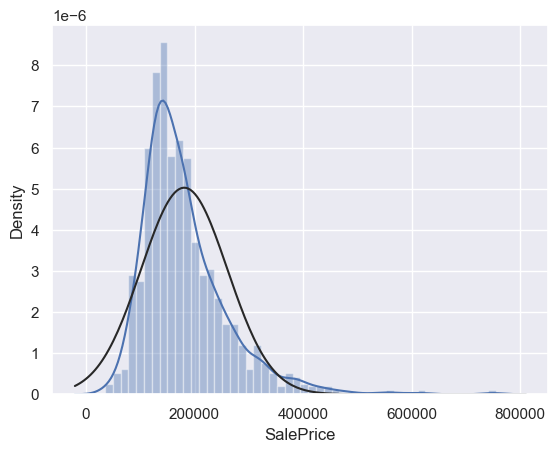

In [590]:
sns.distplot(dataset['SalePrice'], fit=norm, bins=50)
plt.show();

<div style="border-radius:10px;
            border : black solid;
            background-color: #EAE486;
            font-size:100%;
            text-align: left">

<h3 style='; border:0; border-radius: 15px; font-weight: bold; color:black'><center> Observation
</center></h3>  
    
* The distribution of Price in the dataset is not normal
* It is slightly Right skewed. 

## 4.2 Missing Values 

In [591]:
### Missing Value Handler

'''The is the section where we are creating a class `visualizer`. This class contains two user defined function. 
1. plot_mv  - this is a function where we are creating a bar plot to count the  no. of null values present 
in each of the variables and ploting the graph of only those variables with null value counts
2. mv_heatmap - this is a function where we are creating a heatmap to visualize the missing value from the dataset 
to get a quick idea & take logical decisions quickly for imputing
'''
class visualizer:

    #function to create a count plot for missing values
    def plot_mv(df):
        missing_value = df.isnull().sum().sort_values(ascending=False)
        mv = missing_value[missing_value!=0]
        plt.figure(figsize=(28,7))
        mv.plot(kind='bar')
        plt.title('Missing Value in Each Column', fontsize=20)
        plt.xlabel('Variables')
        plt.ylabel('No.of Null Values')

        for i in range(mv.shape[0]):
            plt.text(x=i, y=mv[i], s='{:.2f}'.format(mv[i]), ha='center', va='bottom', fontsize=13)
        
        print ('Total No.of Columns with missing_values:', len(df.columns[df.isnull().any()]))

    #function to create a heat map for the NaN values in the dataset
    def mv_heatmap(df):
        plt.figure(figsize=(18,6))
        plt.title('Heatmap of missing values')
        sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### 4.2.1 How are the NaN values located in the dataset?

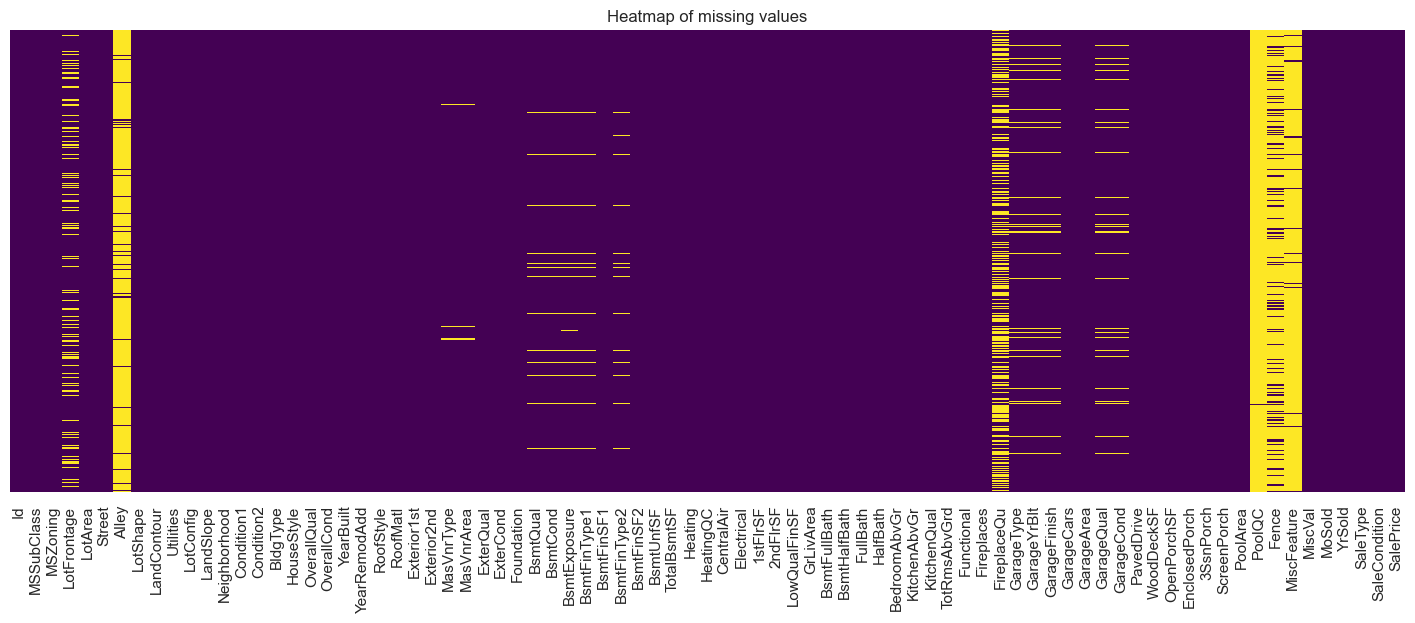

In [592]:
#visualization of the total dataset
visualizer.mv_heatmap(dataset)

### 4.2.2 What are the total missing values in the dataset??

Total No.of Columns with missing_values: 19


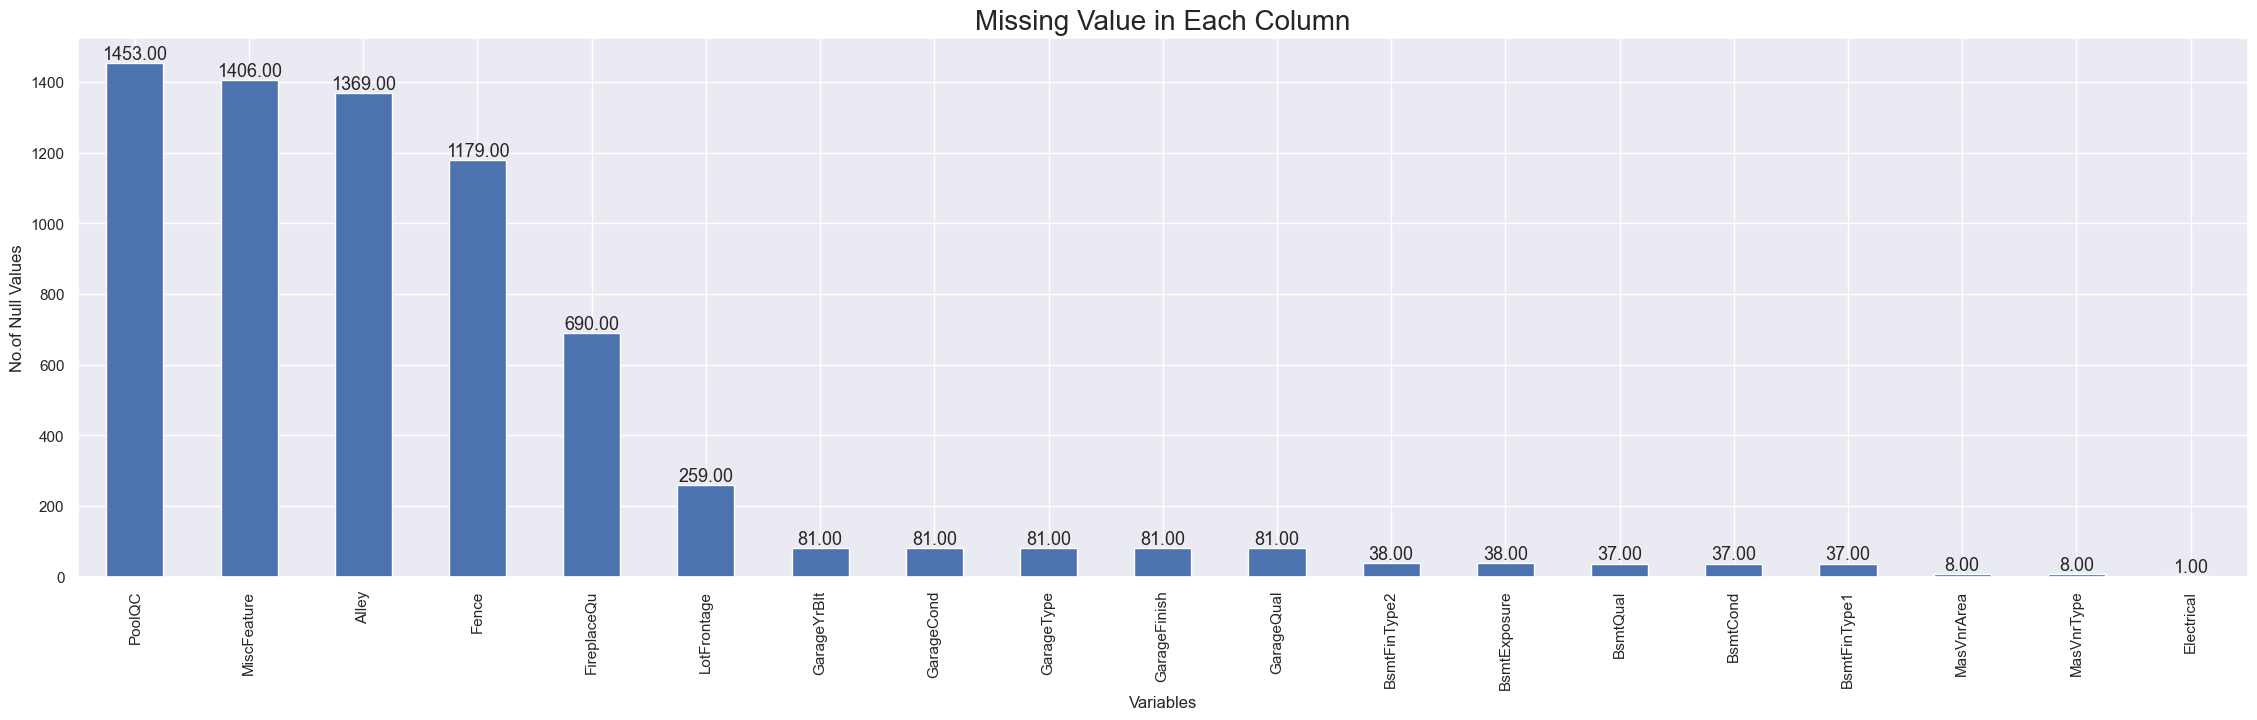

In [593]:
#null value count of train dataset
visualizer.plot_mv(dataset)

Total No.of Columns with missing_values: 33


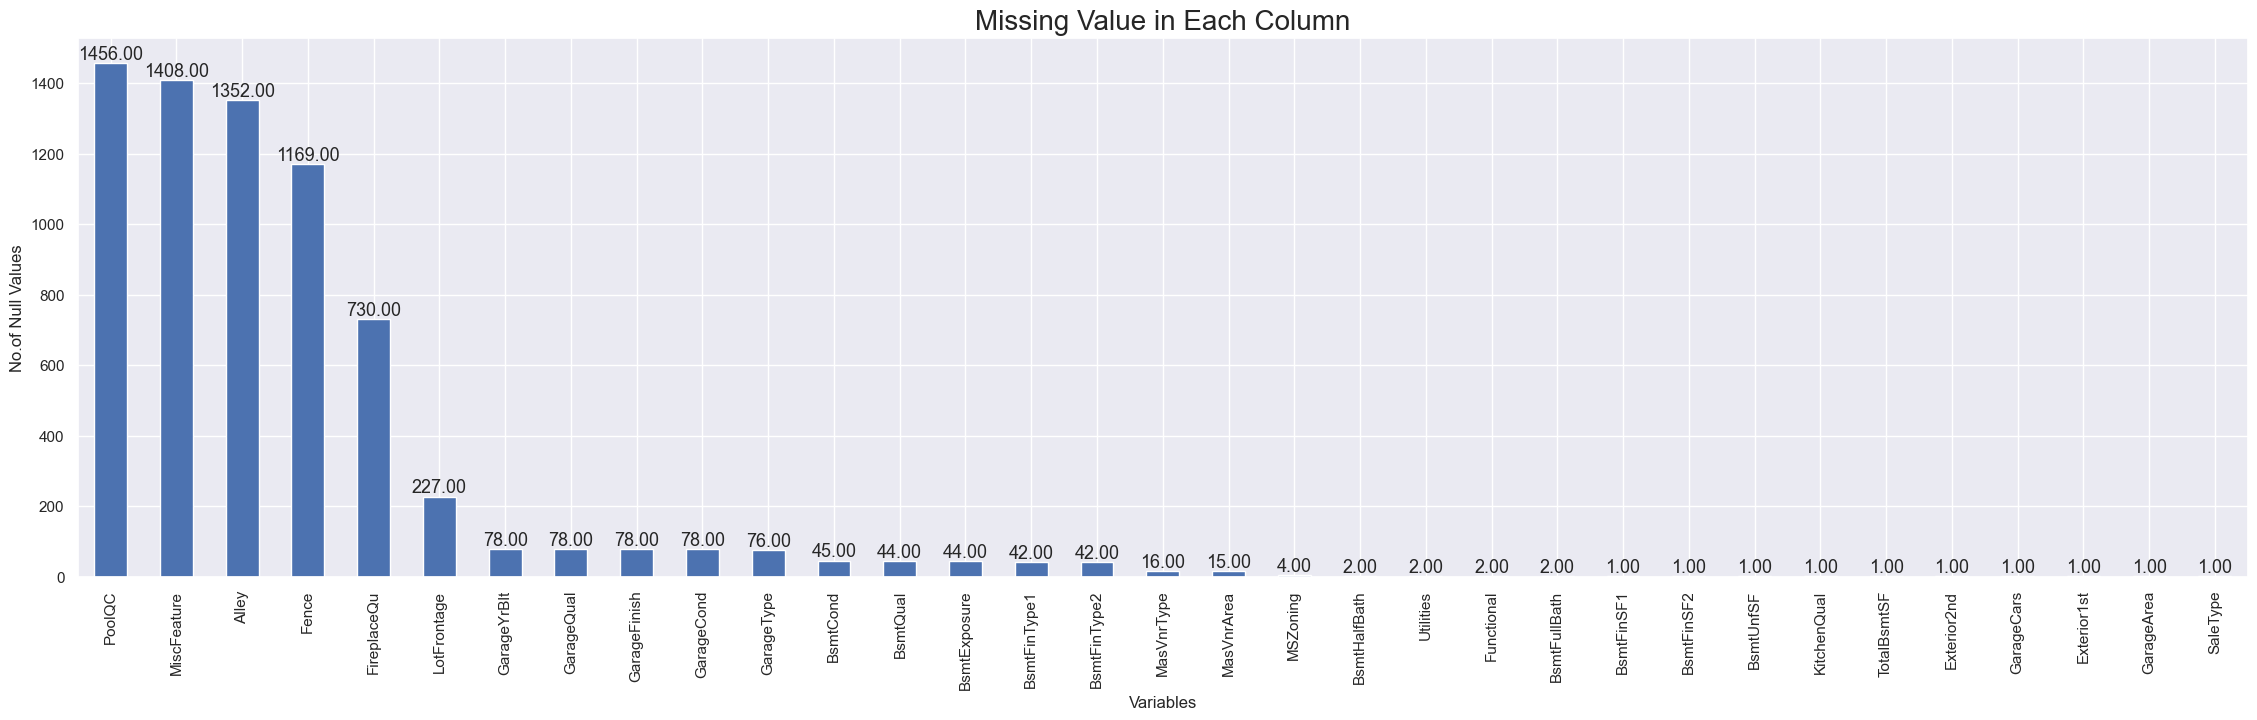

In [594]:
#null value count of train dataset
visualizer.plot_mv(df_test)

## 4.3 Duplicate Records

In [595]:
print ('No. of Train duplicate records :', dataset.duplicated().sum())
print ('No. of Test duplicate records :', df_test.duplicated().sum())

No. of Train duplicate records : 0
No. of Test duplicate records : 0


<div style="border-radius:10px;
            border : black solid;
            background-color: #EAE486;
            font-size:100%;
            text-align: left">

<h3 style='; border:0; border-radius: 15px; font-weight: bold; color:black'><center> Observation
</center></h3>  
    
* There are few columns with more than 90% missing value such as : 'PoolQC', 'MiscFeature', 'Alley', etc. We can drop these columns
* There are few more columns with NaN values in the test dataset.
* There are **no duplicate** records in the dataset

**Since there are multiple Missing values in the dataset, we need to find the relationship between them in order to justify the imputation method of the NaN values**

## 4.4 Relation between the NaN values with Price

In [596]:
## 1 -step make the list of features which has missing values
features_with_na=[features for features in dataset.columns if dataset[features].isnull().sum()>1]

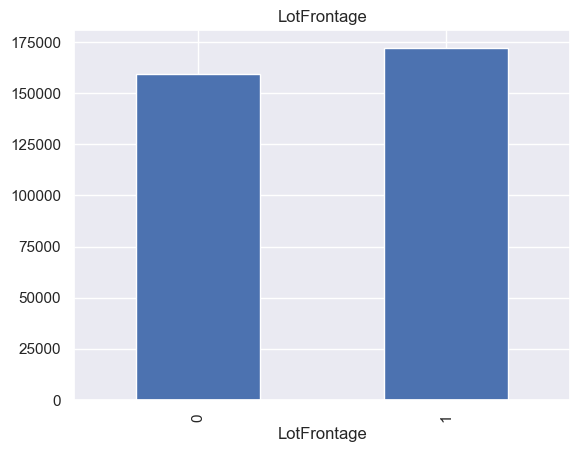

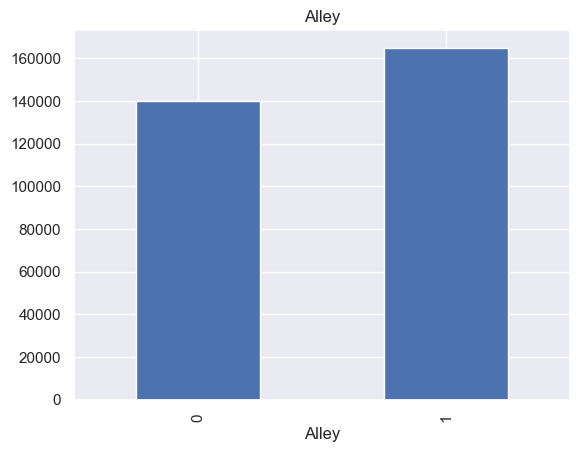

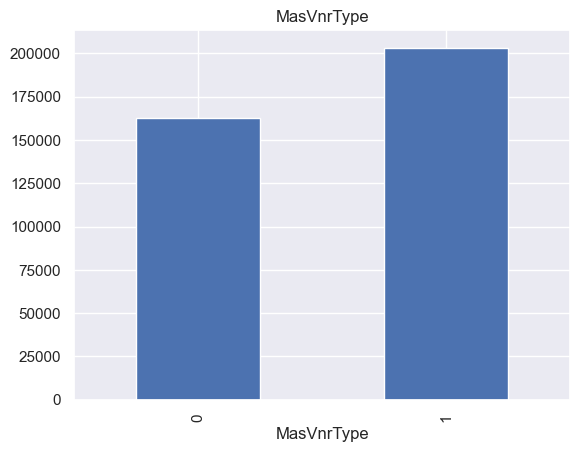

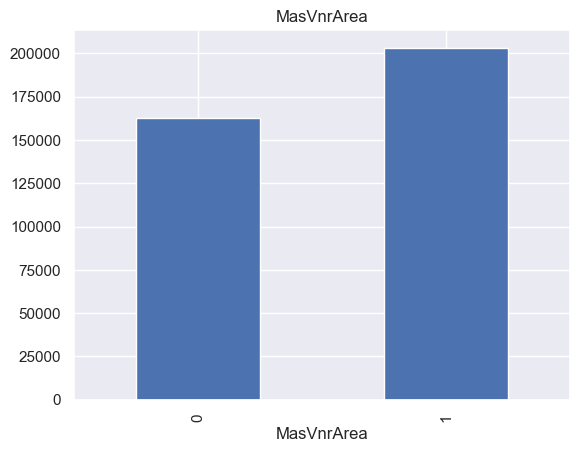

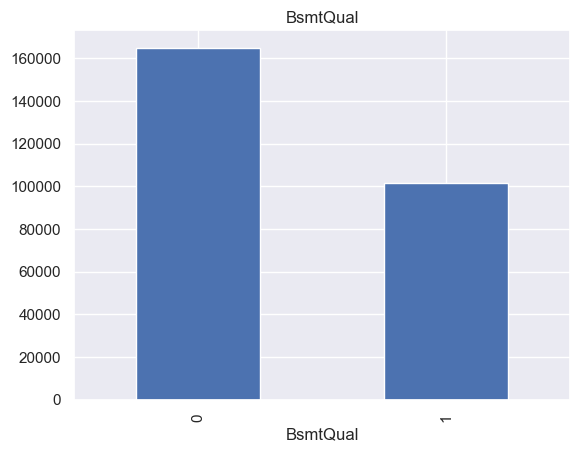

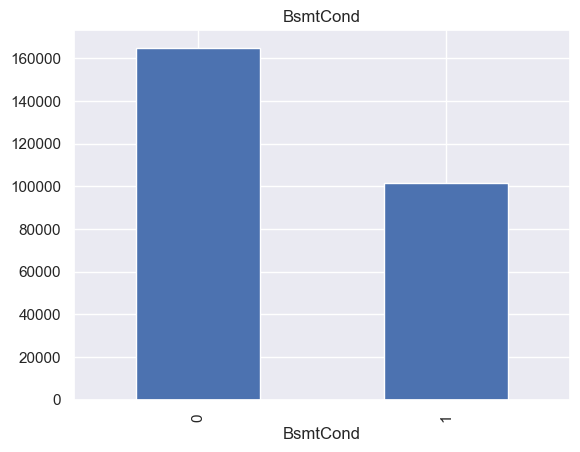

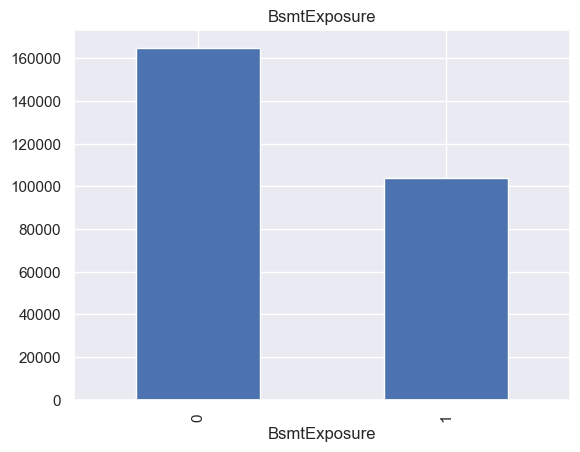

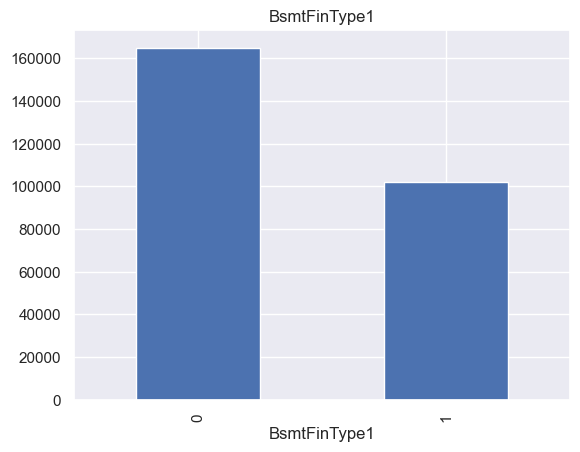

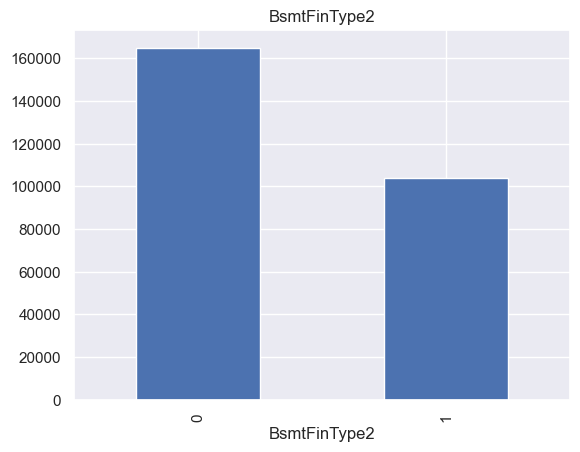

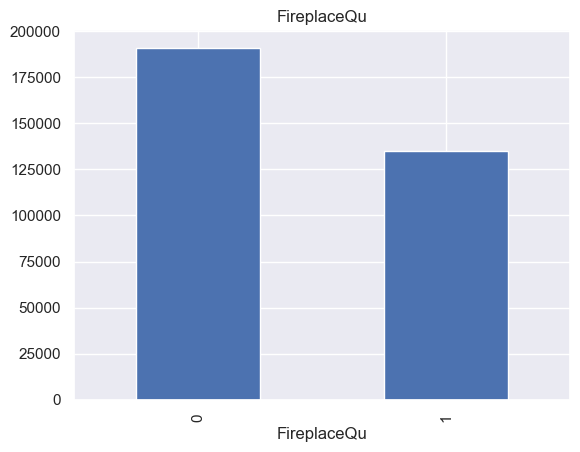

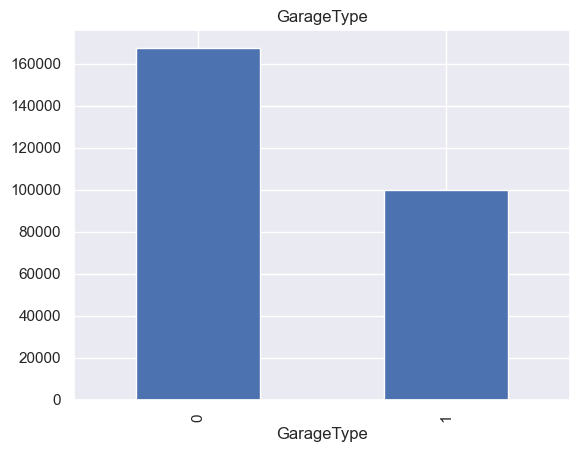

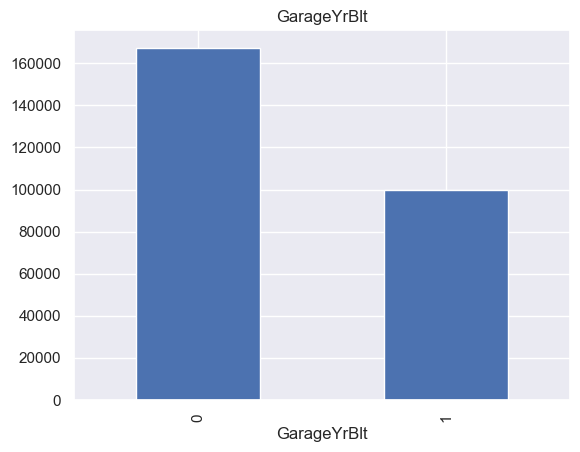

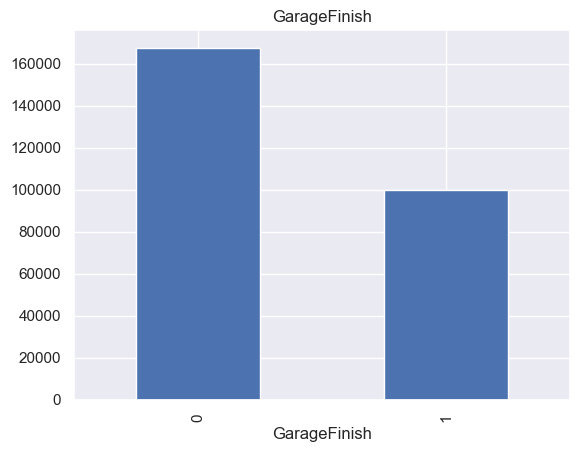

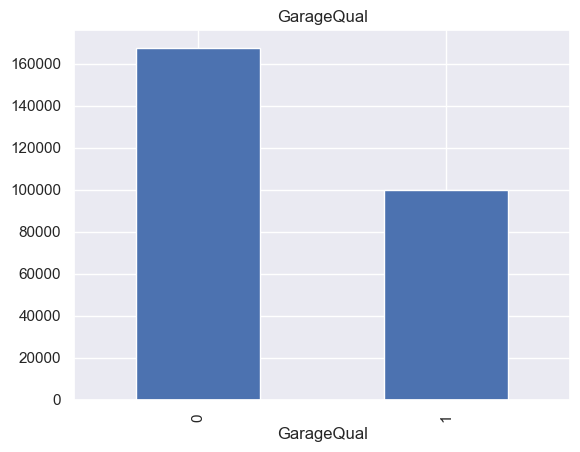

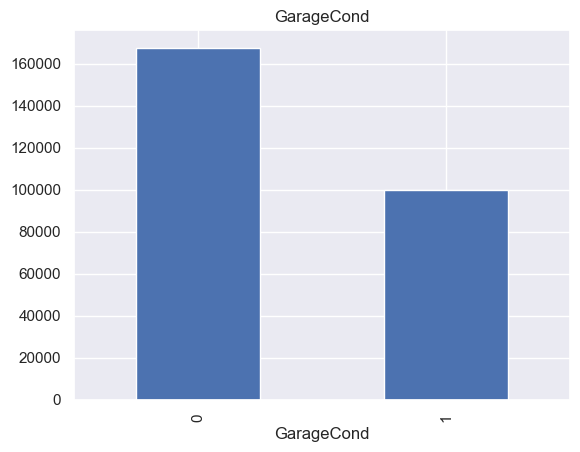

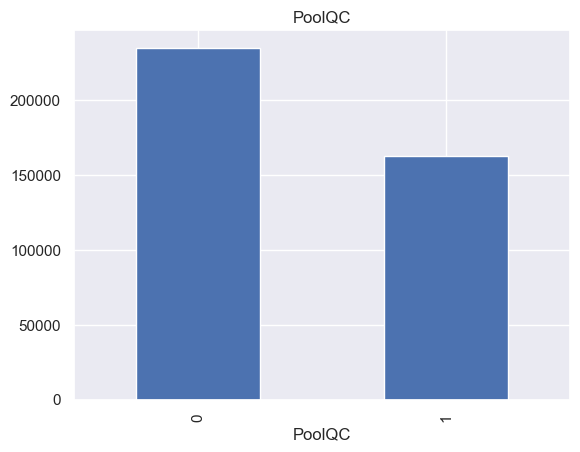

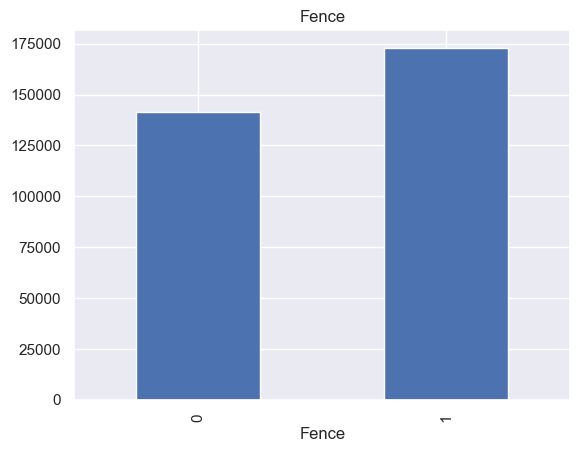

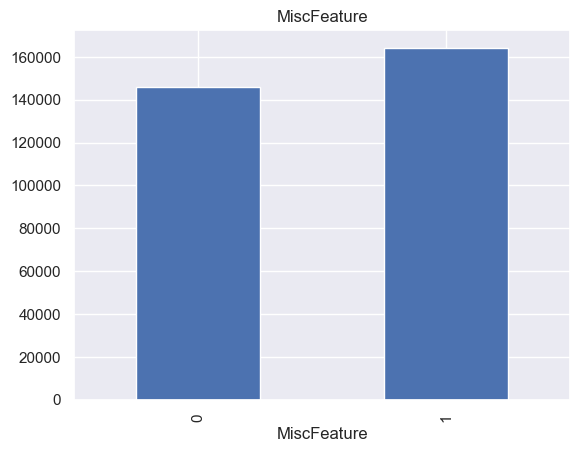

In [597]:
## 2 - Relation between the missing values and the Price
for feat in features_with_na:
    data=dataset.copy()
    
    # variables indicating 1 if the observation was missing or zero otherwise
    data[feat] = np.where(data[feat].isnull(), 1, 0)
    
    # let's calculate the mean SalePrice where the information is missing or present
    data.groupby(feat)['SalePrice'].median().plot.bar()
    plt.title(feat)
    plt.show()

    Since there is a relationship between the missing values and the Price of the Houses, we need to impute with some methodology in Feature Engineering

In [598]:
#Dropping the ID column from the dataset
dataset.drop('Id',axis=1, inplace=True)

In [599]:
# list of numerical variables
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

Number of numerical variables:  37


## 4.5 Analysis with Temporal Variable (Eg: DateTime)

We have 4 datatypes with year as column. We can extract more information from these variable by feature engineering and also can find out pattern or trend of prices over the years. 

In [600]:
# list of variables that contain year information
yr_feat = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]

yr_feat

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

### 4.5.1 Price Trend over the Year Sold

Text(0.5, 1.0, 'House Price vs YearSold')

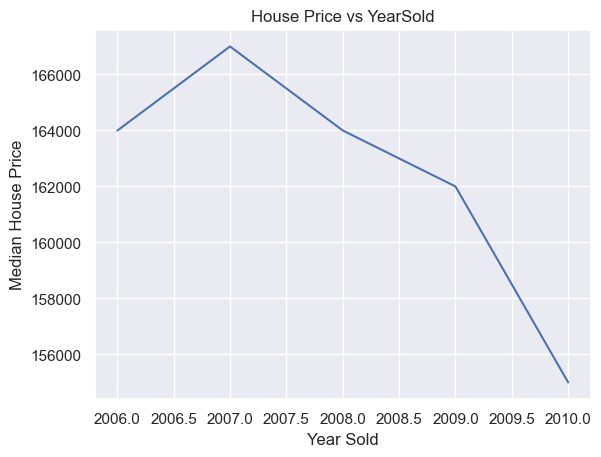

In [601]:
## Lets analyze the Temporal Datetime Variables
## We will check whether there is a relation between year the house is sold and the sales price

dataset.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title("House Price vs YearSold")

    The price of the House should increase over the years but the trend from the dataset is showing the opposite result. The House Price decreases over the year. 

### 4.5.2 Price Trend with different Age

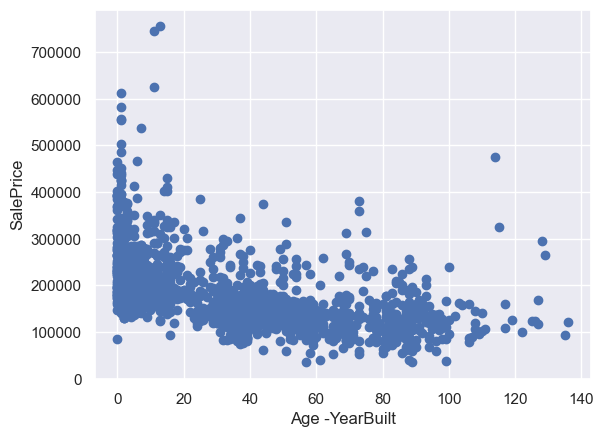

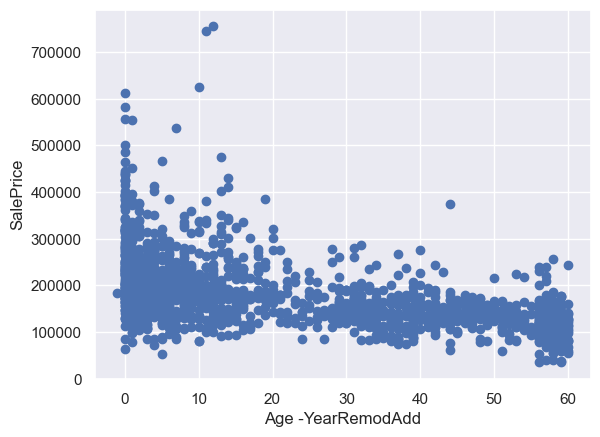

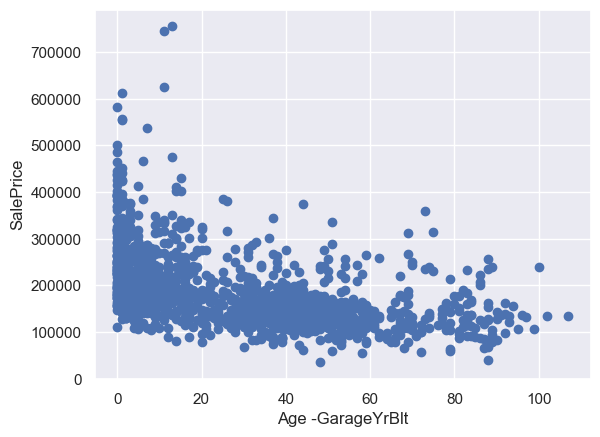

In [602]:
## Here we will compare the different Age feature with the Price Trend of the House

for feature in yr_feat:
    if feature!='YrSold':
        data=dataset.copy()
        
        ## Age with respect to the Year Features
        data[feature]=data['YrSold']-data[feature]

        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel('Age -'+feature)
        plt.ylabel('SalePrice')
        plt.show()

    These are the ages compared to the price trend. 
    1. Most recent House should actually costlier which is found true but there are also some old houses which are costlier.
    2. The price of the Houses are more costlier when the renovation is done recently within few years.
    3. Same trend noticed with building the Garage Year.

**Numerical variables can be continous and discrete. We can try to dig insights from each of the Feature**

## 4.6 Analysis with Numerical Variables

In [603]:
#Discrete Numerical Variables
discrete_feature=[feature for feature in numerical_features if len(dataset[feature].unique())<20 and feature not in yr_feat]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 14


### 4.6.1 Price Trend with Discrete Numerical Features

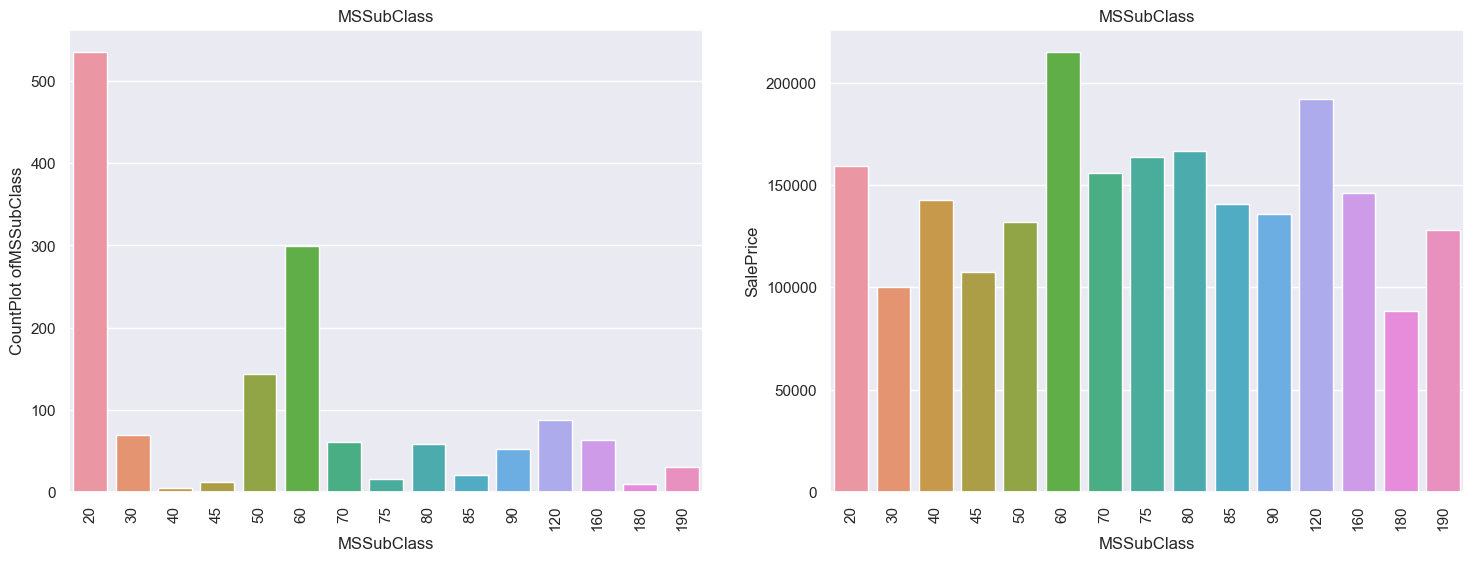

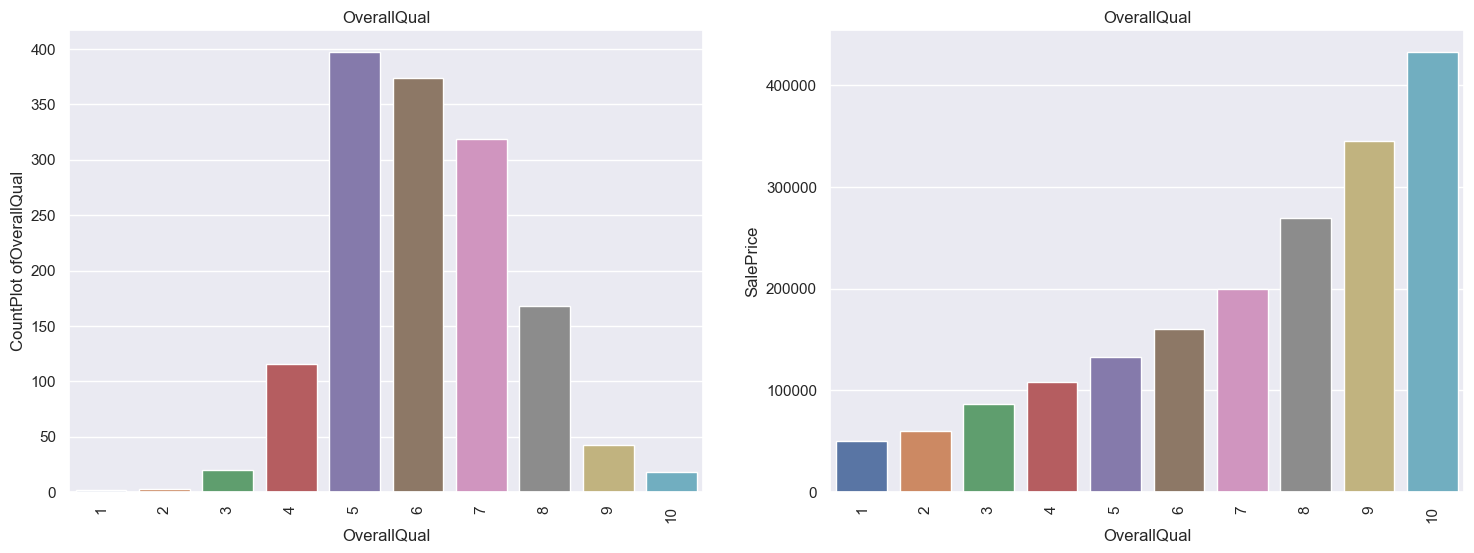

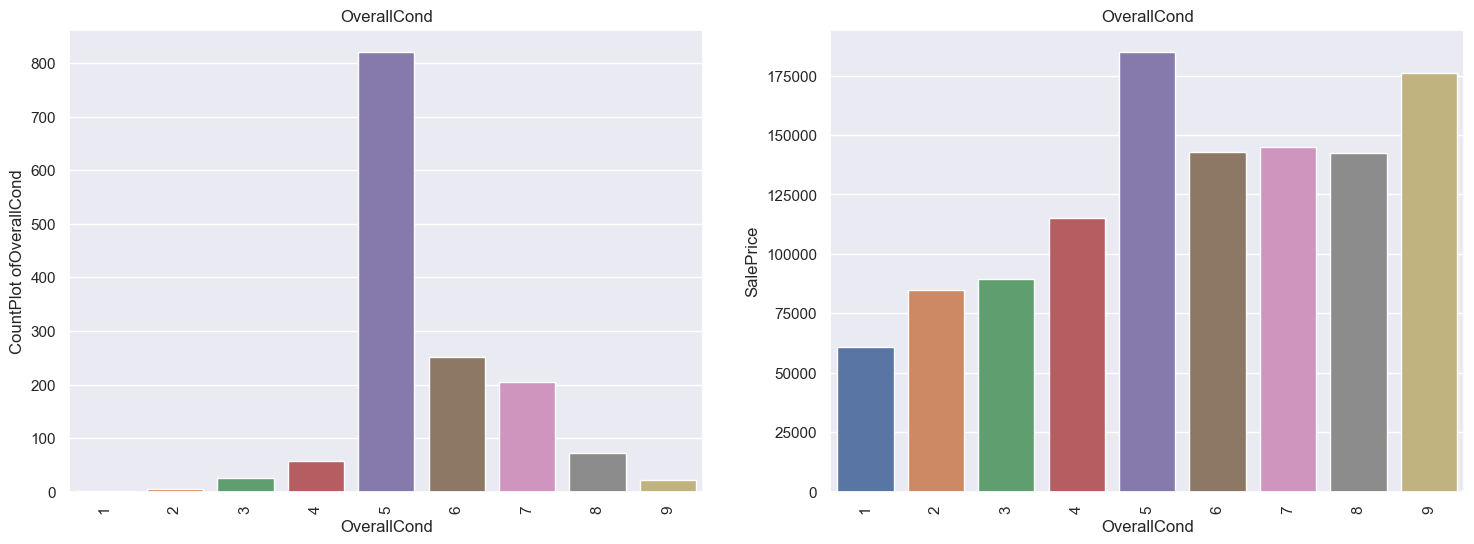

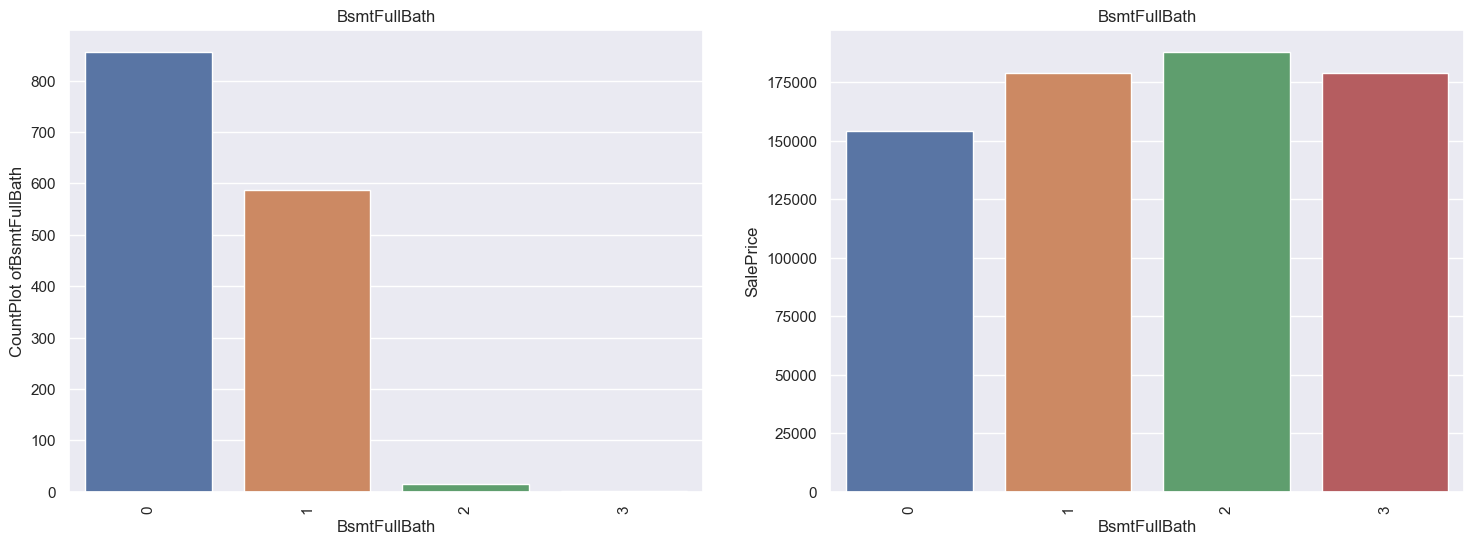

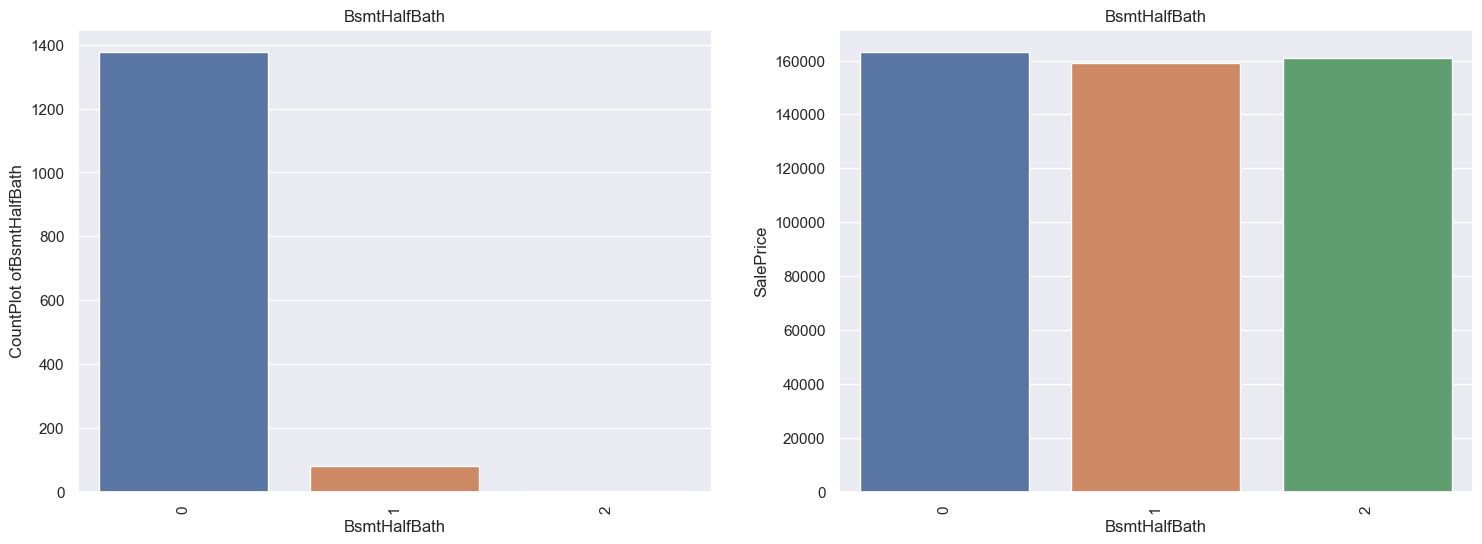

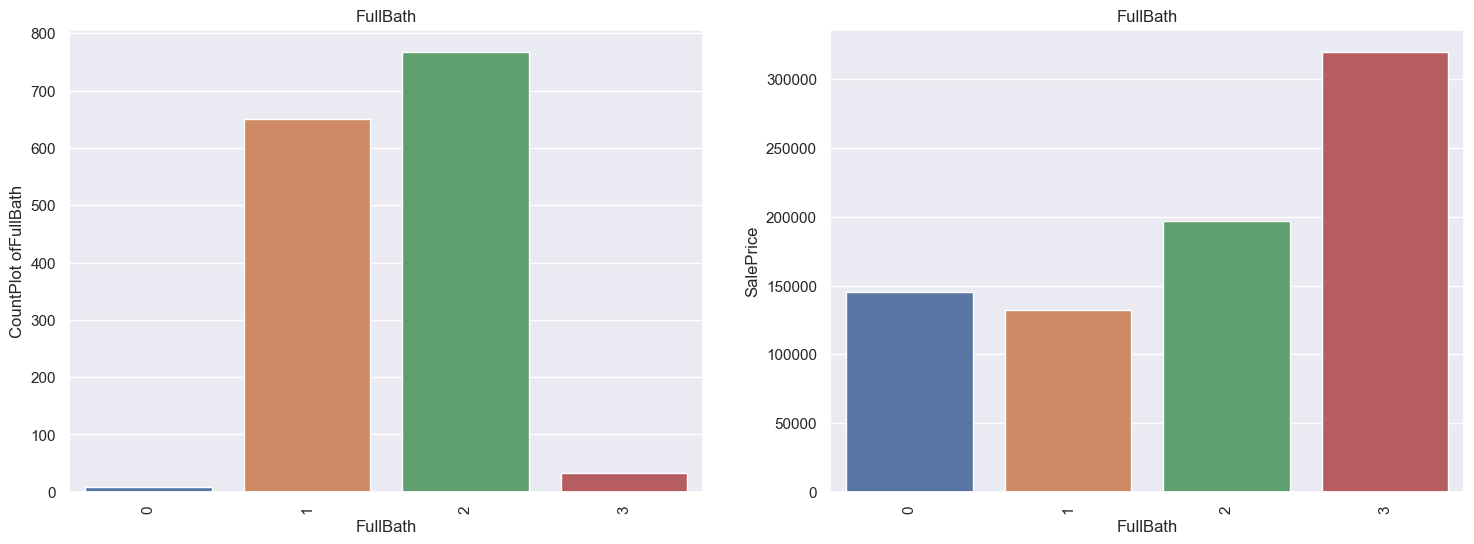

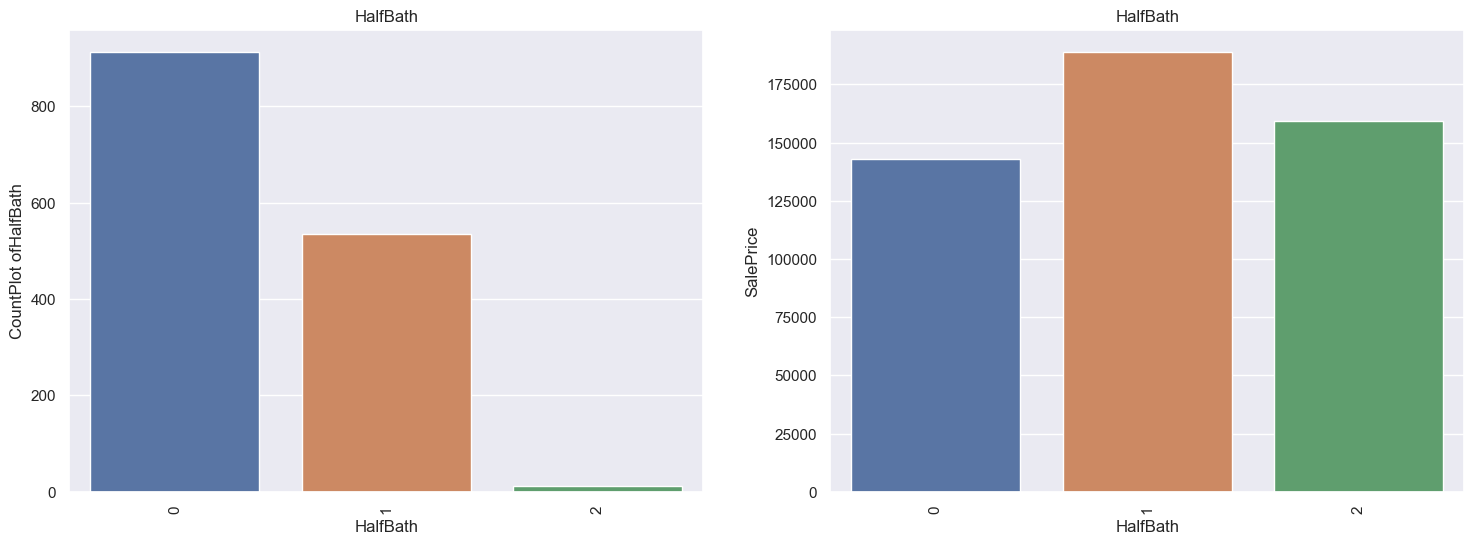

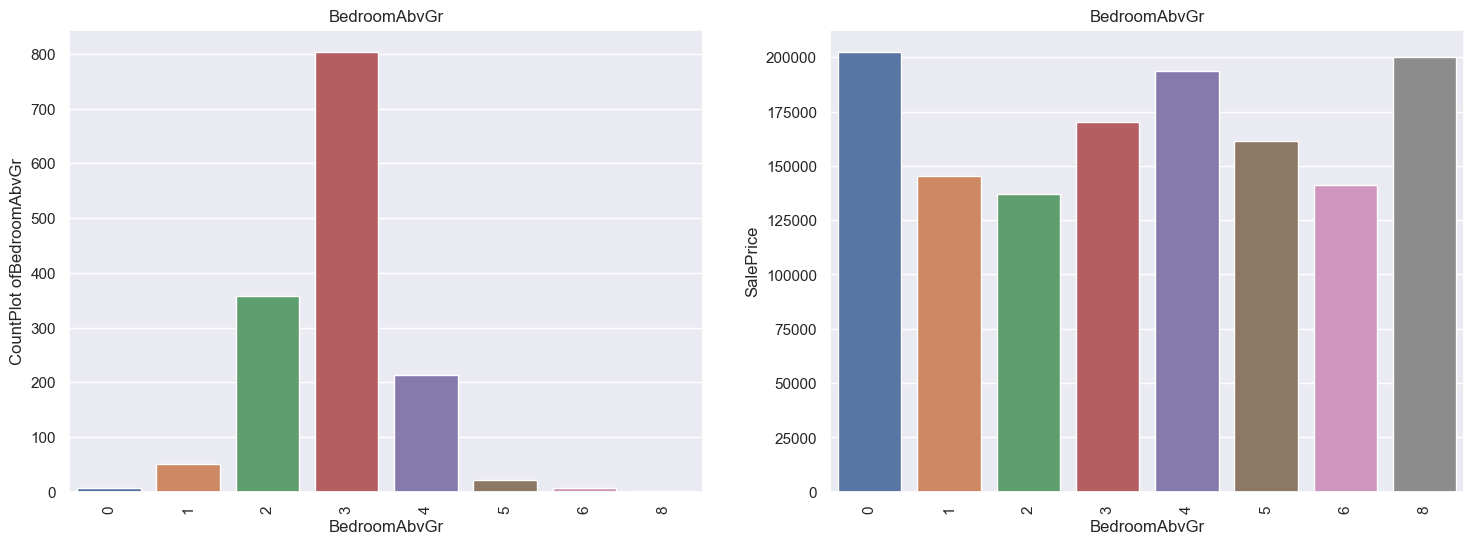

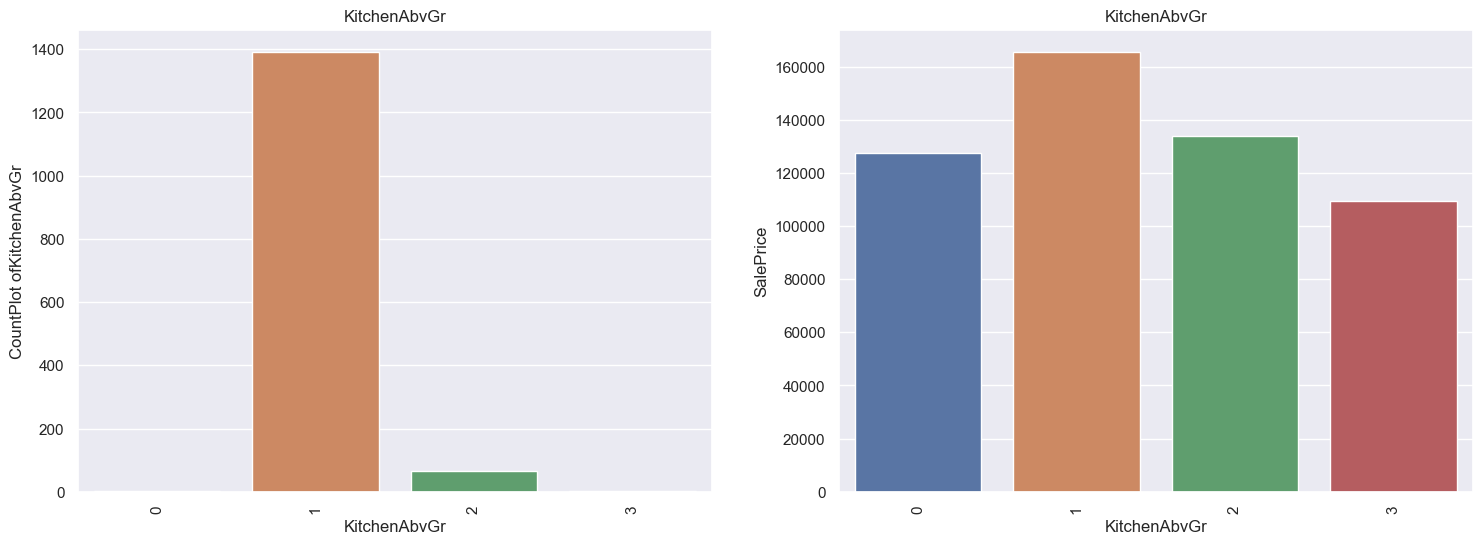

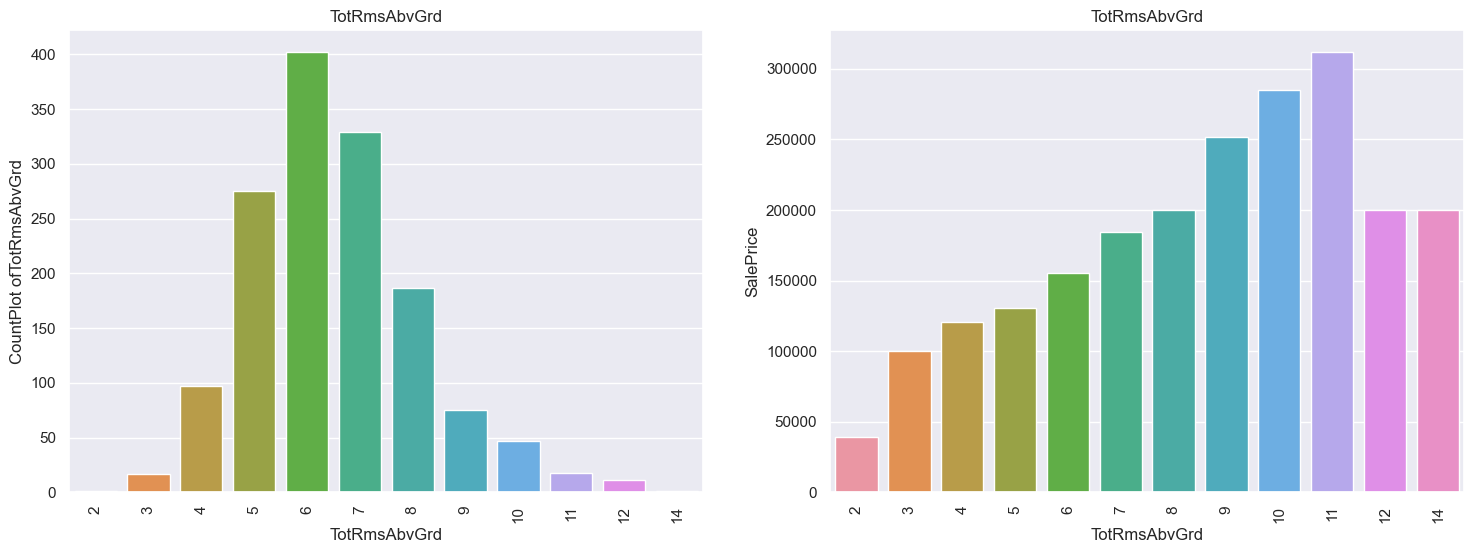

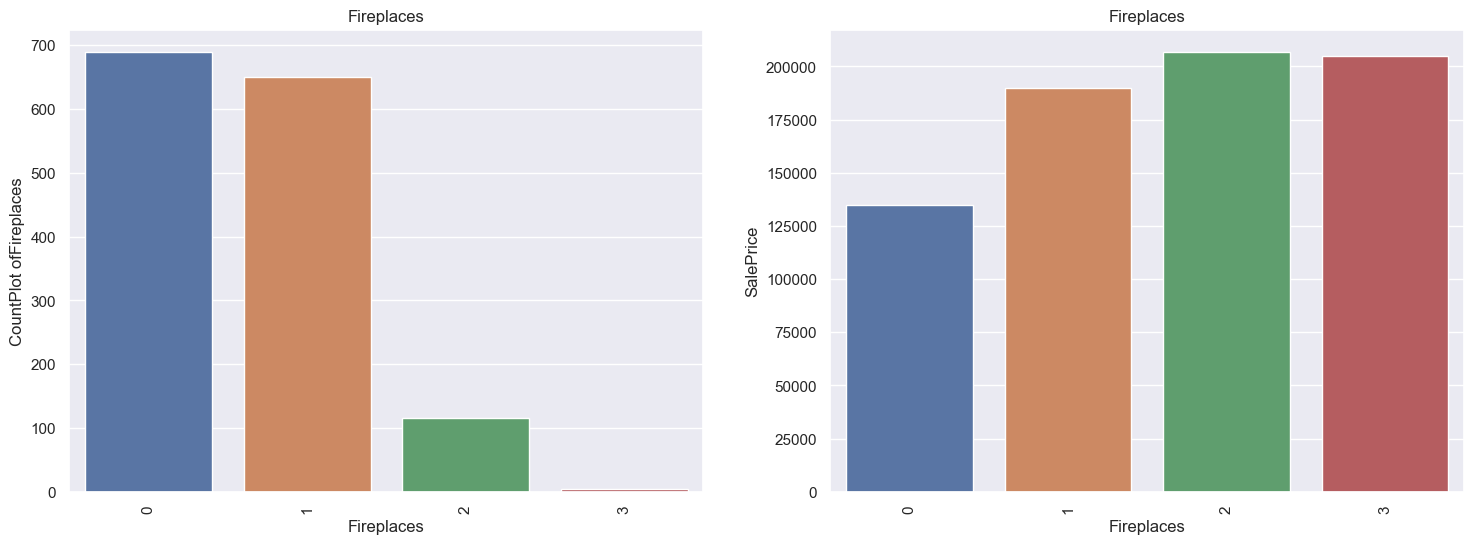

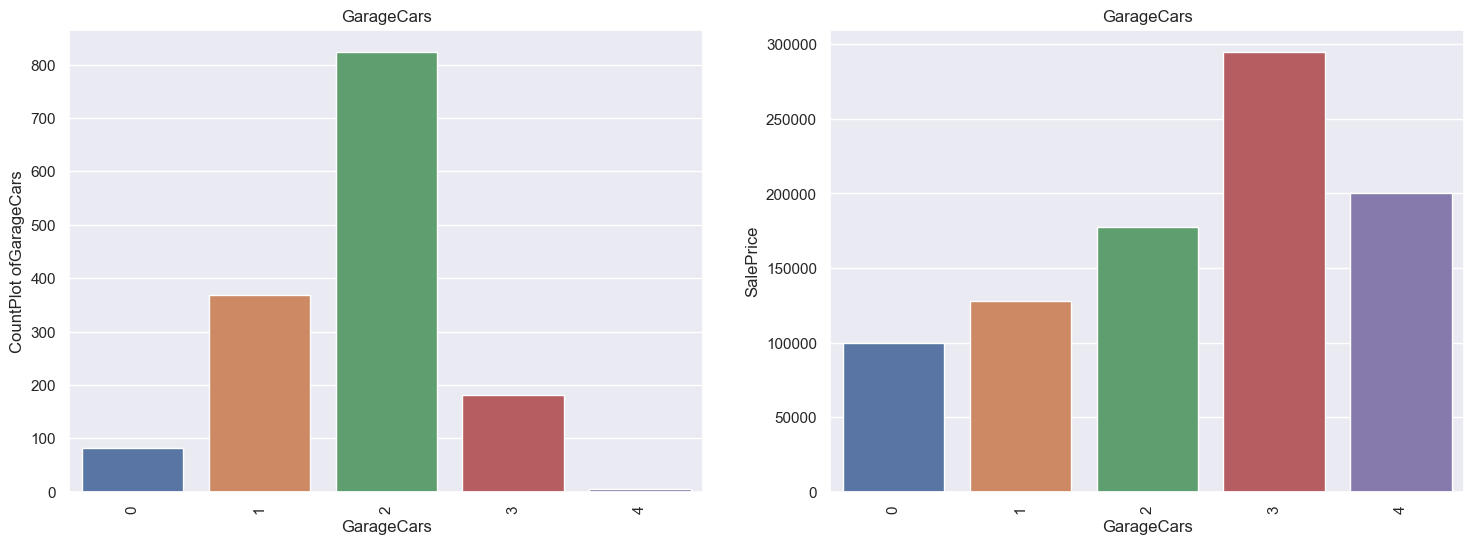

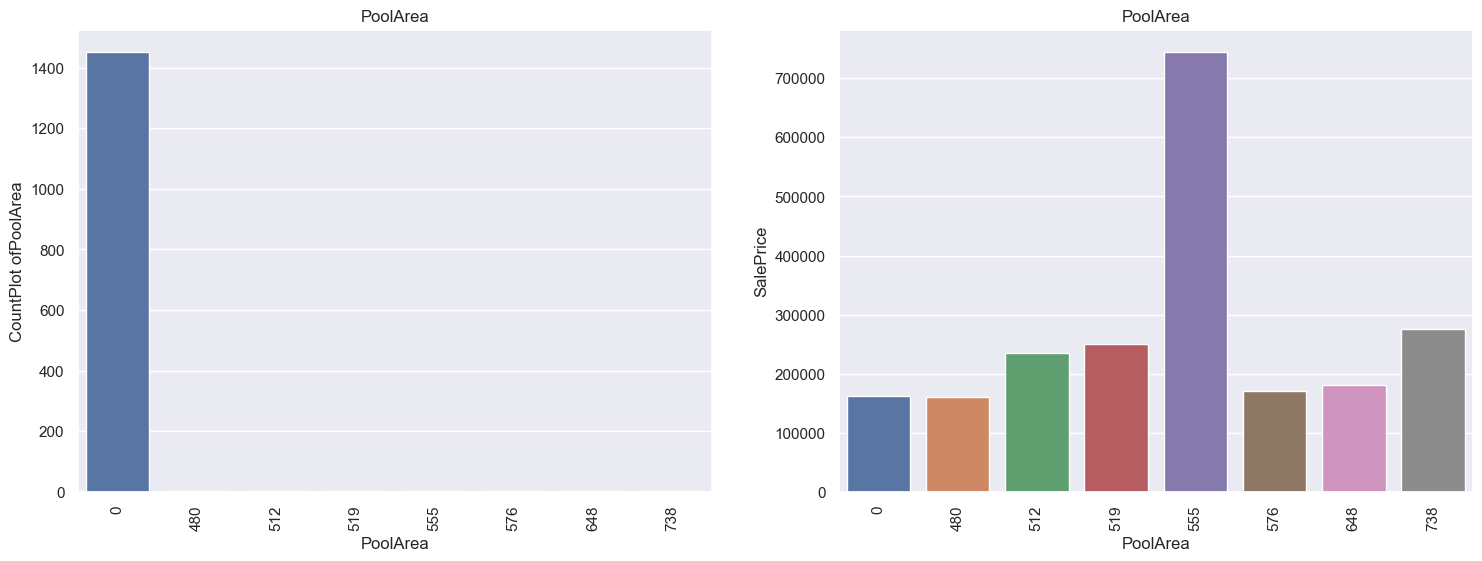

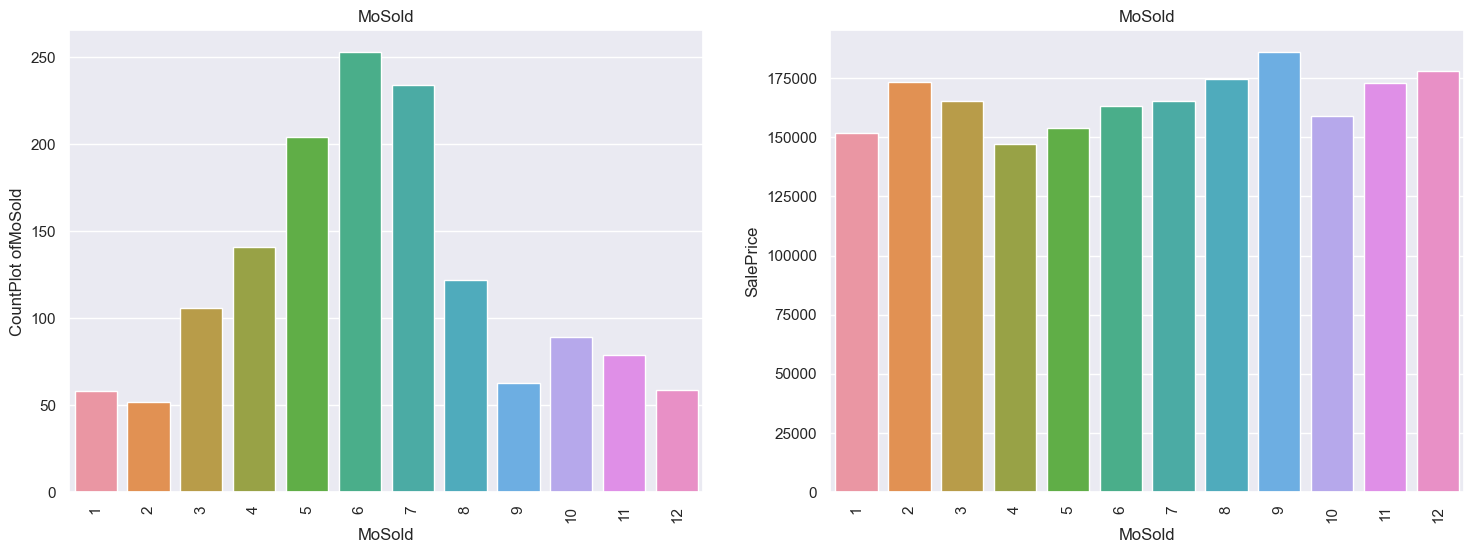

In [604]:
## Lets Find the realtionship between discrete num_features and Sale Price

for feature in discrete_feature:
    data=dataset.copy()
    
    plt.figure(figsize=(18,6))
    plt.subplot(121)
    ax=sns.countplot(data=dataset, x=feature)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    plt.ylabel('CountPlot of'+feature)
    plt.title(feature)
    
    plt.subplot(122)
    ax=sns.barplot(data=dataset, x=feature, y='SalePrice', estimator=np.median ,ci=None)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    plt.ylabel('SalePrice')
    plt.title(feature)
    
    plt.show()

<div style="border-radius:10px;
            border : black solid;
            background-color: #EAE486;
            font-size:100%;
            text-align: left">

<h3 style='; border:0; border-radius: 15px; font-weight: bold; color:black'><center> Observation
</center></h3>  
    
1. Houses with 2Storey 1946 & Newer are the most costlier.
2. The Avg. Price of the House increases with increase in OverallQual.
3. Overall Condition of the House does not have strong impact on the House Price since there is no strong trend noticed. This can be also due to imbalance in the dataset.
4. Avg. Price with 2 Bathrooms at basement is highest.
5. The House price does not have strong relation with Half Bathroom(both at basement and at upper levels) whereas has some impact with Full Bathroom. 
6. The bedrooms & Kitchen above ground floor does not impact the Price of the House but total rooms have some impact to the Price. 
7. Also there are few Houses which have 12-14 no. of rooms but the avg price are quite lower as compared to others.
8. Houses which have more no. of fireplaces are costlier.
9. The price of the Houses increases with increase in Garage Cars capacity except for the few house which can have 4 garage cars.
10. Houses which are sold at Quarter 2 are much cheaper while Sales of Quarter 4 are the Highest

### 4.6.2 Price Trend with Continous Numerical Features

In [605]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+yr_feat]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 19


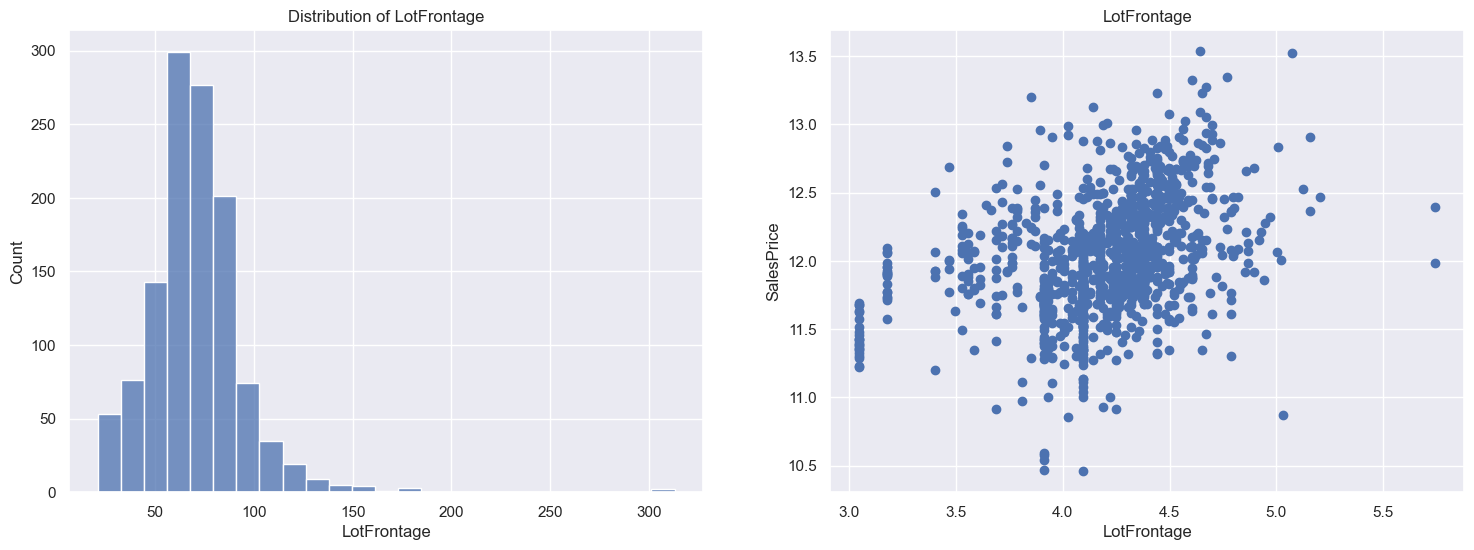

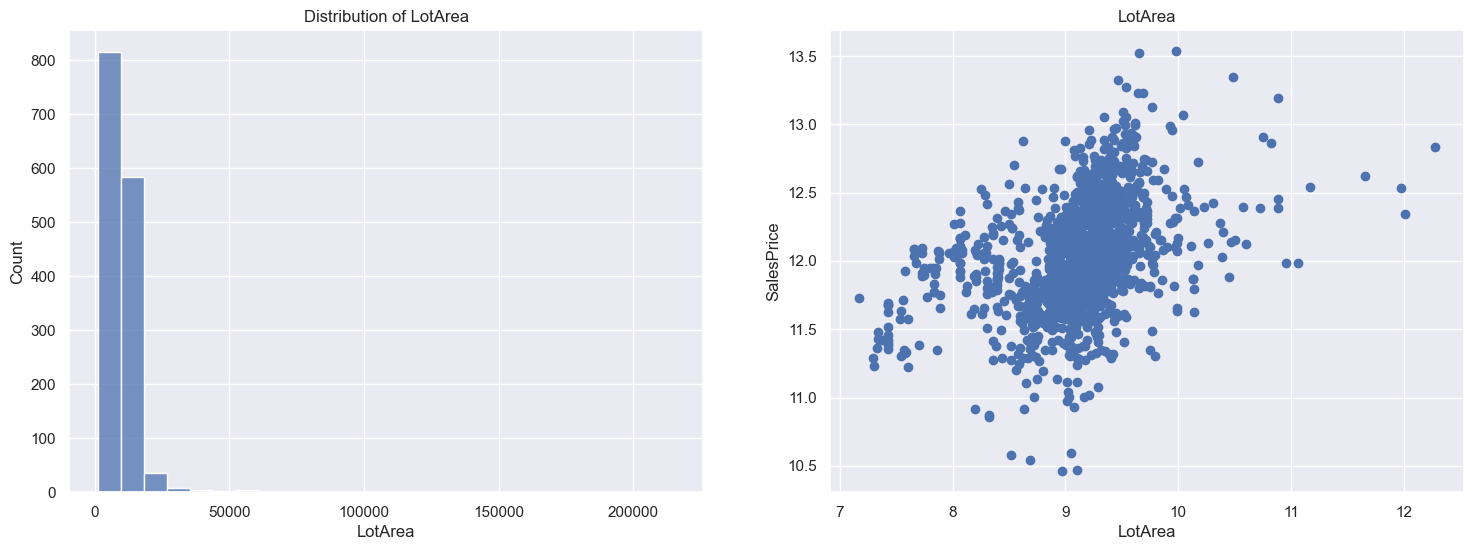

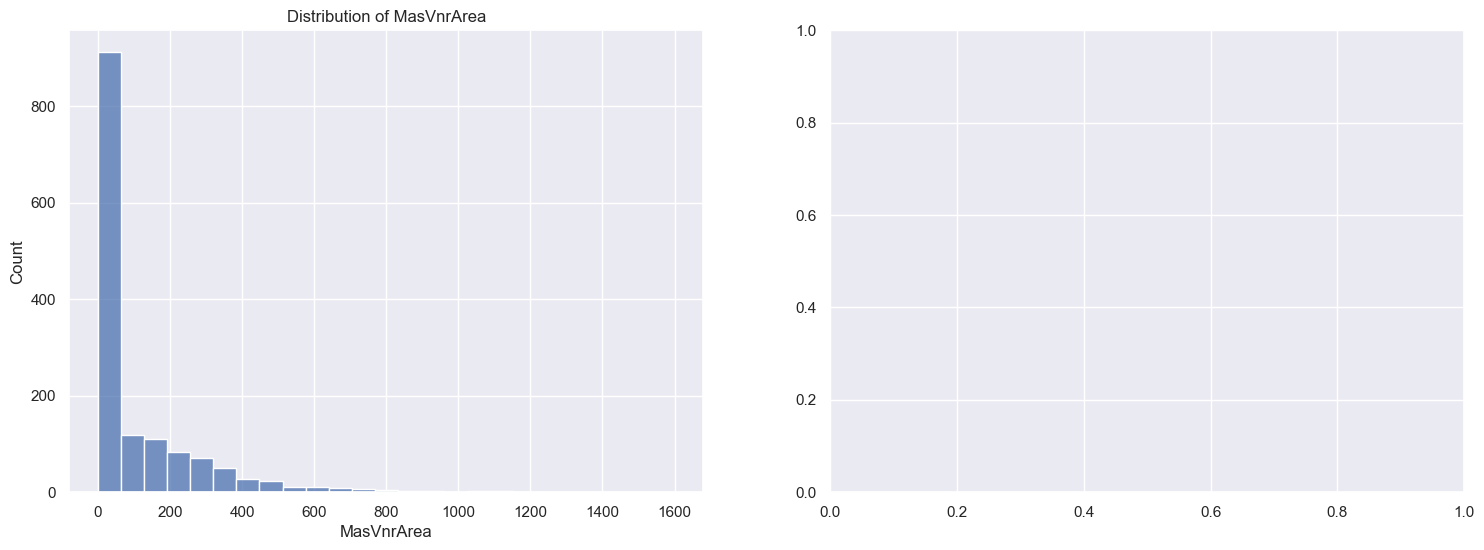

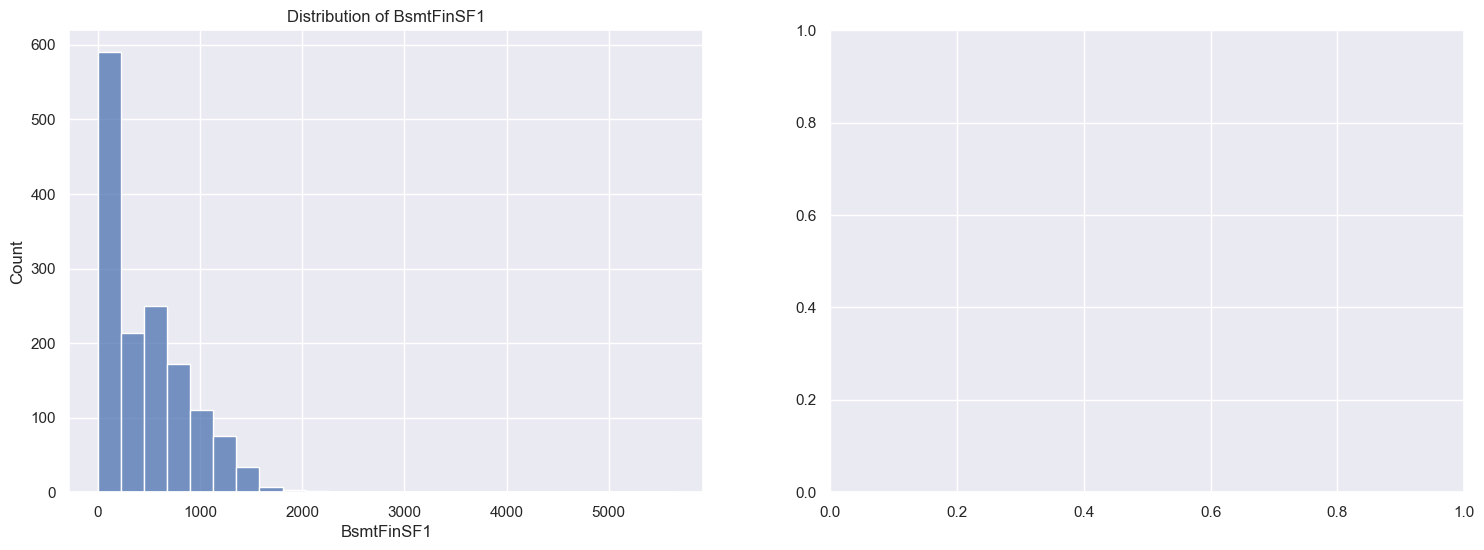

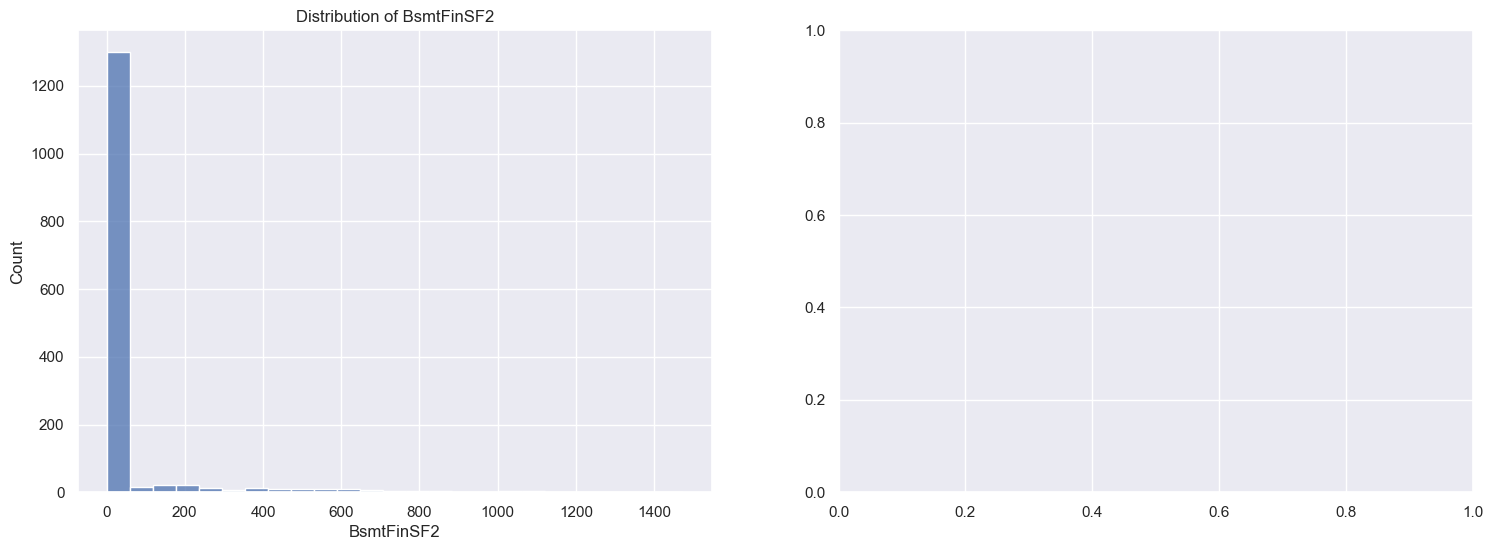

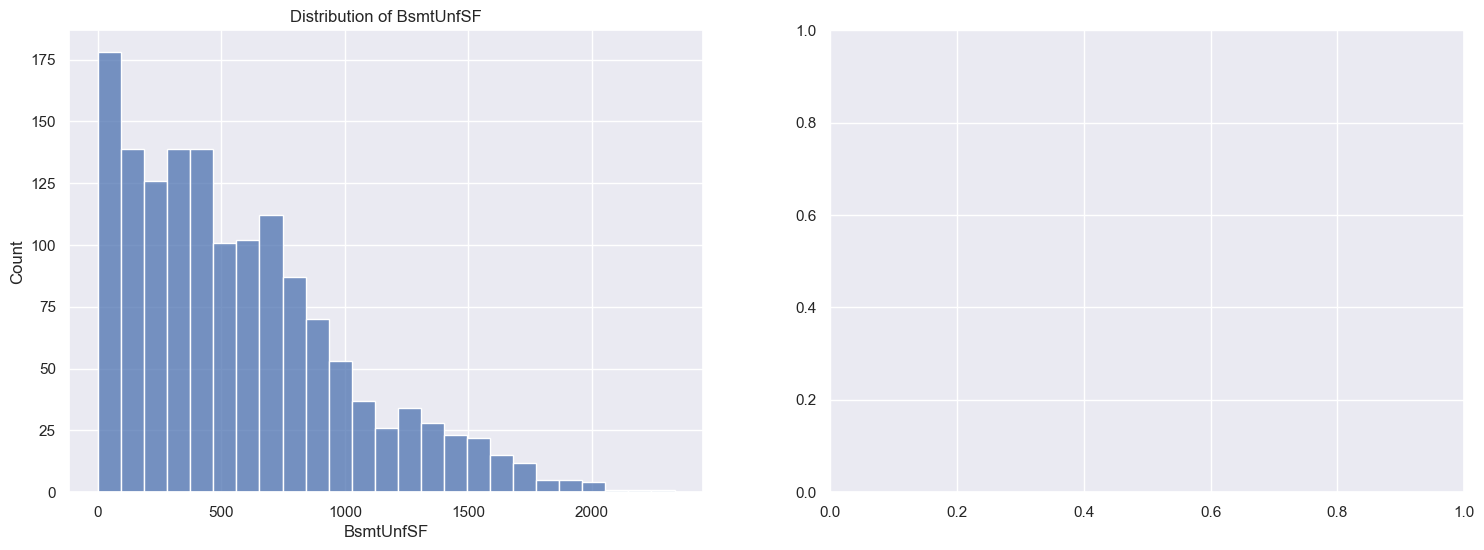

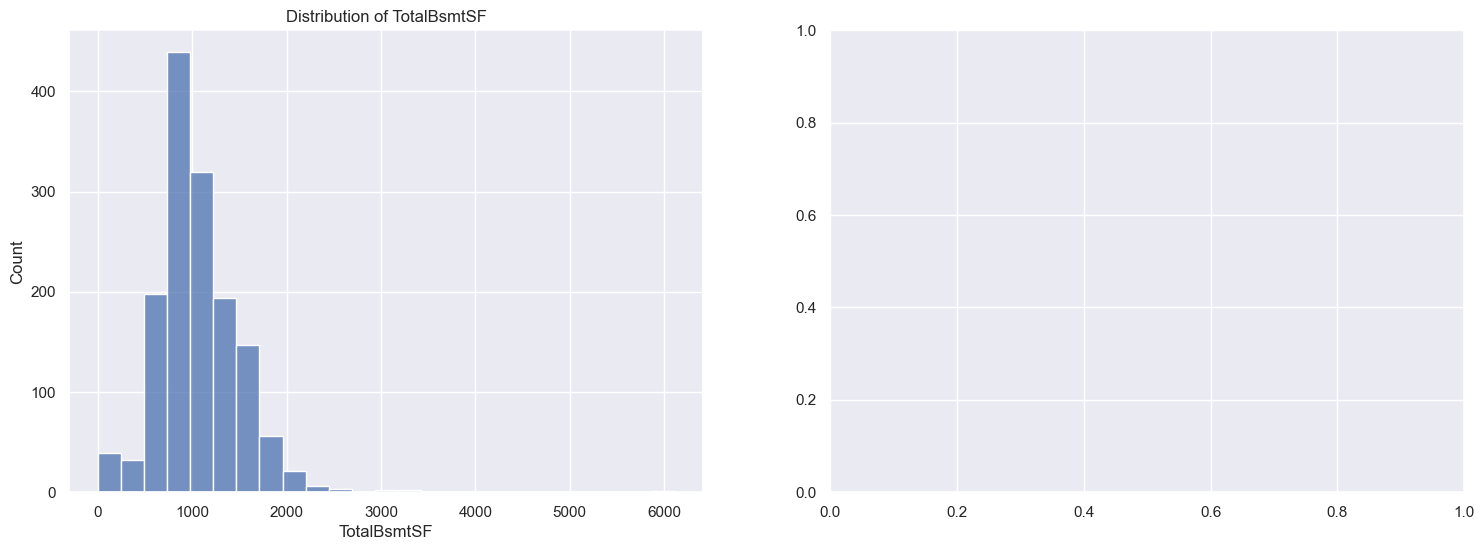

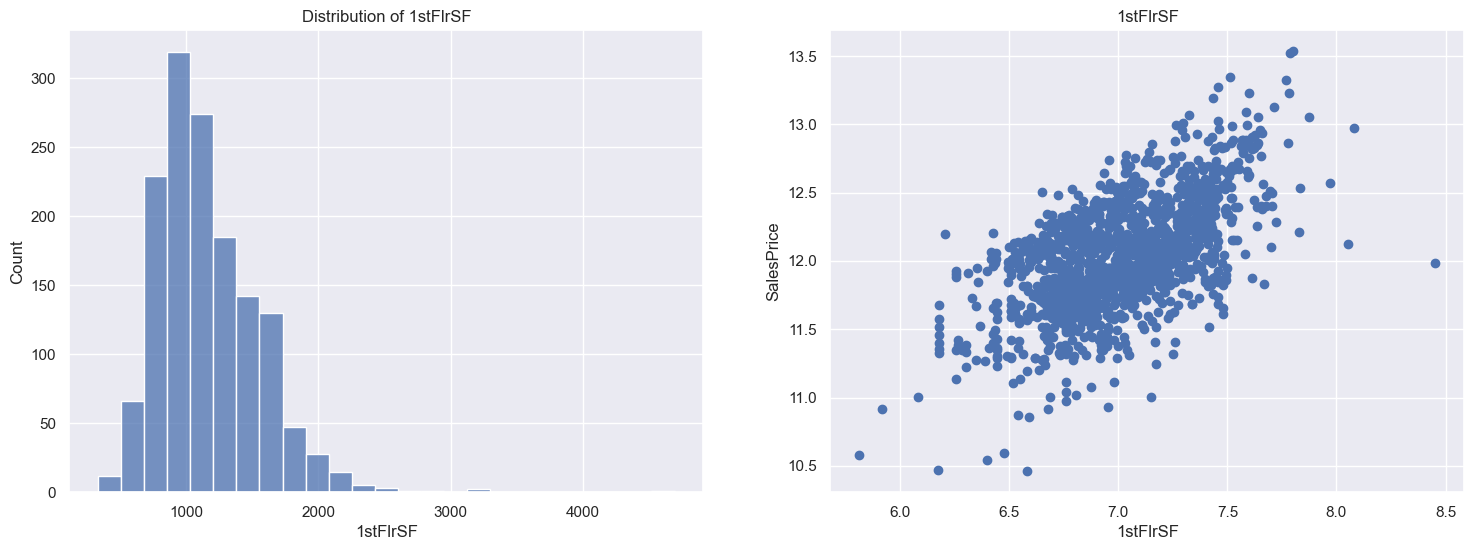

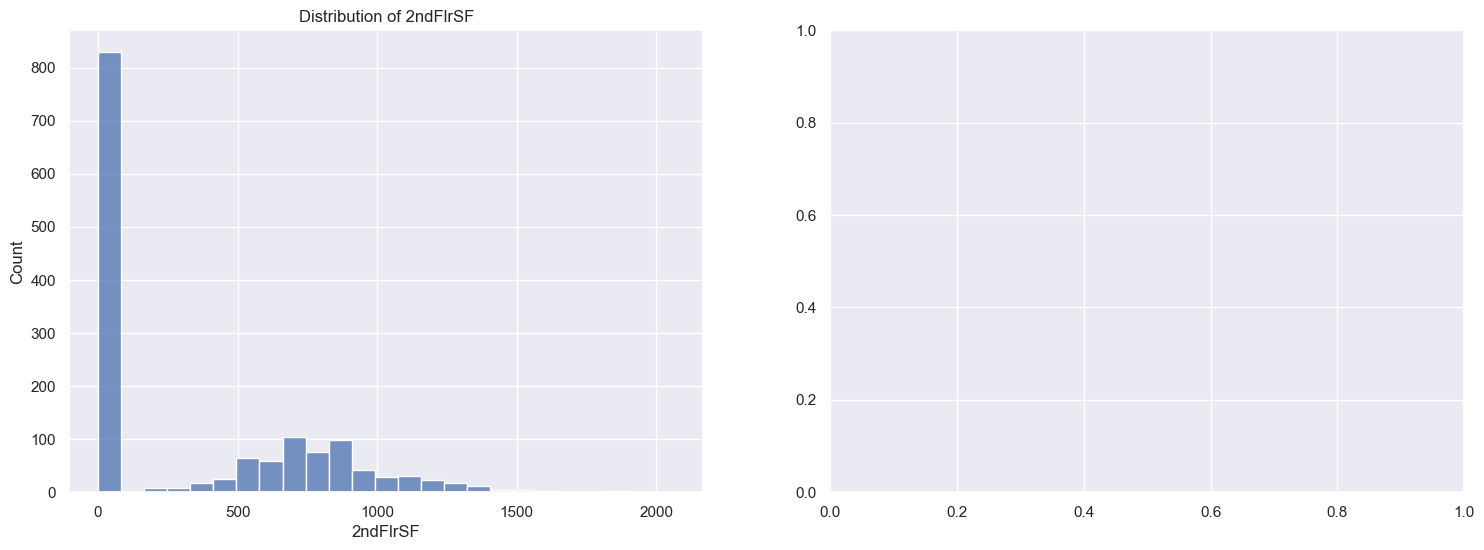

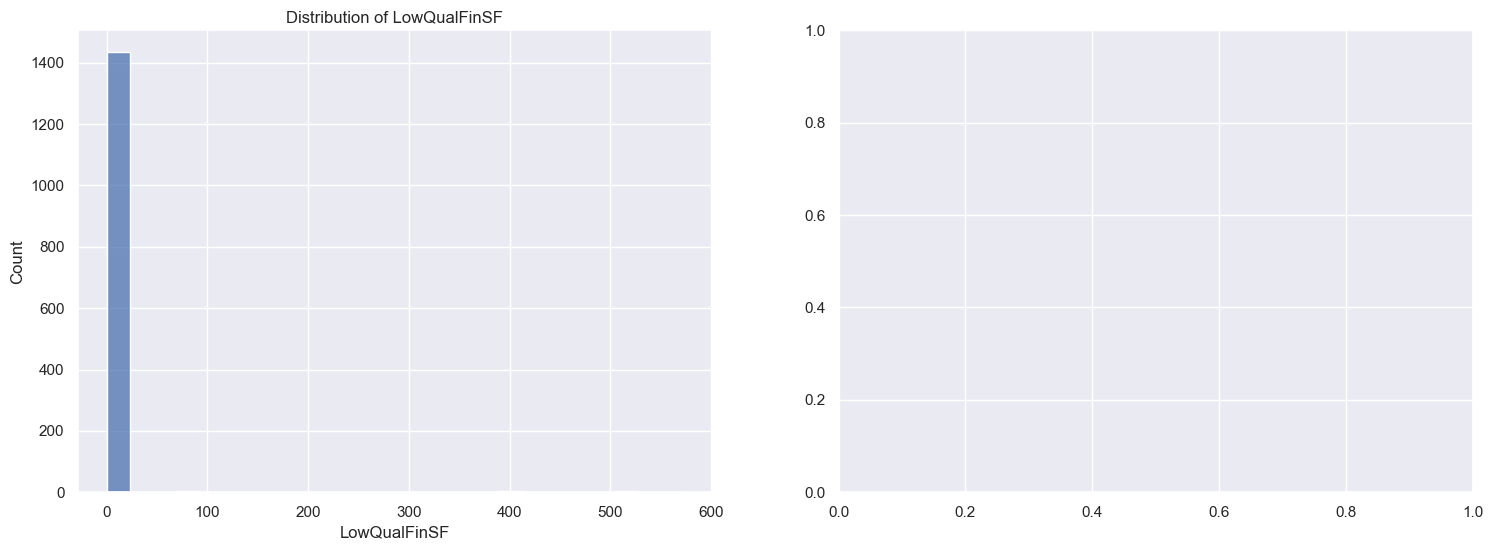

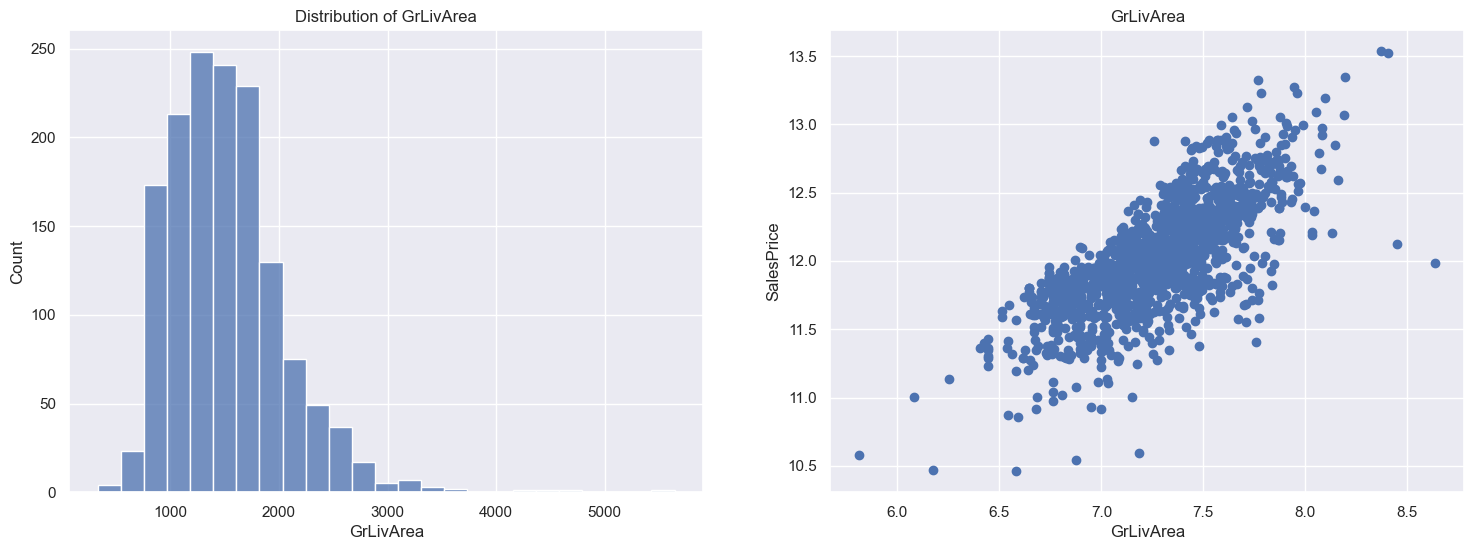

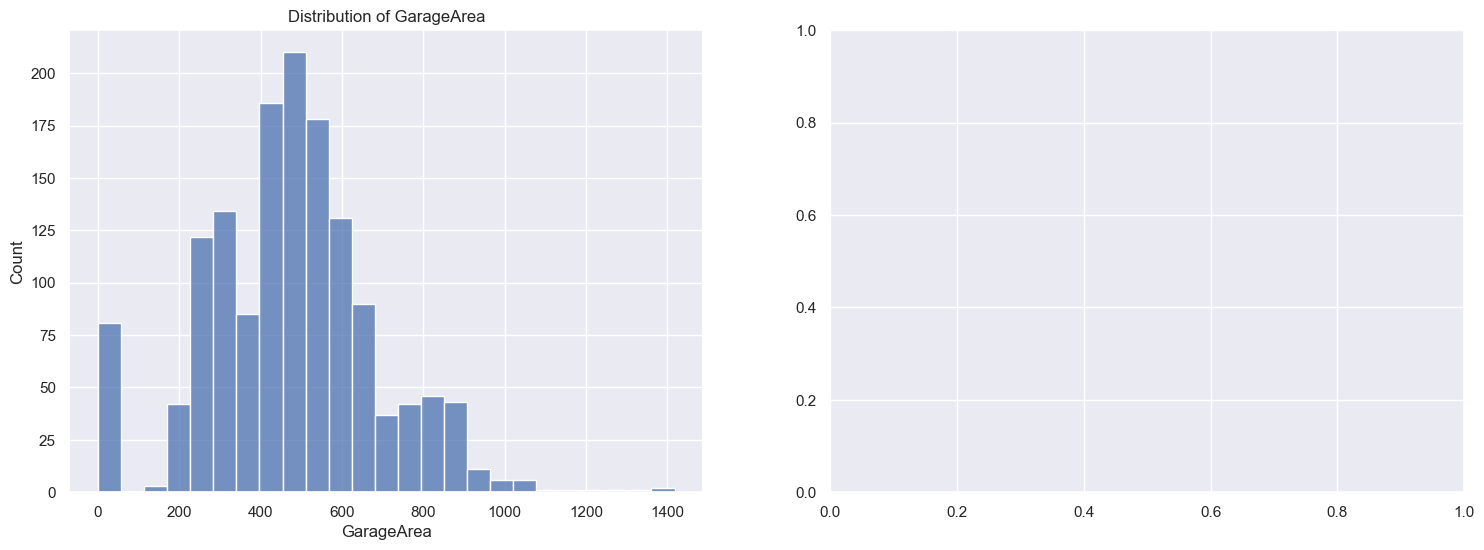

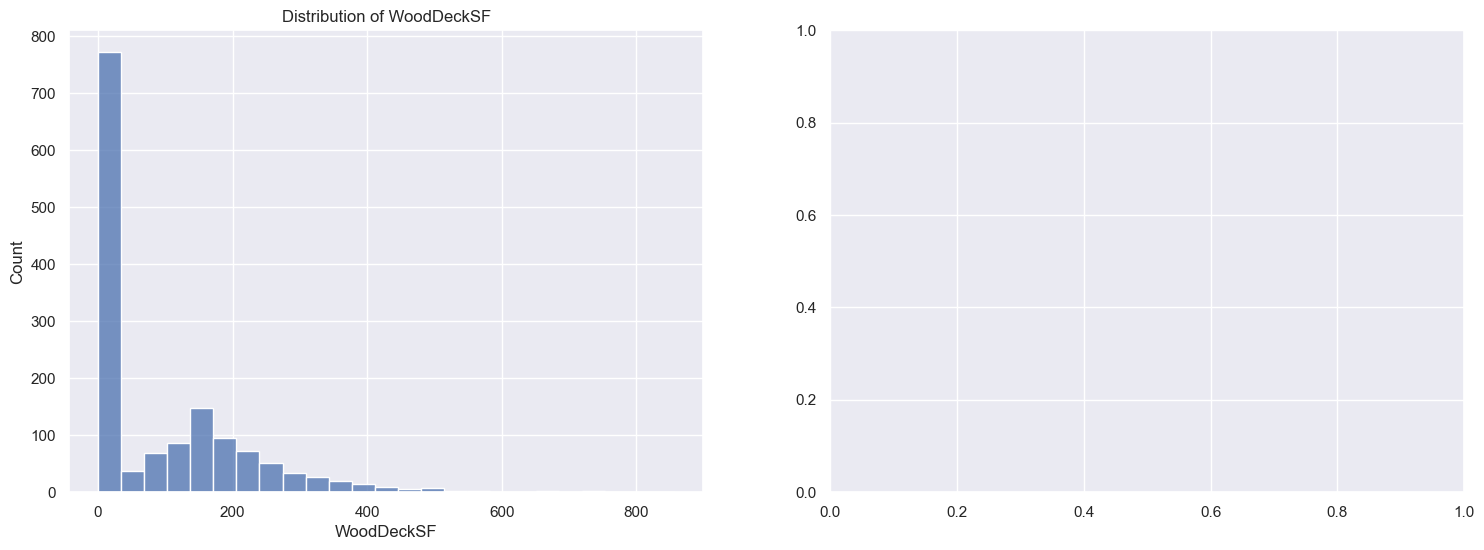

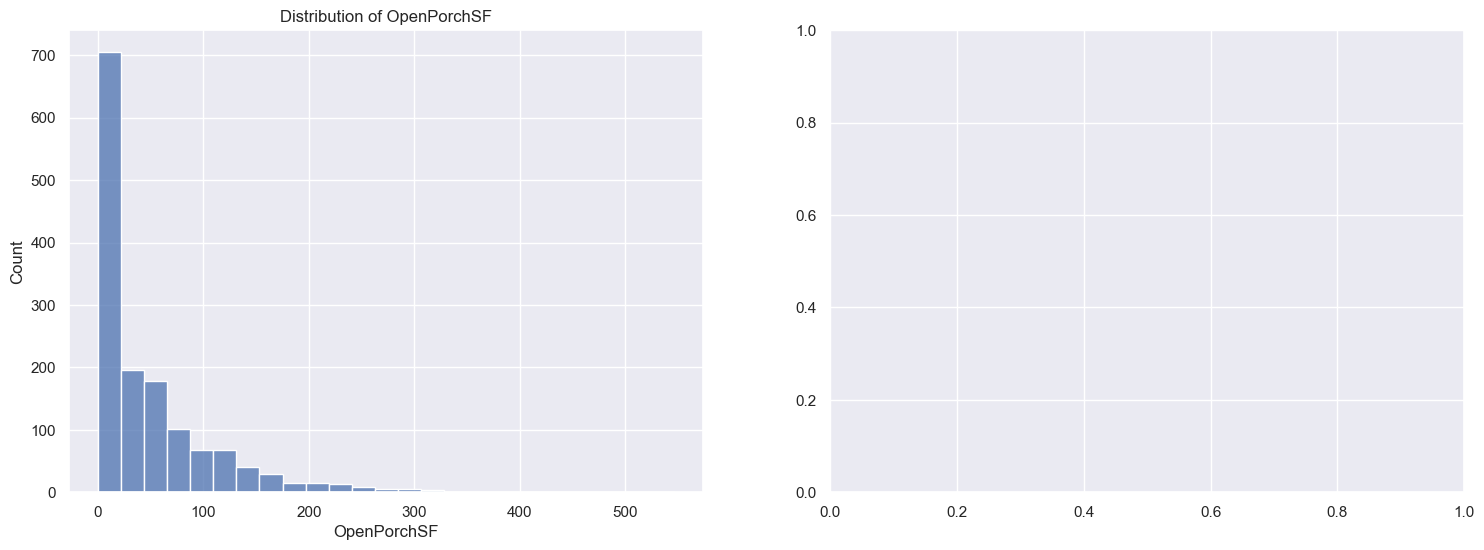

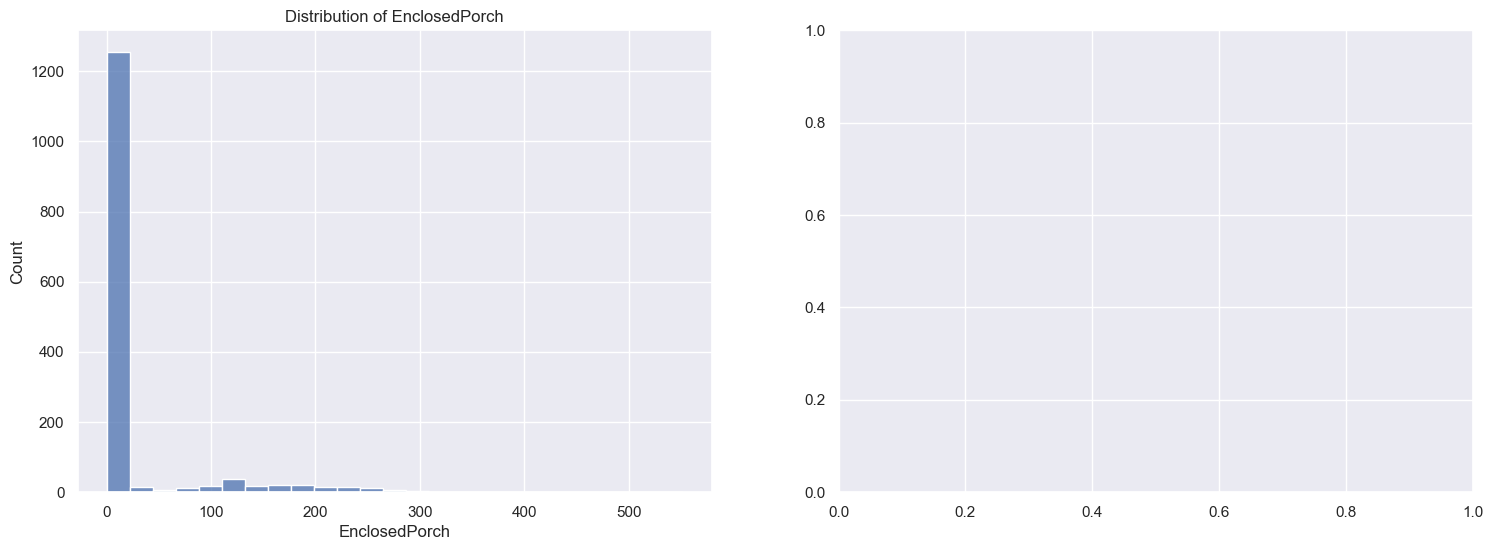

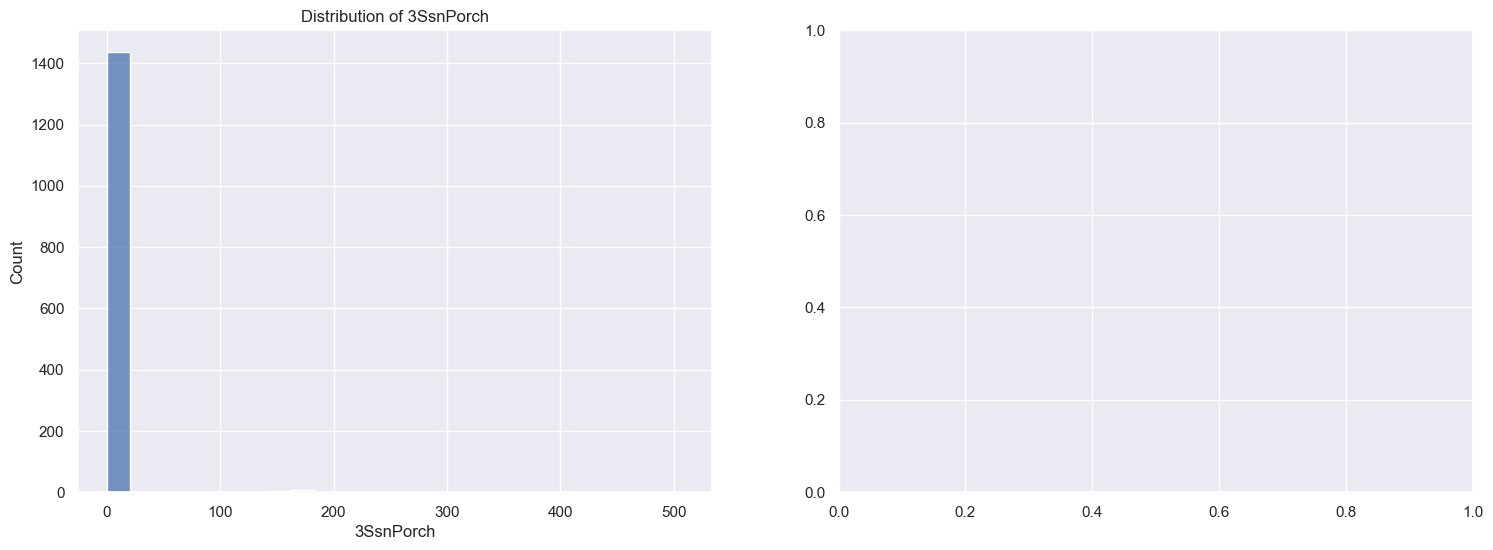

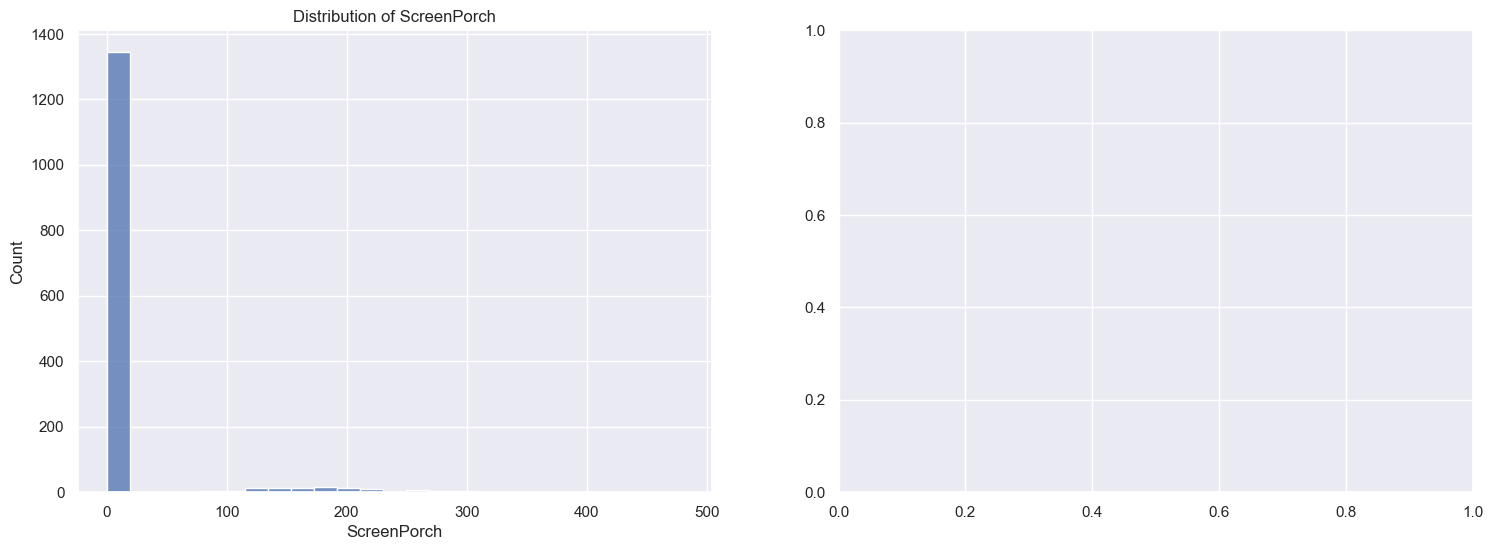

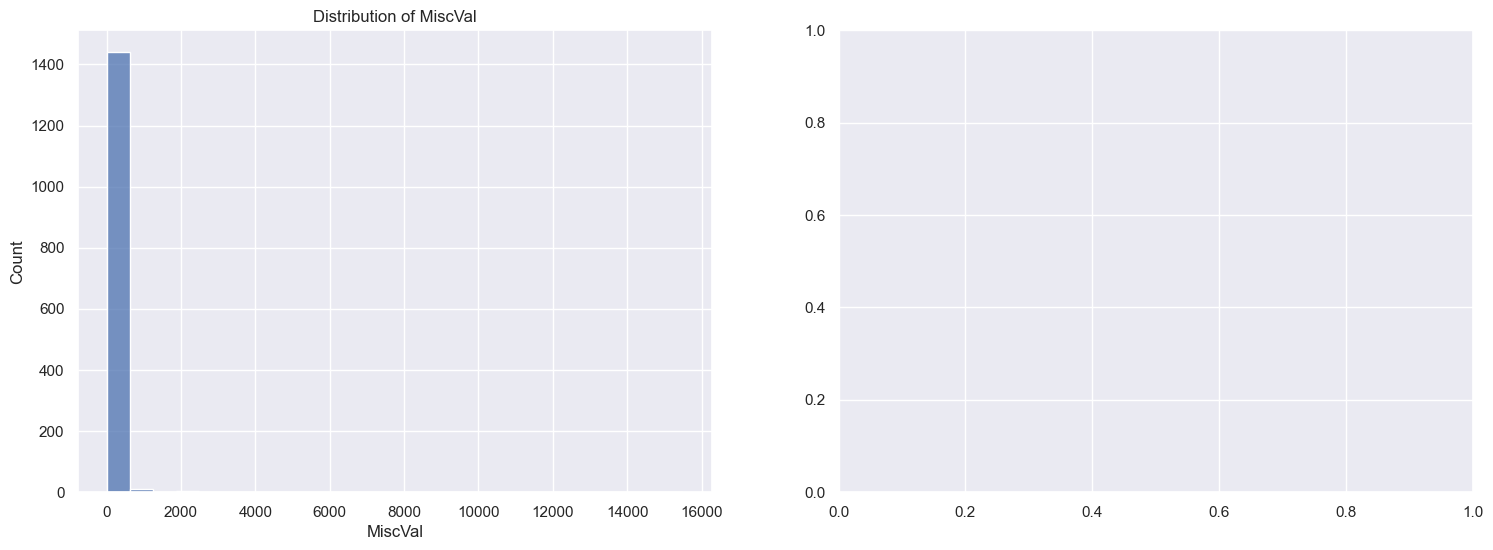

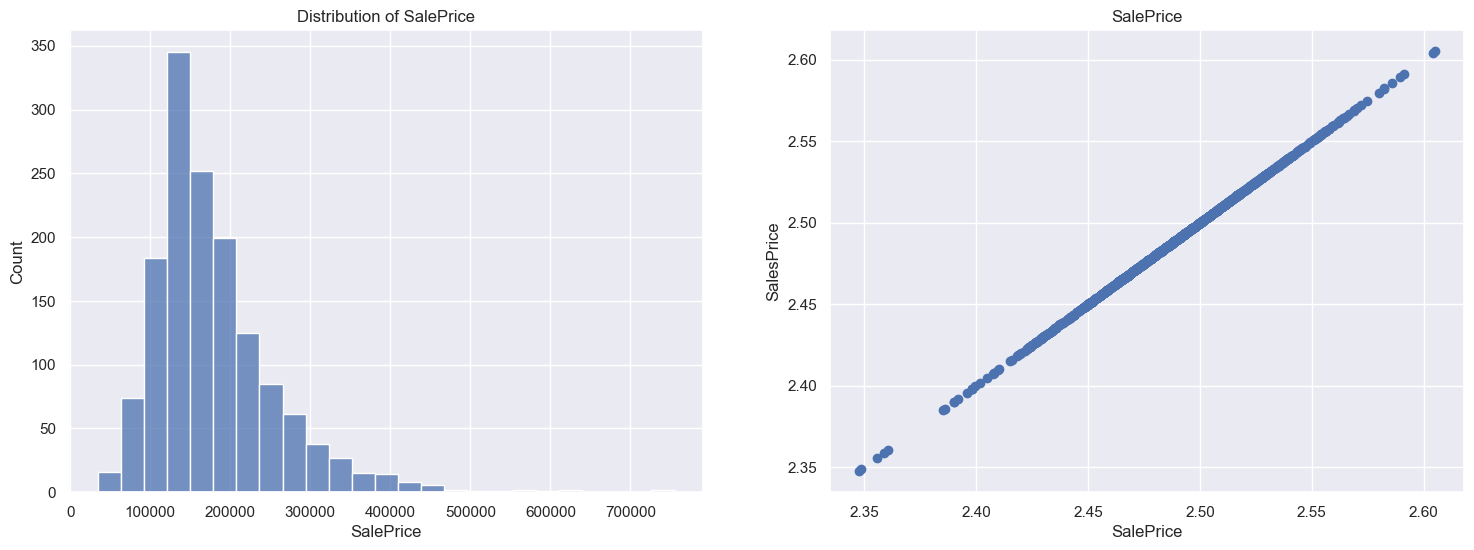

In [606]:
#step 1- we will use histograms to understand the distribution of these features
#step2 - we will transform the features into logarithmic form and then plot scatterplot to understand the trend.


for feature in continuous_feature:
    data=dataset.copy()
    
    plt.figure(figsize=(18,6))
    plt.subplot(121)
    sns.histplot(data=dataset, x=feature, bins=25)
    plt.title('Distribution of '+feature)
    
    plt.subplot(122)
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['SalePrice']=np.log(data['SalePrice'])
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalesPrice')
        plt.title(feature)
    plt.show()

**Although the analysis reveals information but there is not much clearity in the pattern. These feature can be sliced to go deeper inside and dig to get more meaningful insights.** 

#### Price ~ LotFrontAge

In [607]:
dataset.LotFrontage.describe()

count   1201.00
mean      70.05
std       24.28
min       21.00
25%       59.00
50%       69.00
75%       80.00
max      313.00
Name: LotFrontage, dtype: float64

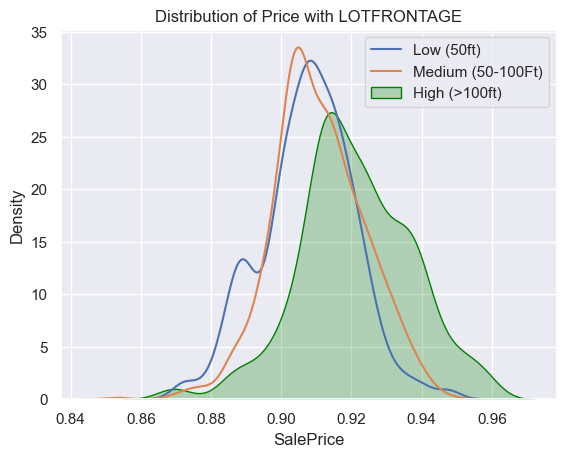

In [608]:
# LotFrontAge Relation with SalePrice by segmenting into 3 categories
sns.kdeplot(np.log(data[data['LotFrontage']<50]['SalePrice']), bw=.25)
sns.kdeplot(np.log(data[(data['LotFrontage']>50)&(data['LotFrontage']<100)]['SalePrice']), bw=0.25)
sns.kdeplot(np.log(data[data['LotFrontage']>100]['SalePrice']), bw=0.3, color='green', shade=True)
plt.title('Distribution of Price with LOTFRONTAGE')
plt.legend(['Low (50ft)', 'Medium (50-100Ft)', 'High (>100ft)'])

<div style="border-radius:10px;
            border : black solid;
            background-color: #EAE486;
            font-size:100%;
            text-align: left">

<h3 style='; border:0; border-radius: 15px; font-weight: bold; color:black'><center> Observation
</center></h3>  
1. Although there is a linear pattern noticed between the Street connected to the property and the Price from the scatterplot but this is True when the length of the Street connected to the property is Larger than 100 feet. 
2. The Avg. Price of Lower & Medium LotFrontAge are almost similar.

#### Price ~ LotArea

In [609]:
df=dataset.copy()

In [610]:
df=df[['LotFrontage', 'LotArea', 'SalePrice']]

In [611]:
q1=np.quantile(df.LotArea, 0.25)
q2=np.quantile(df.LotArea, 0.5)
q3=np.quantile(df.LotArea, 0.75)
q4=np.quantile(df.LotArea,0.99)
df['LotC']=pd.cut(x=df.LotArea, bins=[q1,q2,q3,q4], labels=['Low Area', 'Medium Area', 'High Area'])

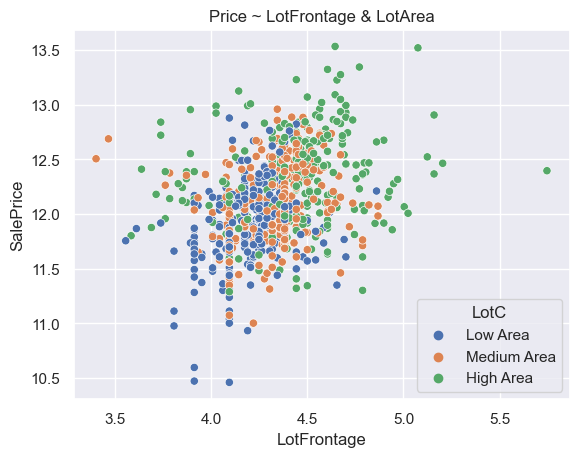

In [612]:
plt.title('Price ~ LotFrontage & LotArea')
sns.scatterplot(data=df, x=np.log(df.LotFrontage), y=np.log(df.SalePrice), hue='LotC');

    Similar pattern is noticed with LotArea. Properties which have larget Linear street (LotFrontage) connected with Larger Lot Area are the costliest.

## 4.7 Analysis with Categorical Variables

### 4.7.1 Unique Categories in the Variables

In [613]:
#features with categorical variables
categorical_features=[feature for feature in dataset.columns if data[feature].dtypes=='O']

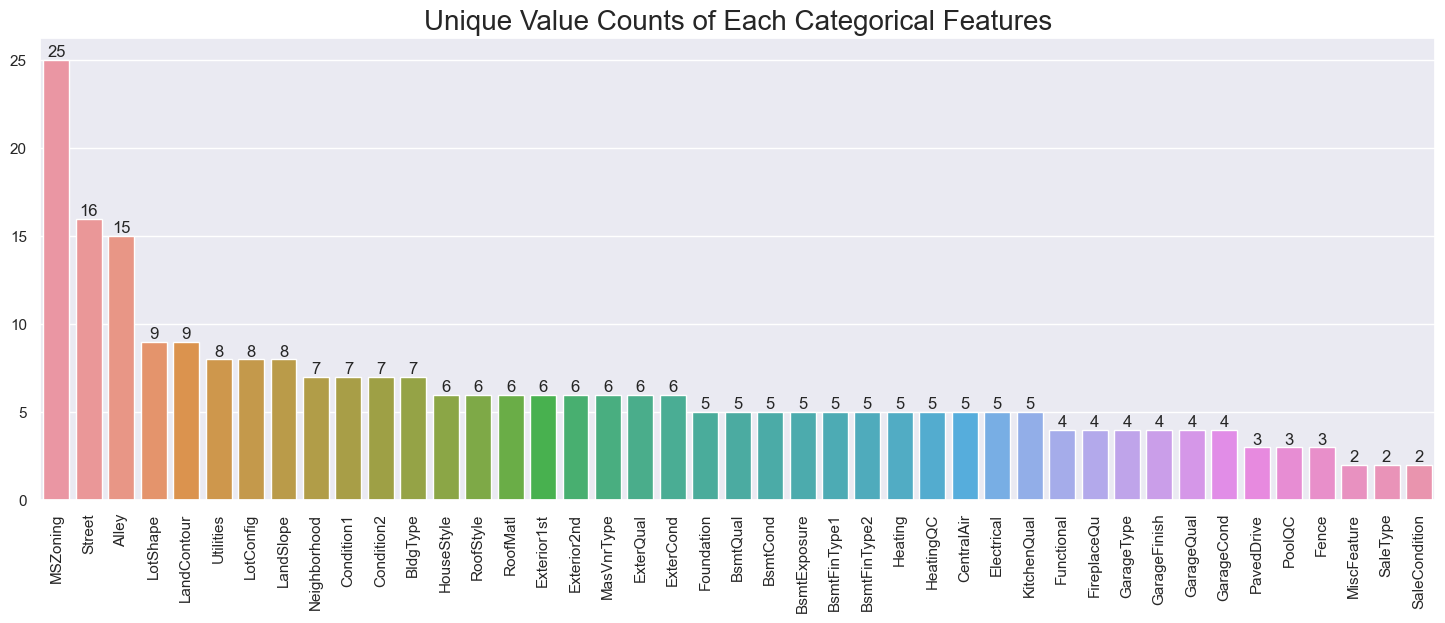

In [614]:
#creating a countplot to check the unique valuecounts of each of the categorical columns
unique_value = []
for col in categorical_features:
    unique_value.append(dataset[col].unique().size)
unique_value.sort(reverse=True)    #sorting the list desc

#plot of Unique value_counts of all the categorical features
plt.figure(figsize=(18,6))
plt.title('Unique Value Counts of Each Categorical Features', fontsize=20)
plt.xticks(rotation=90)
ax = sns.barplot(x=categorical_features,y=unique_value);

#displaying the labels of the unique values
for i in ax.containers:
    ax.bar_label(i,)

### 4.7.2 Price Trend with the Categorical Variables

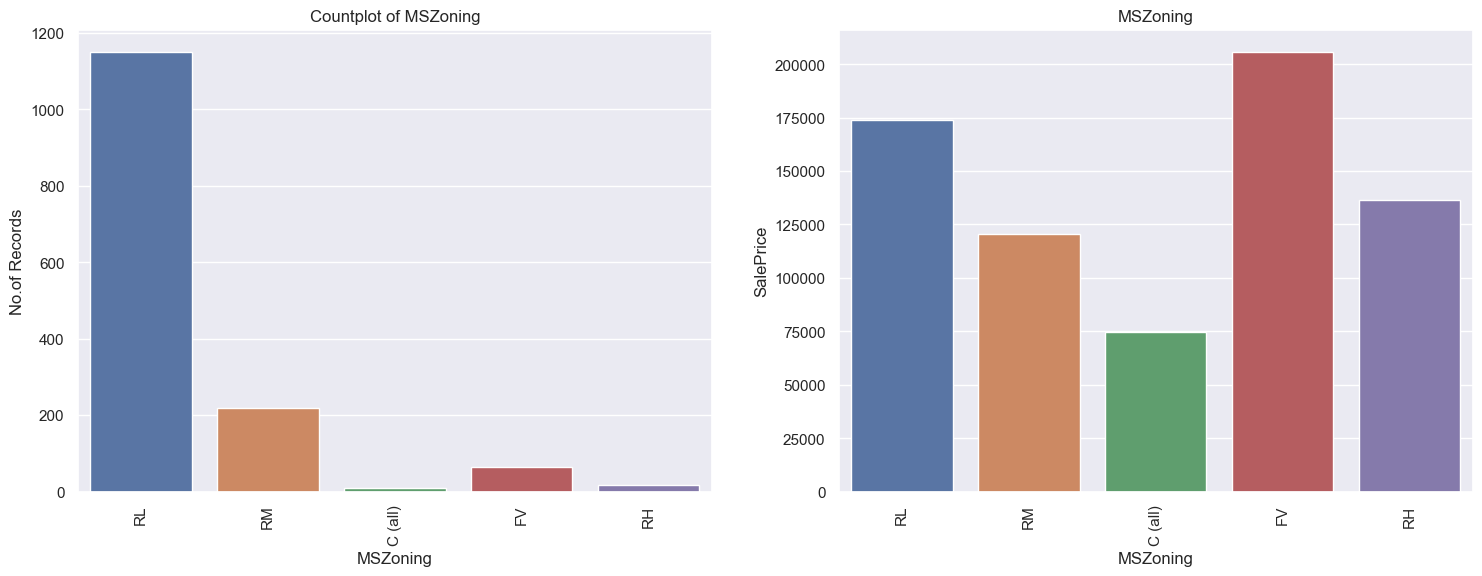

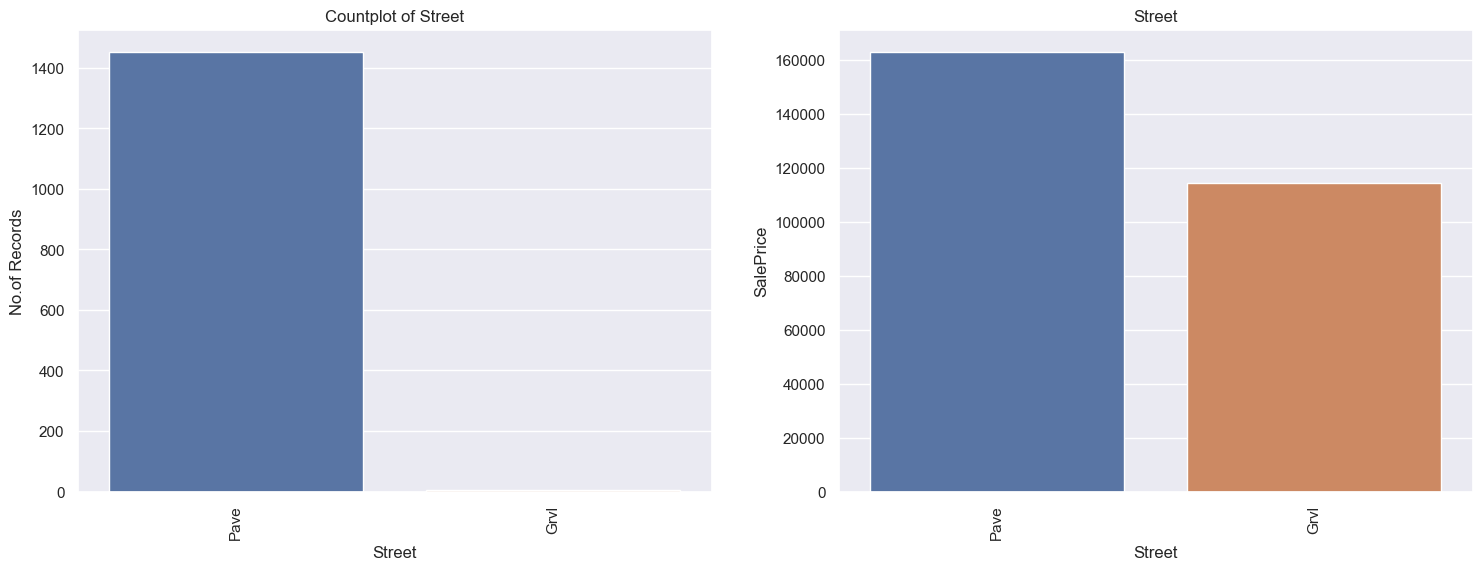

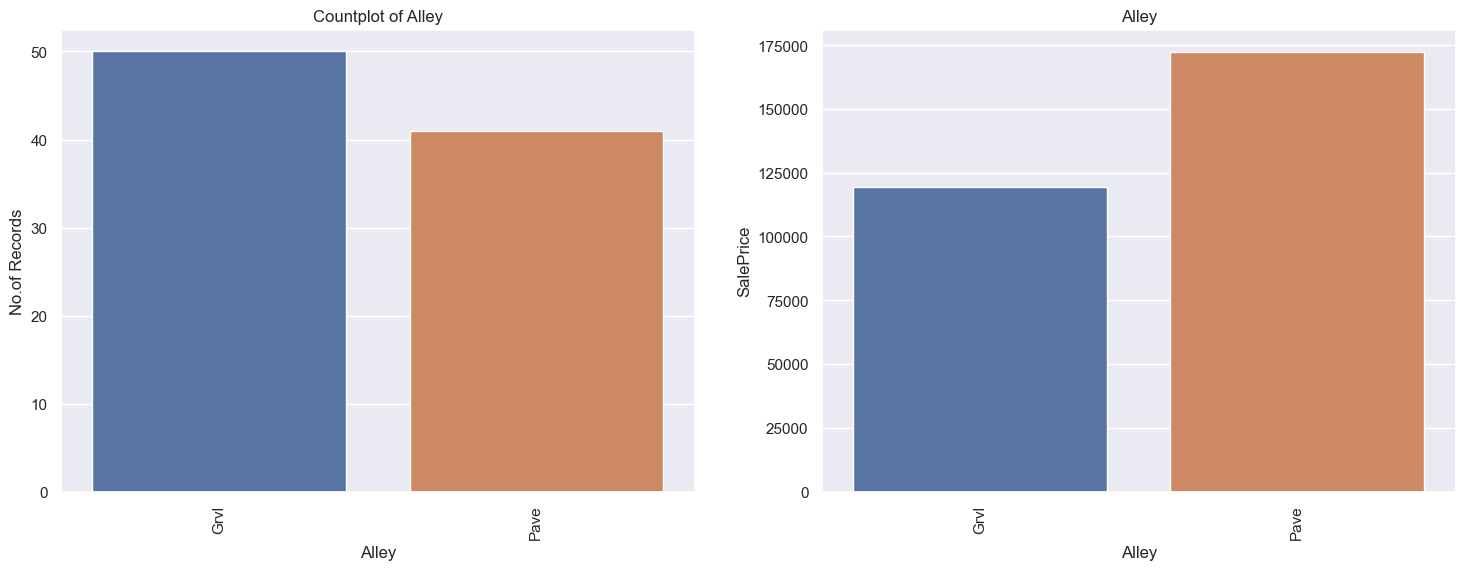

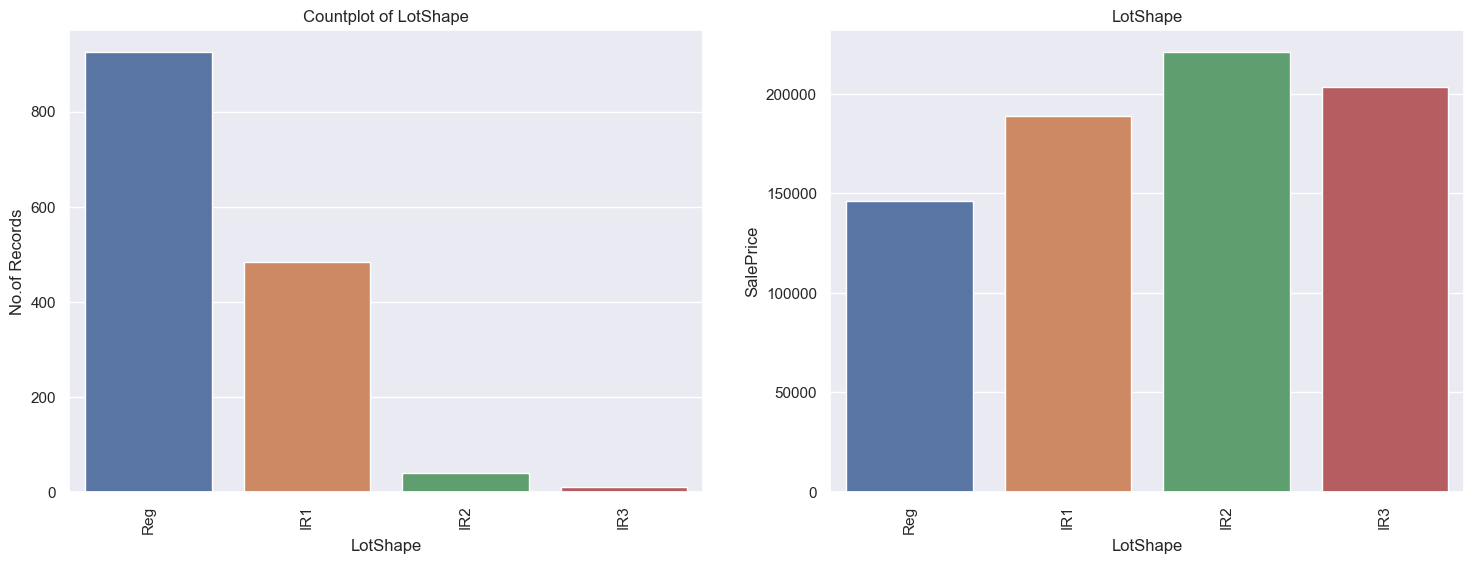

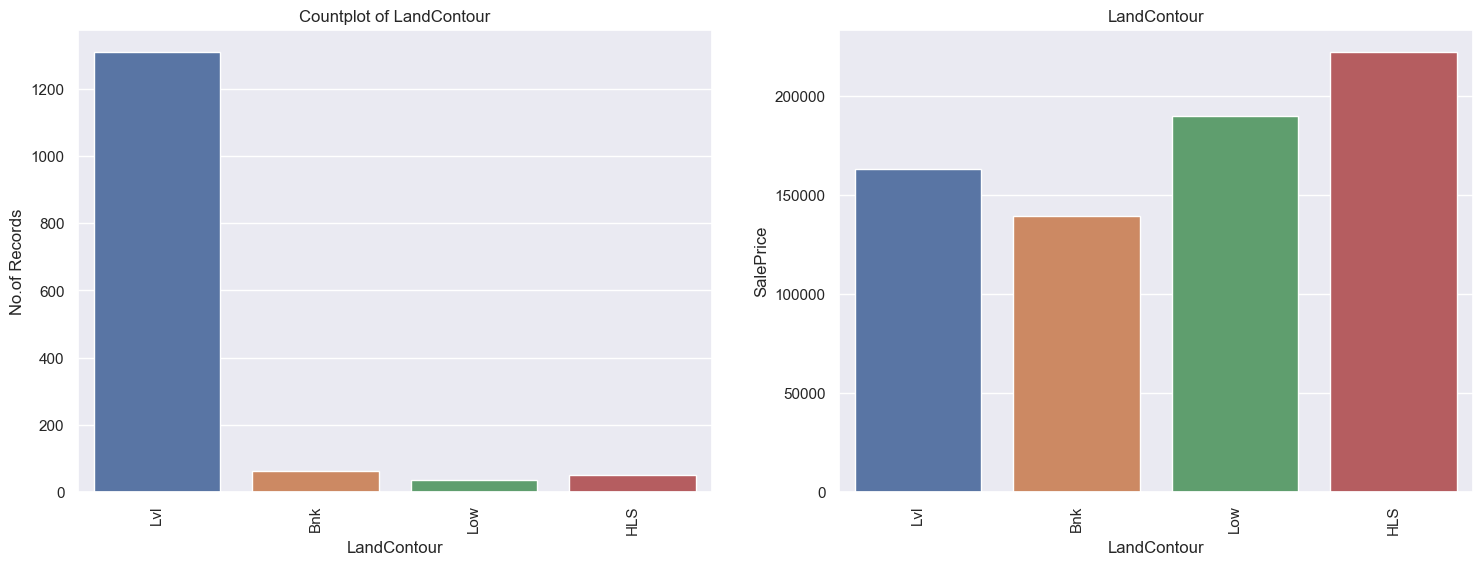

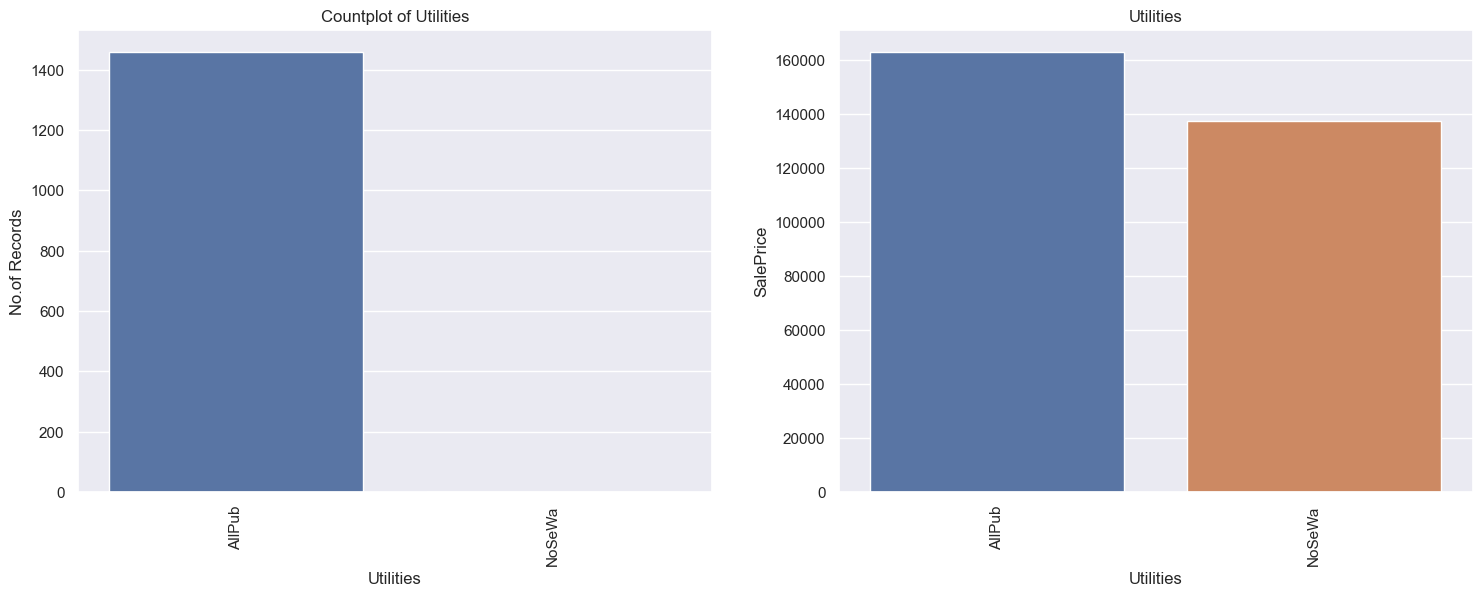

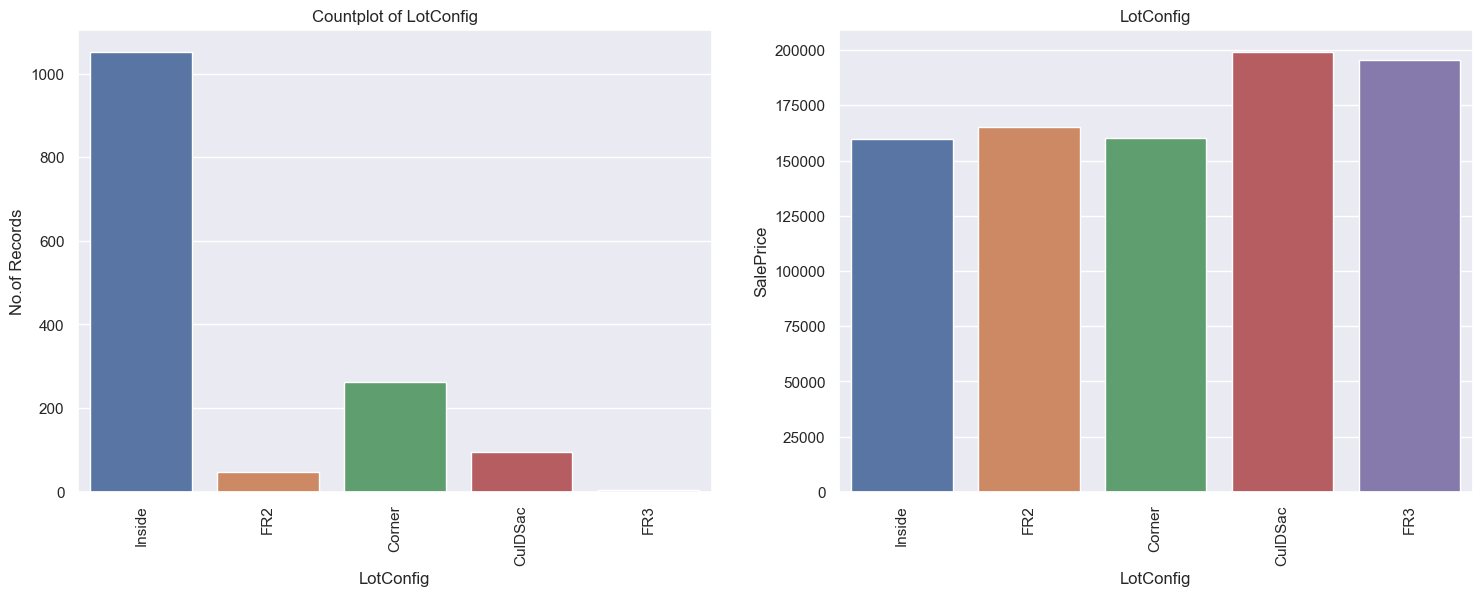

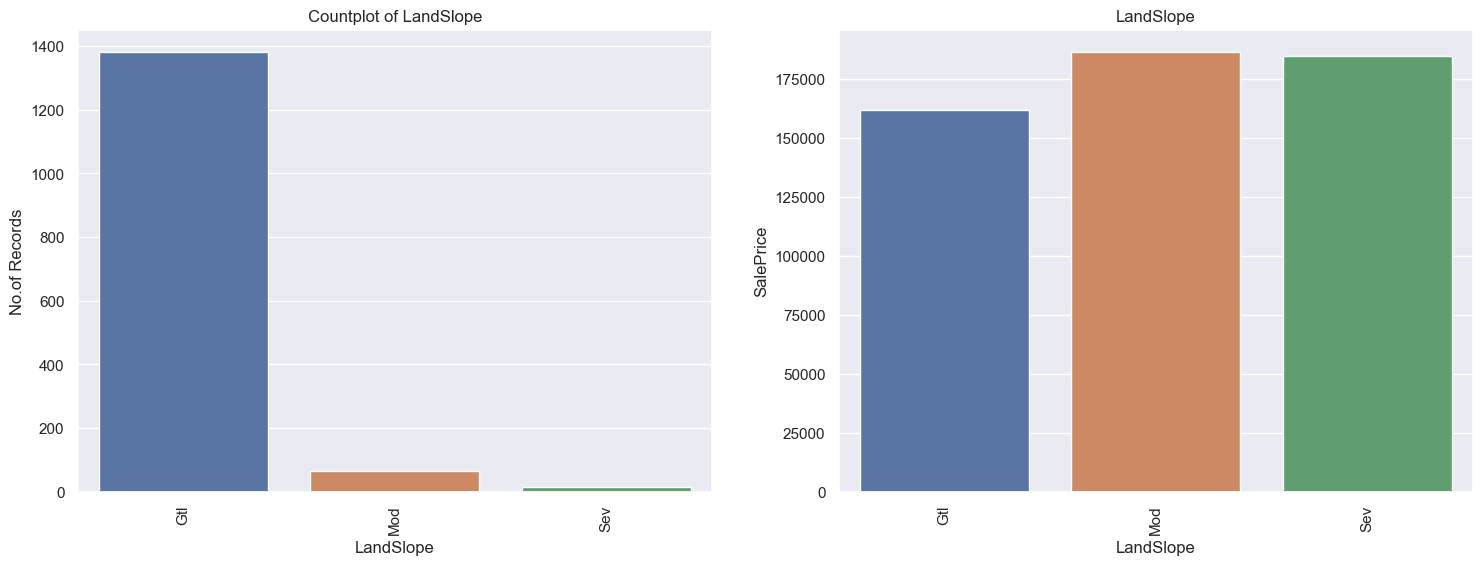

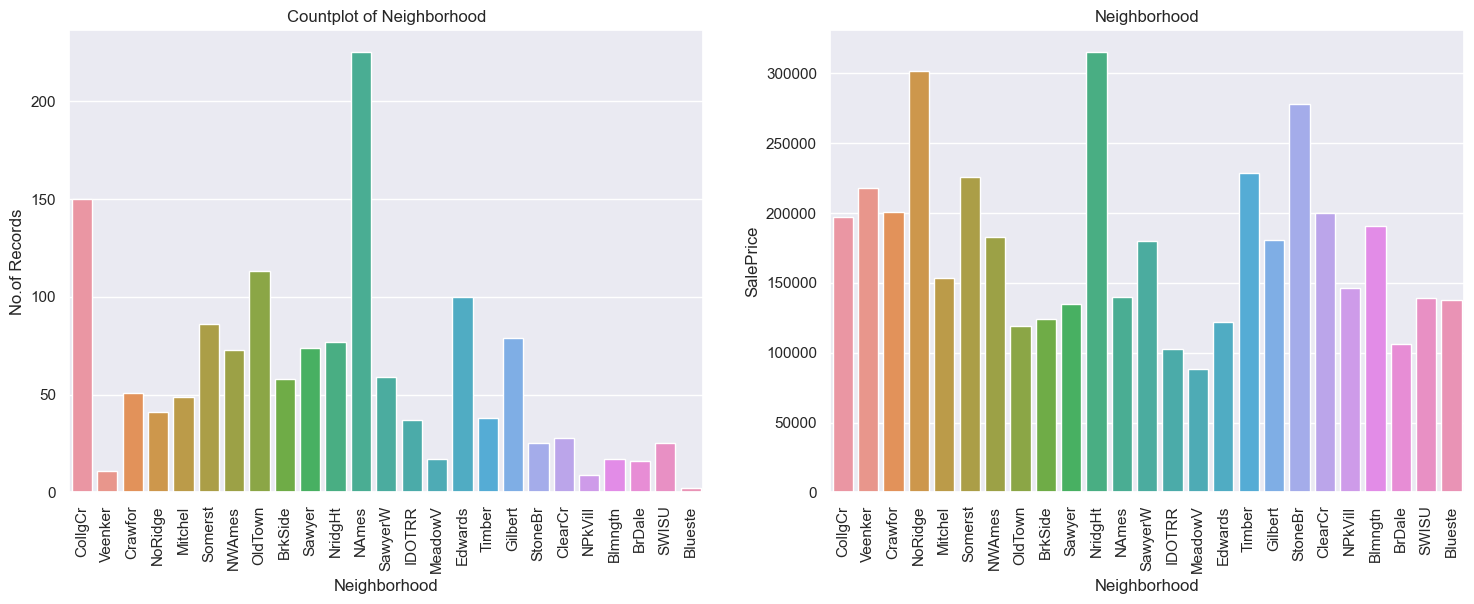

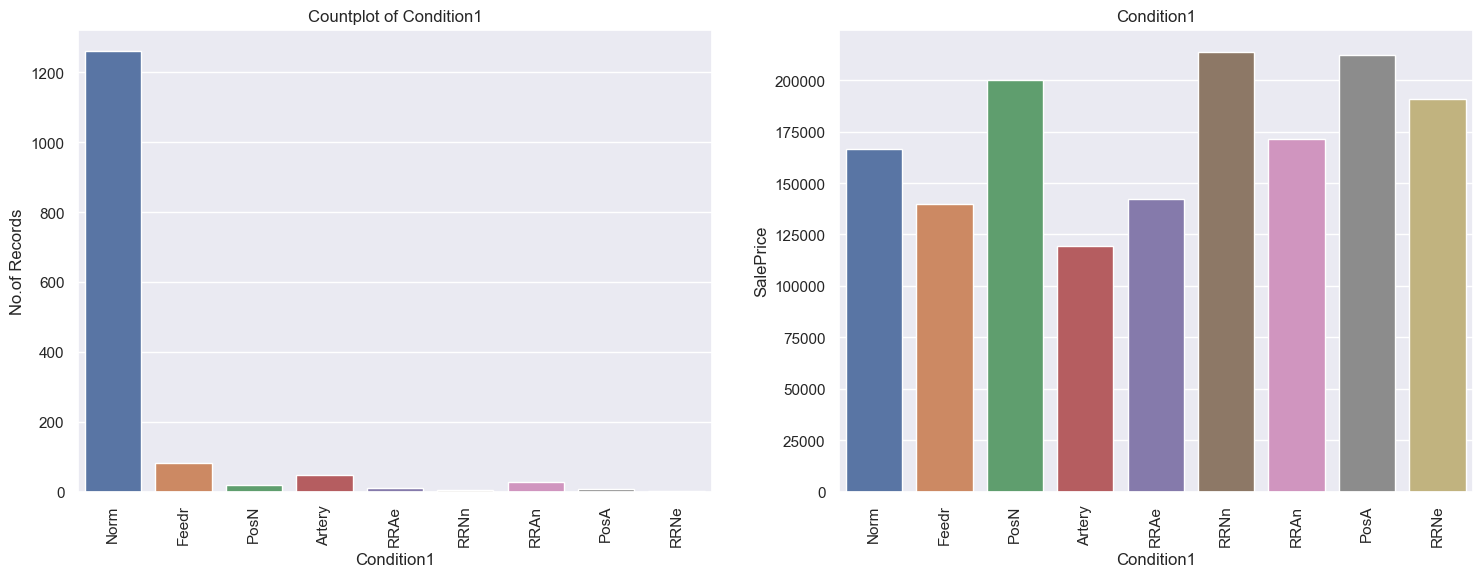

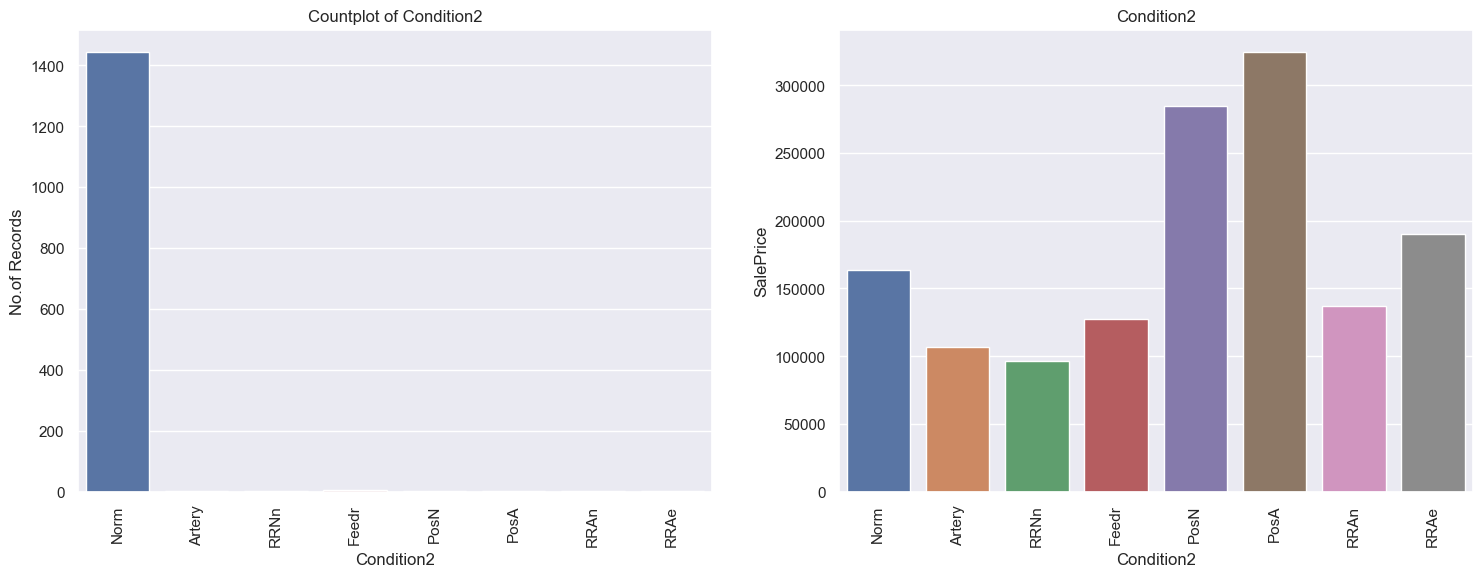

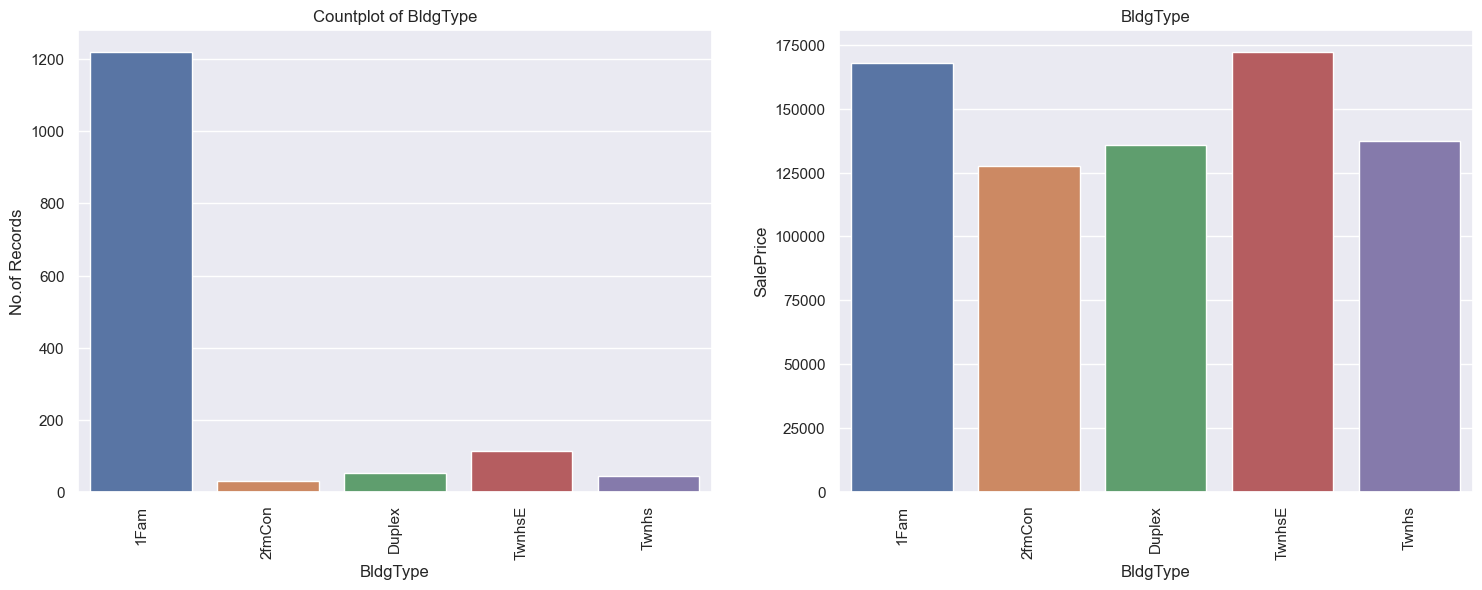

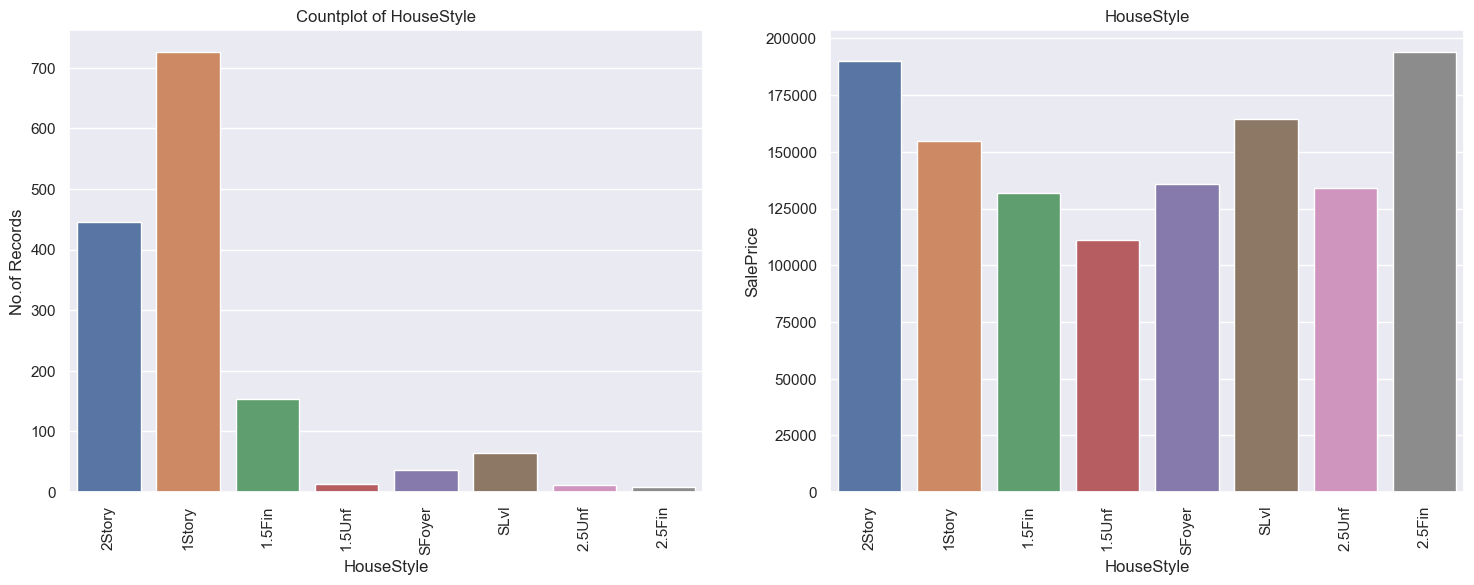

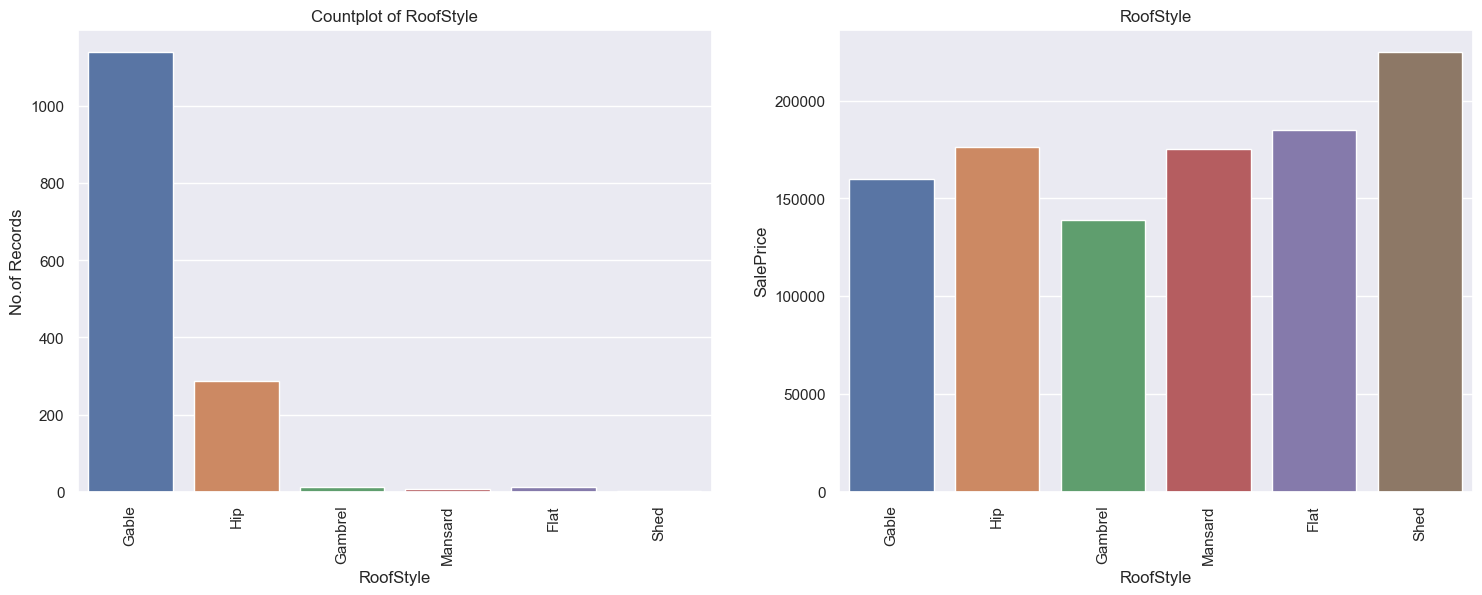

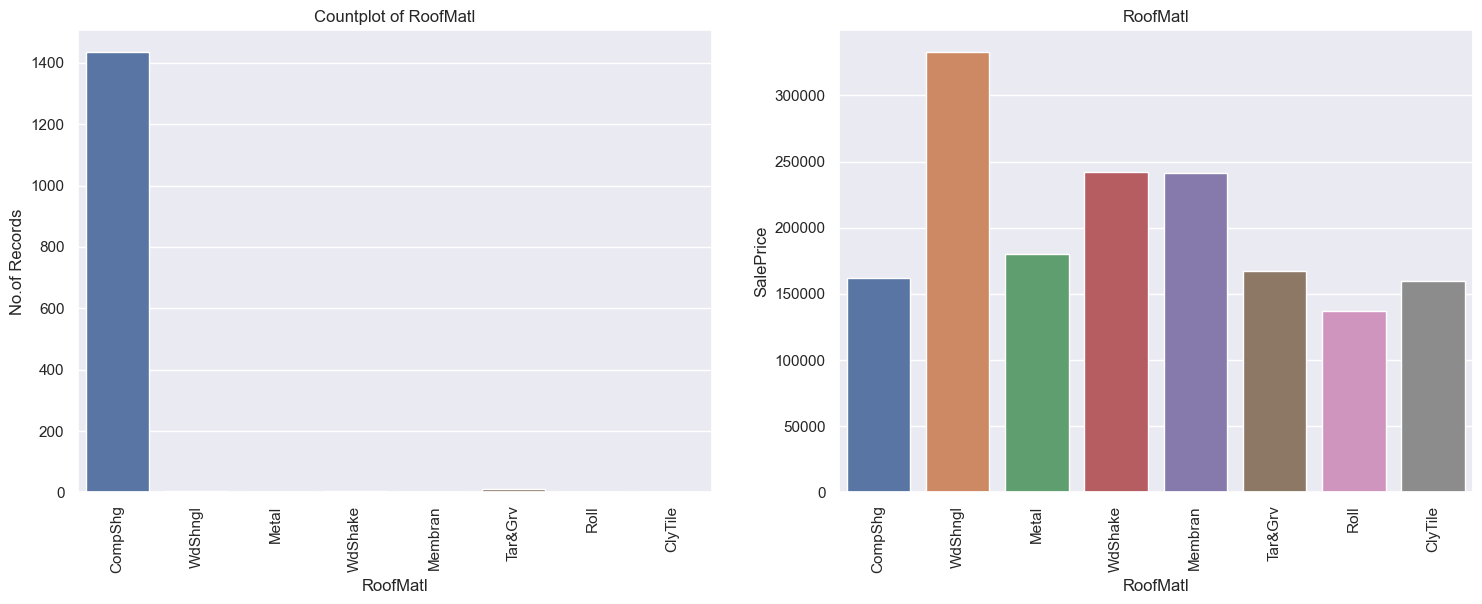

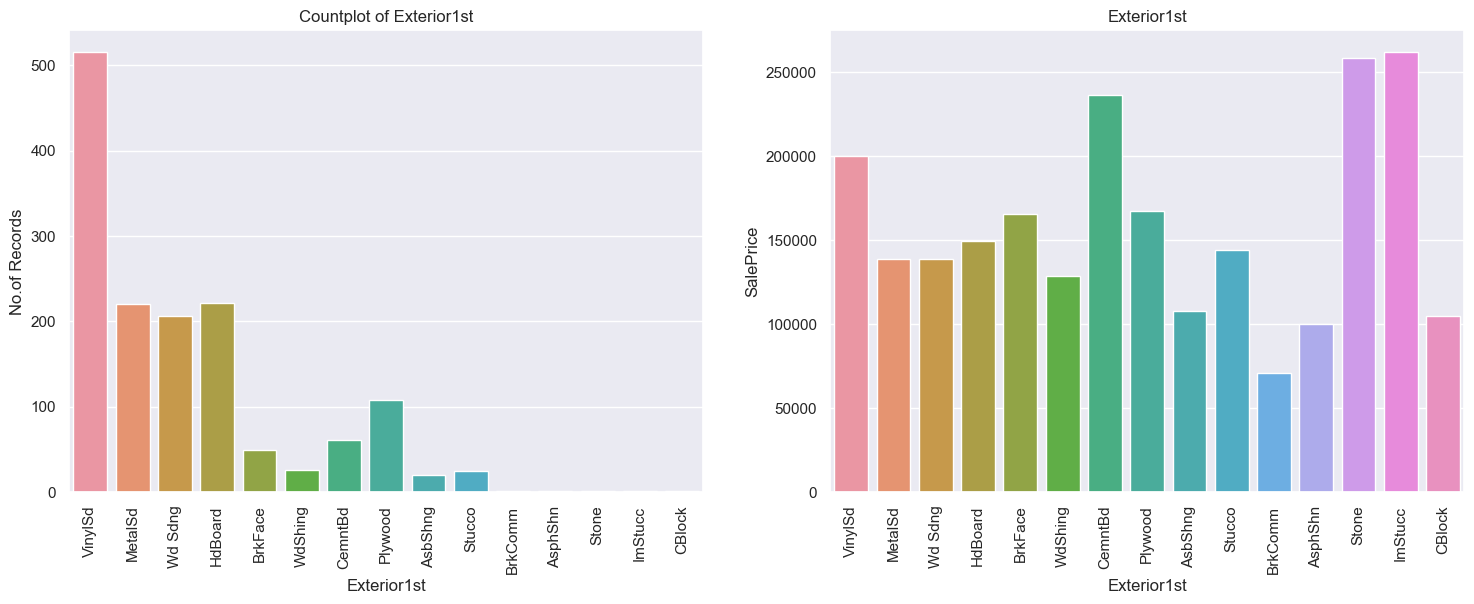

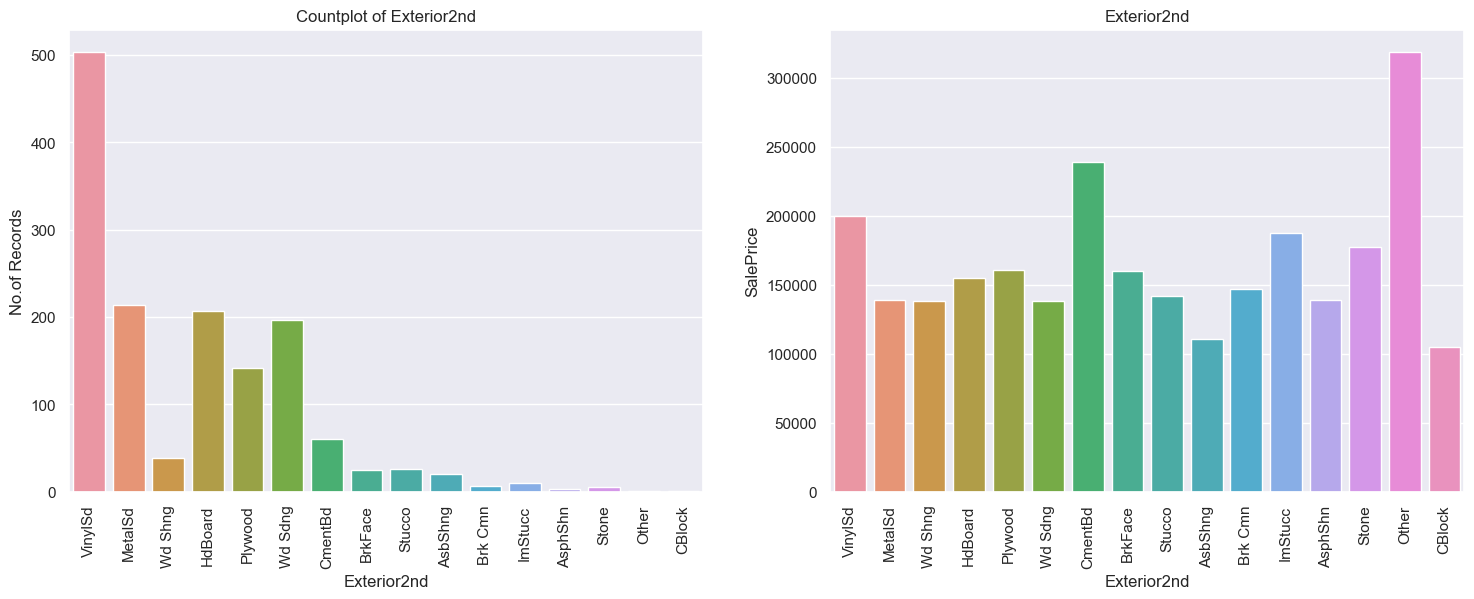

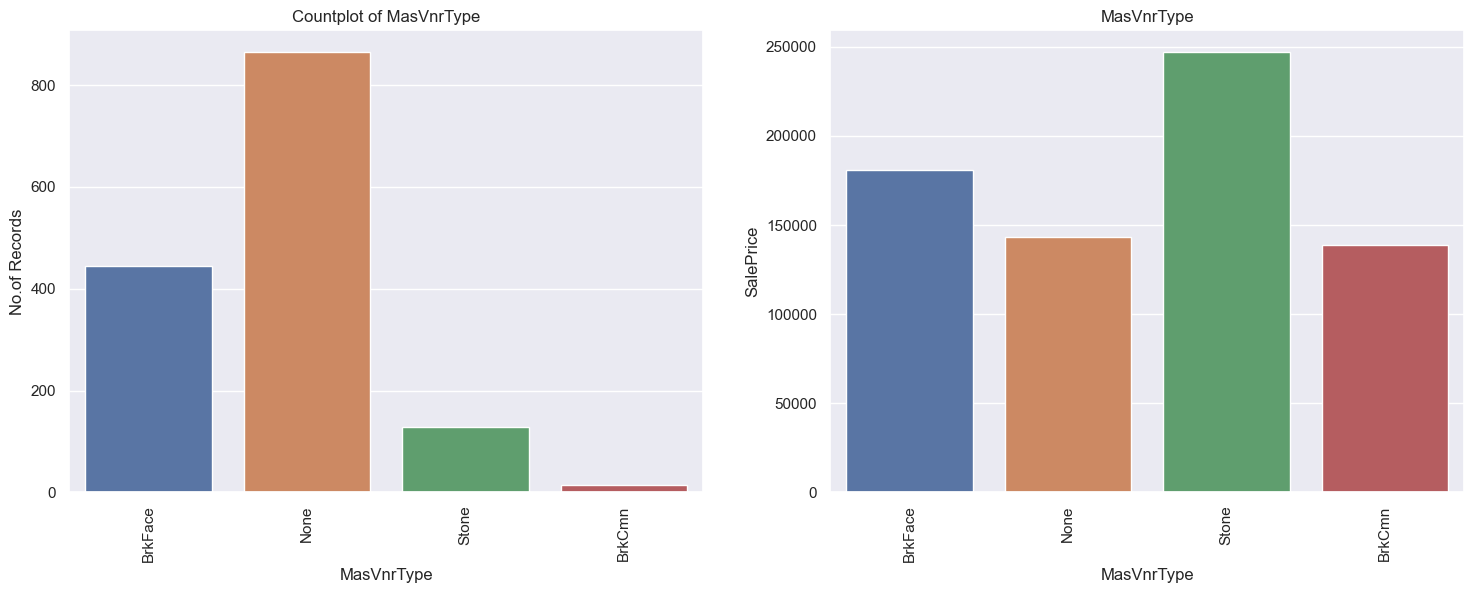

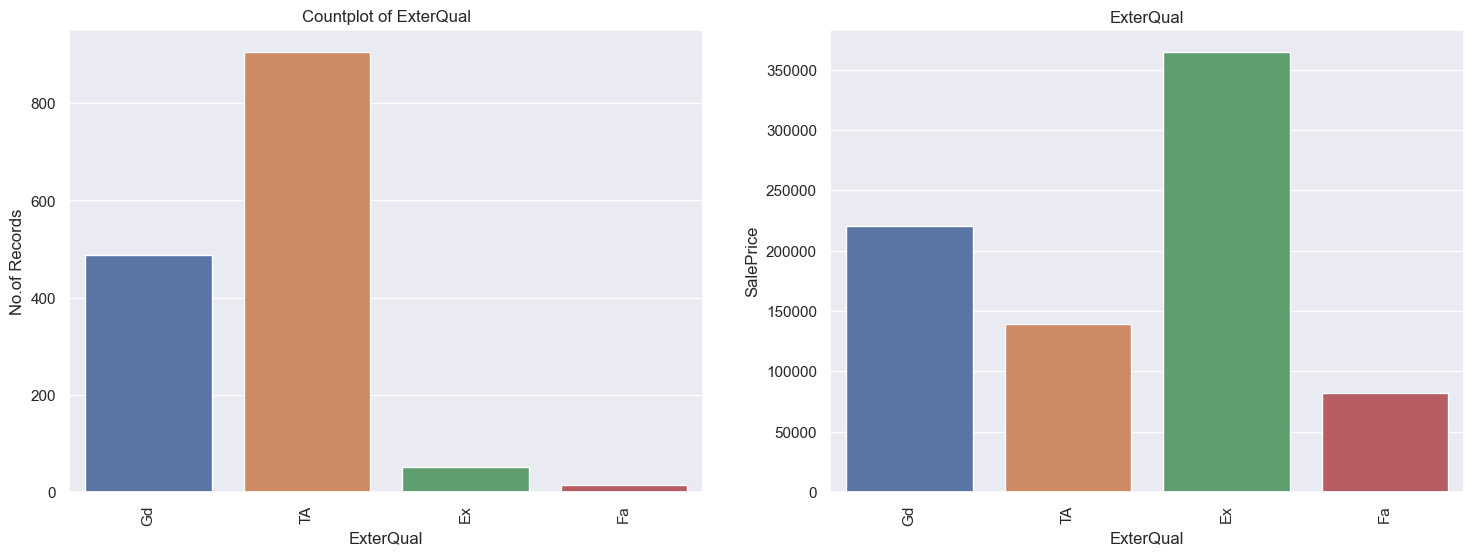

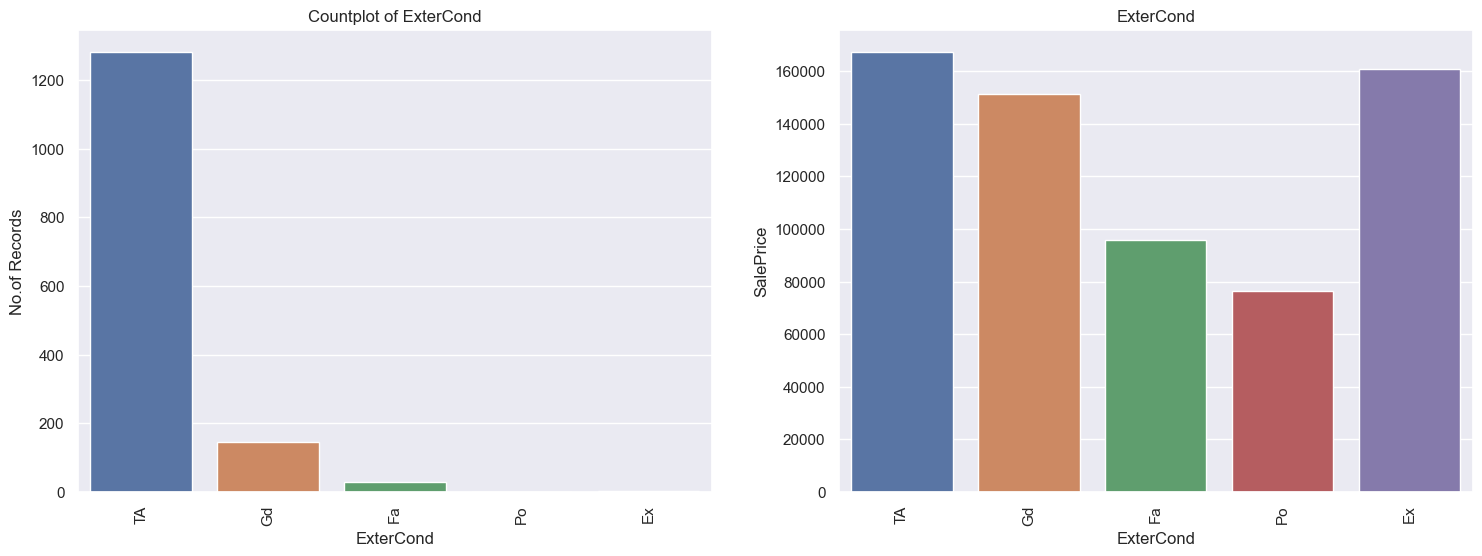

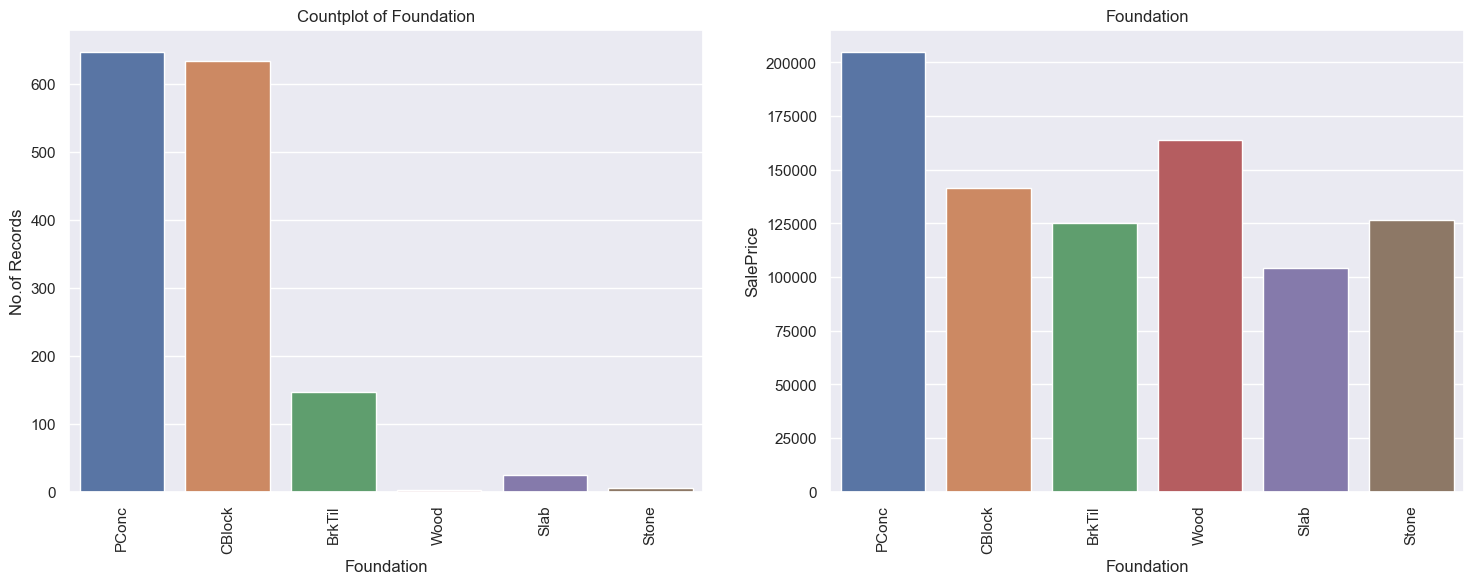

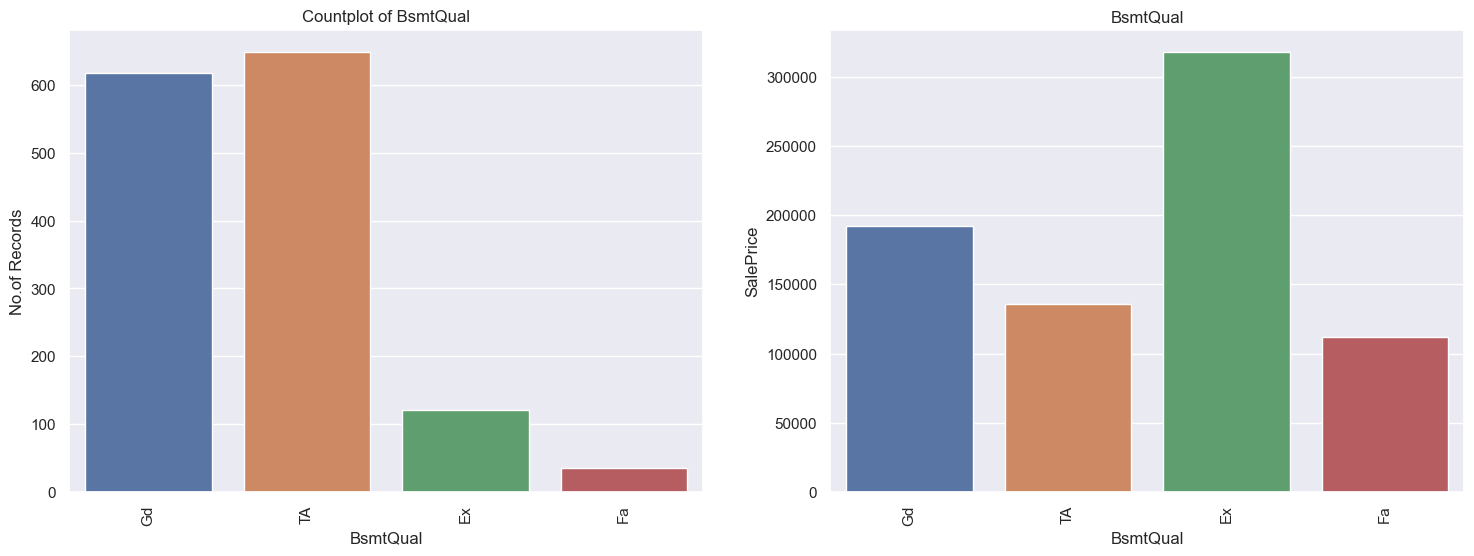

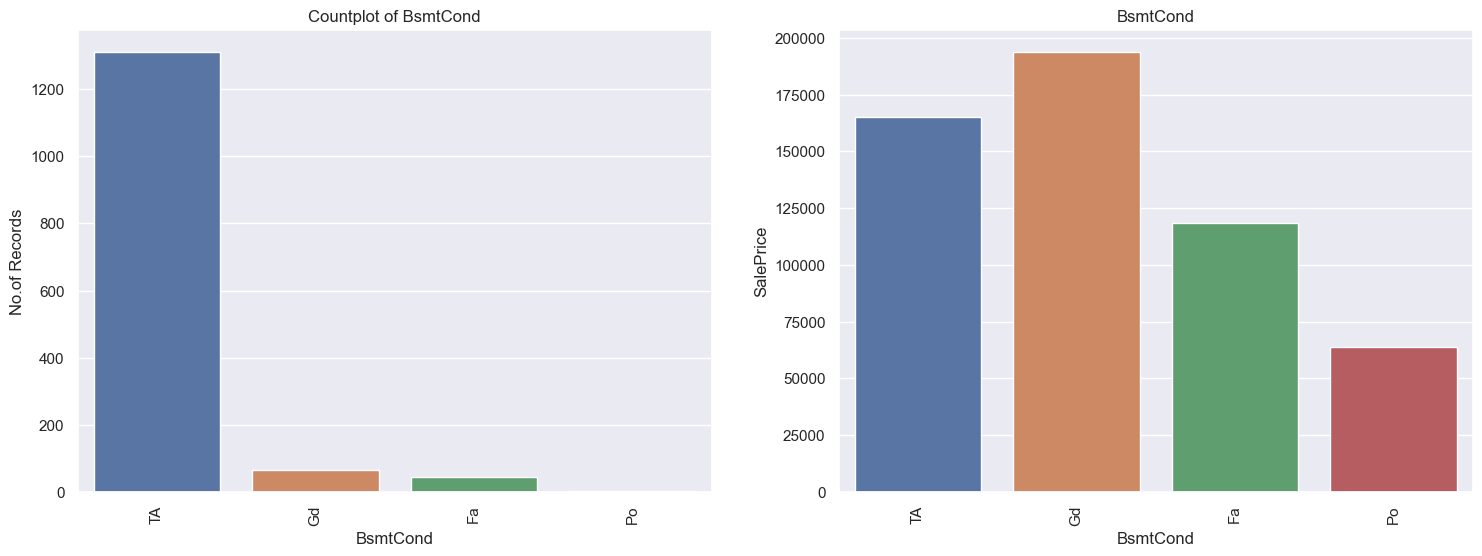

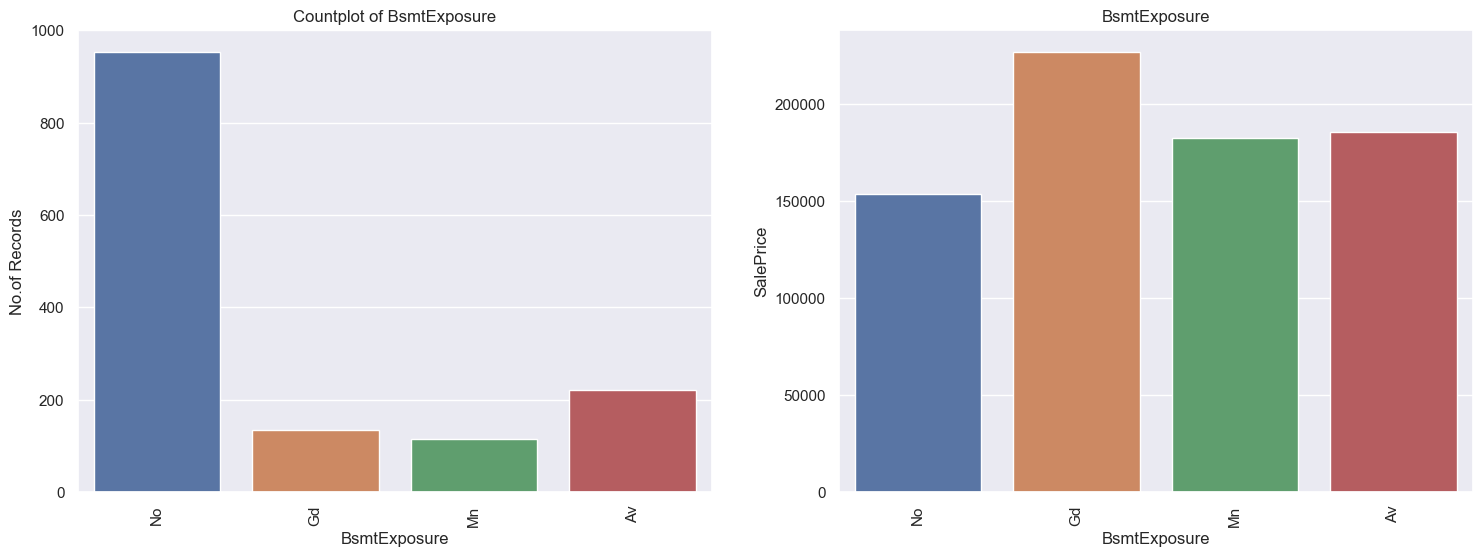

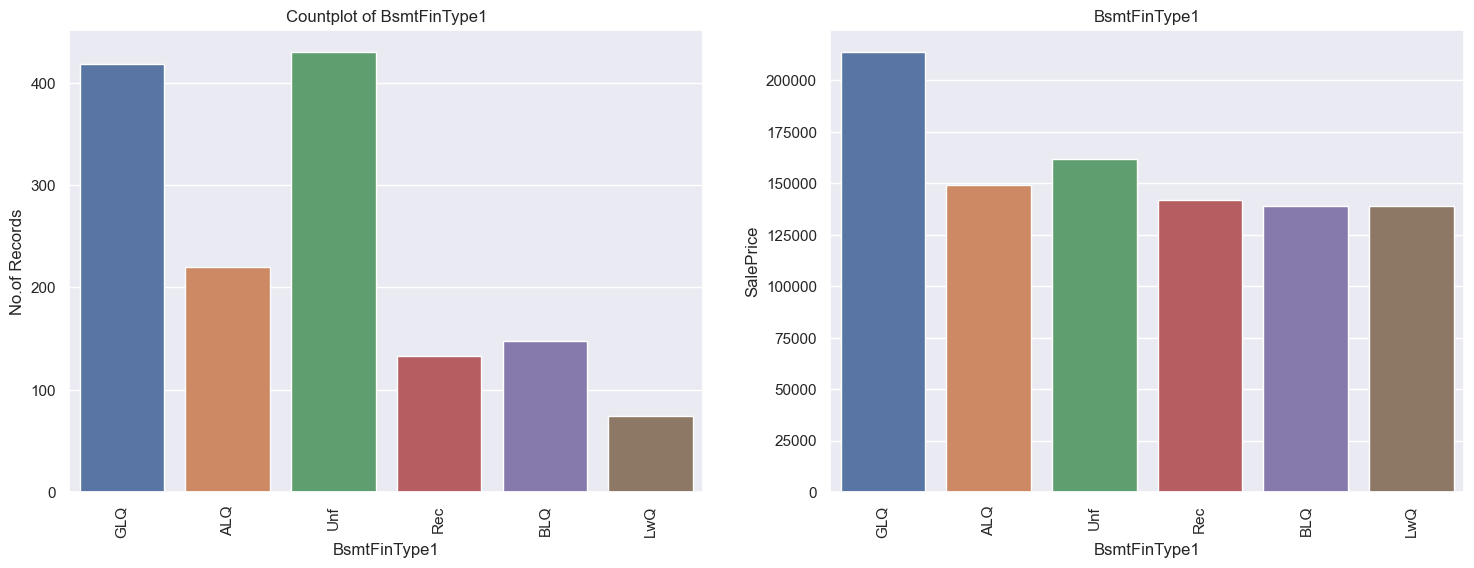

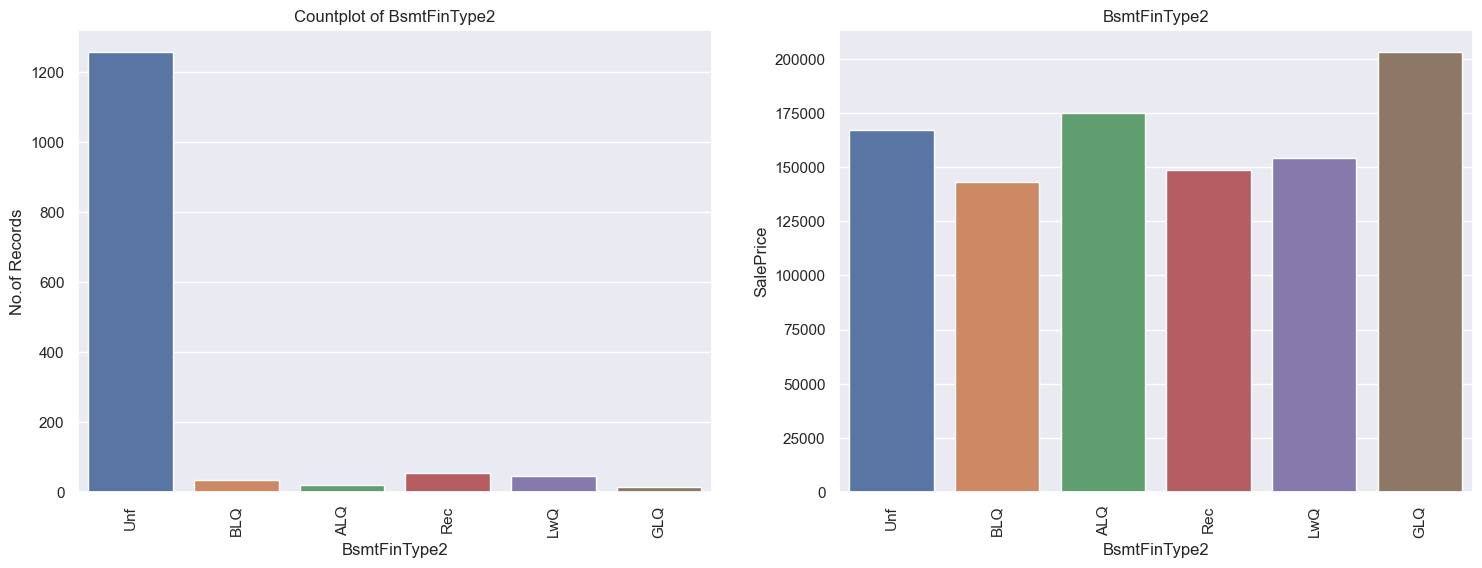

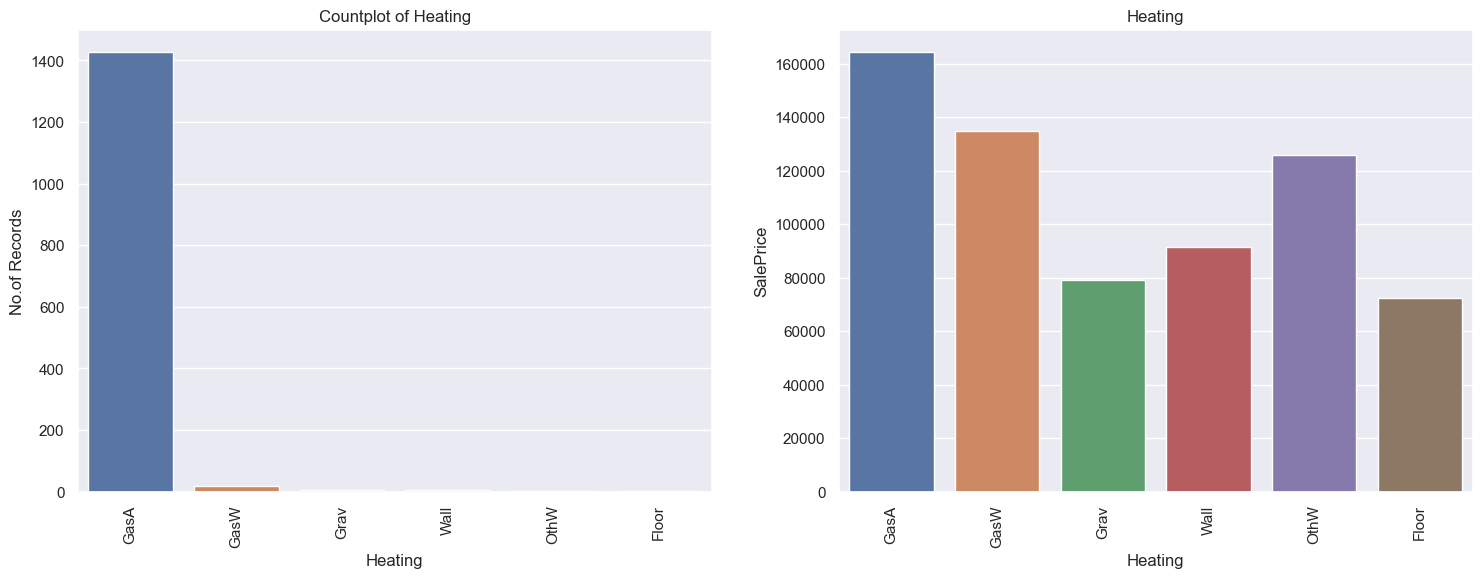

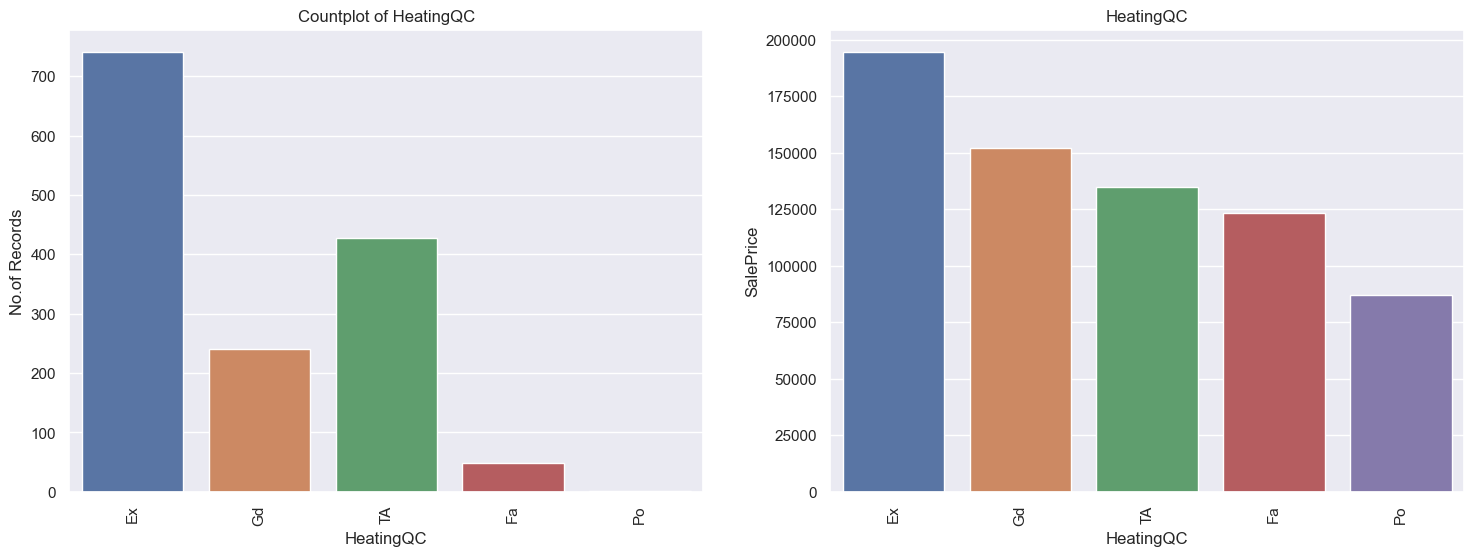

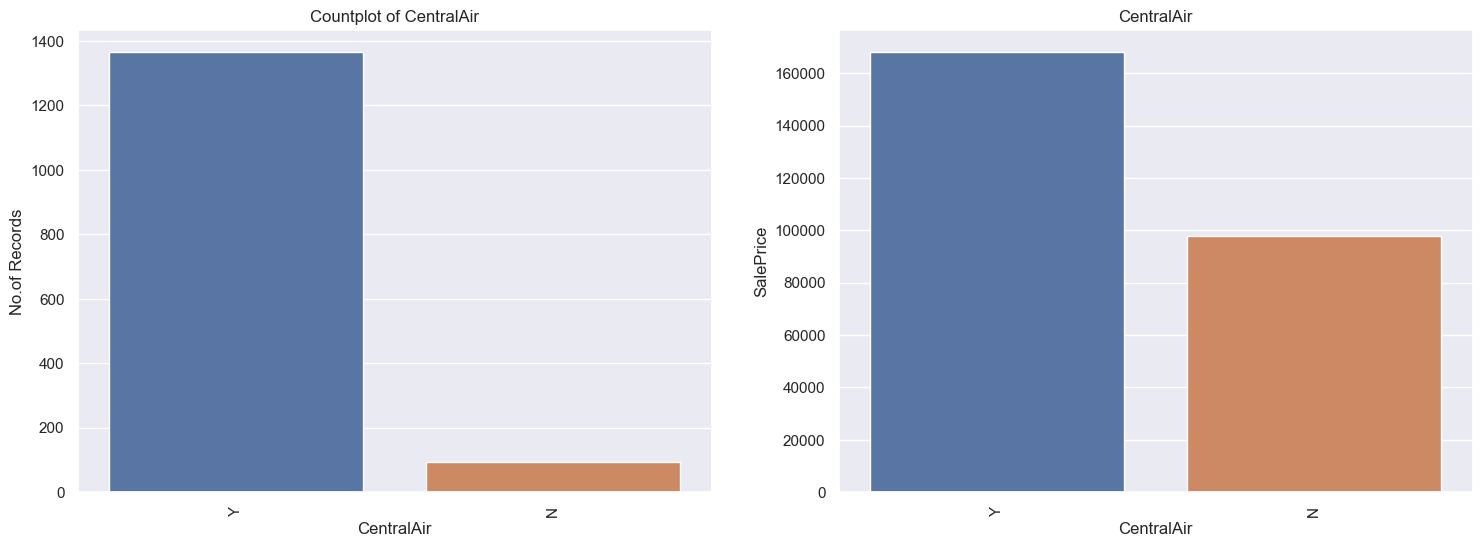

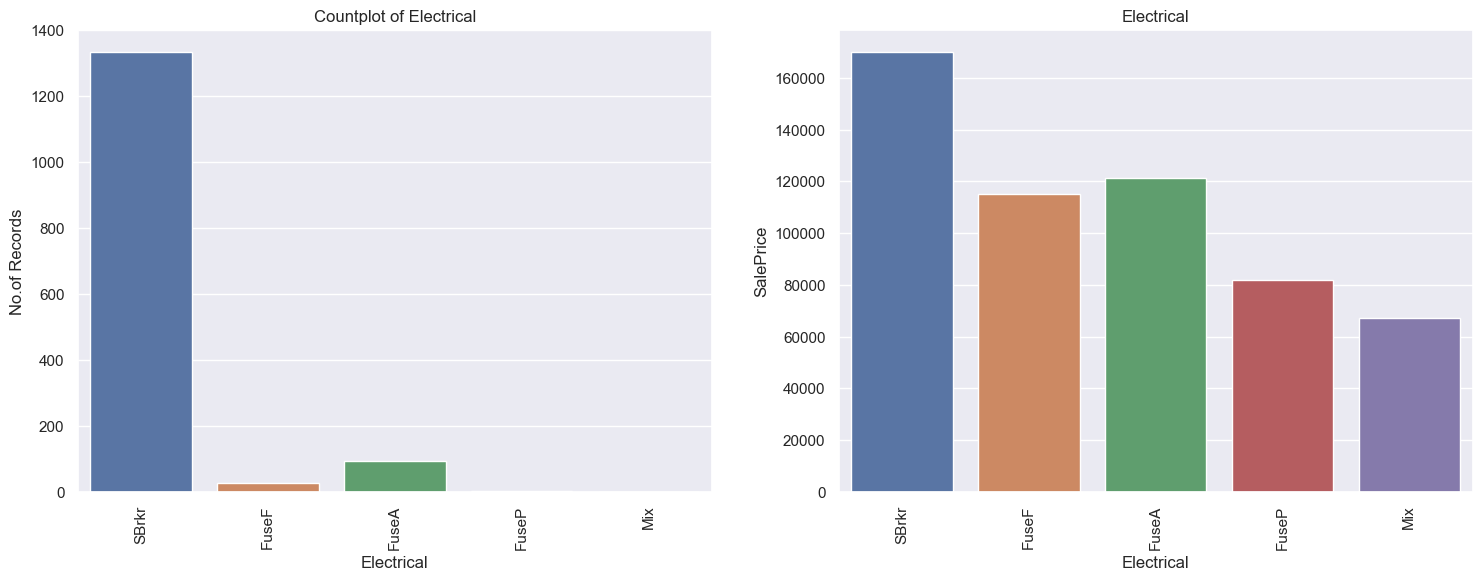

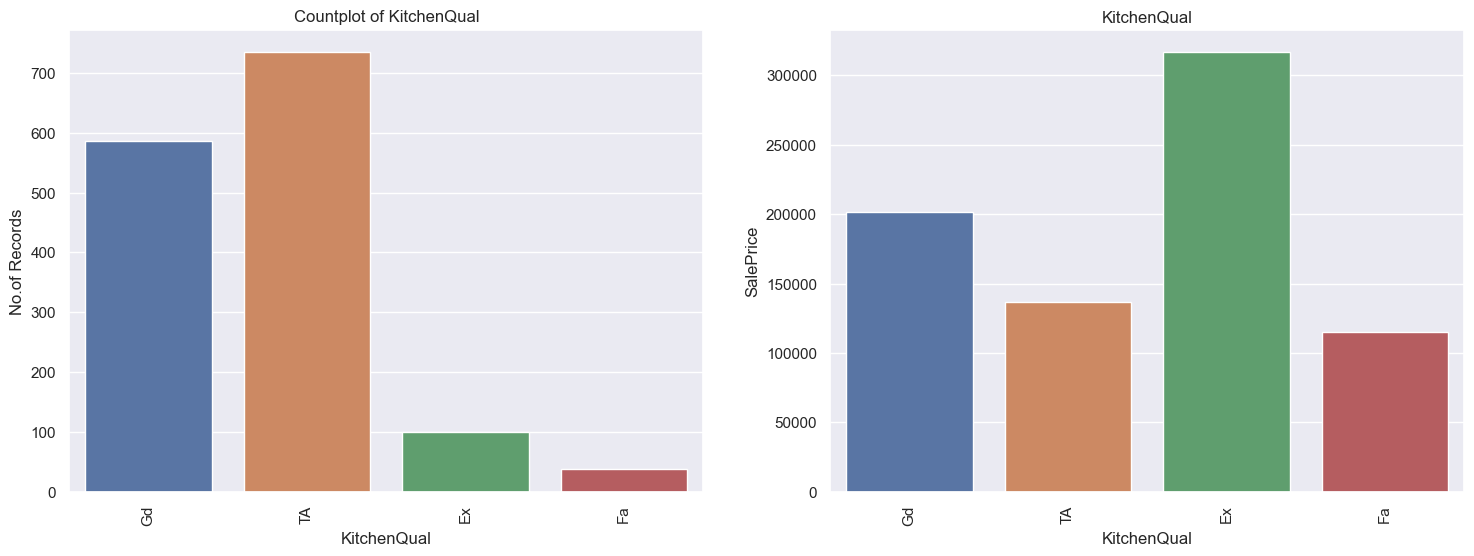

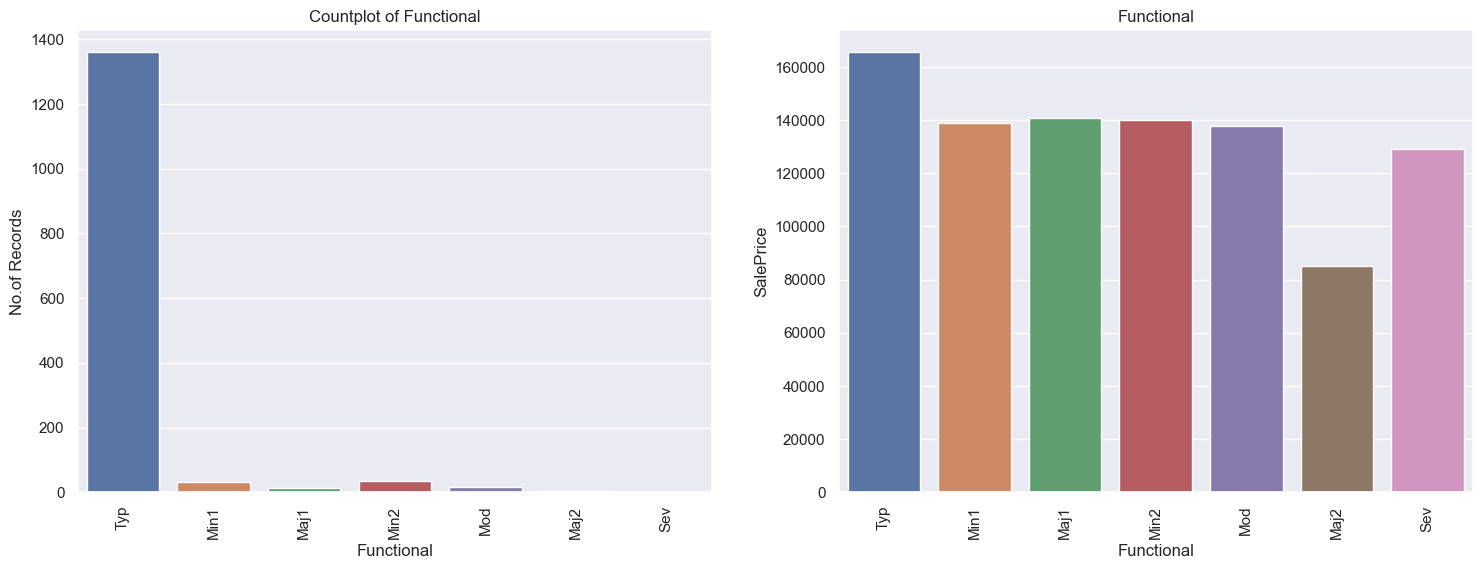

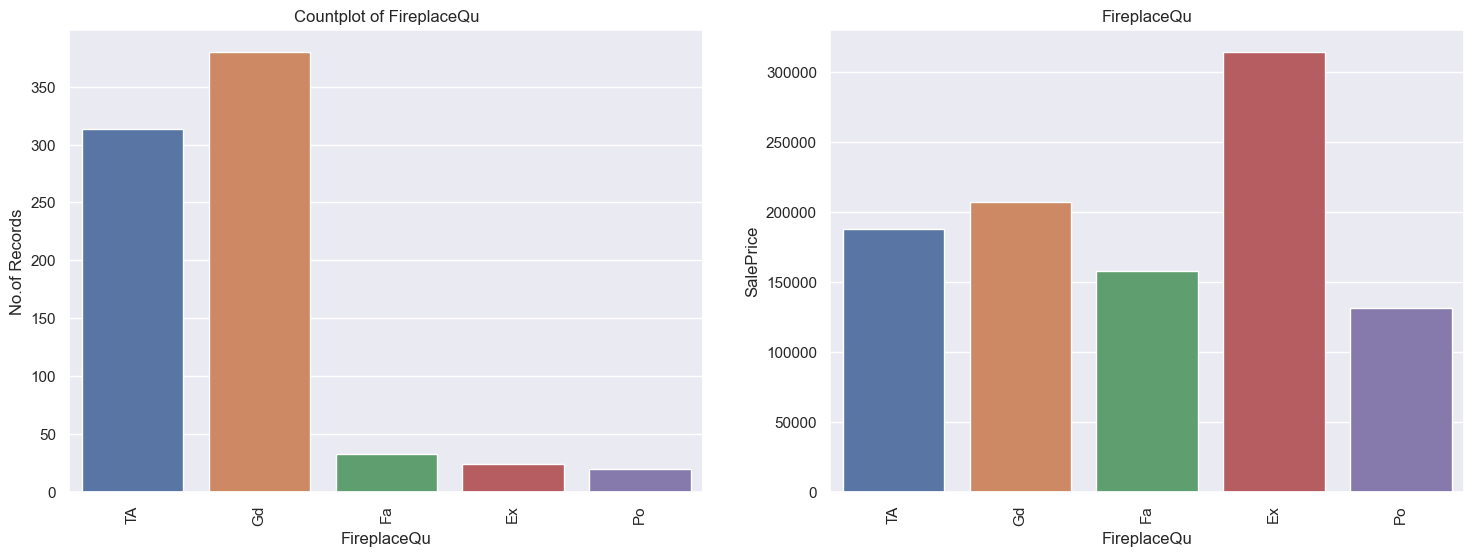

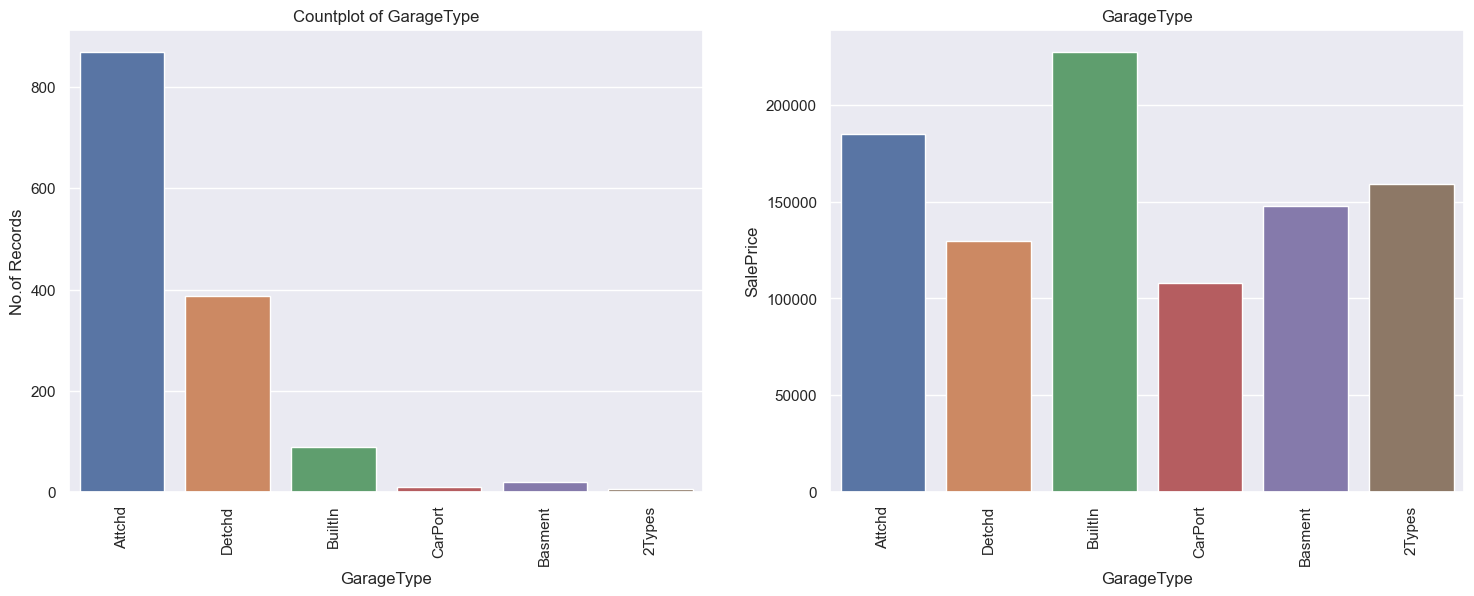

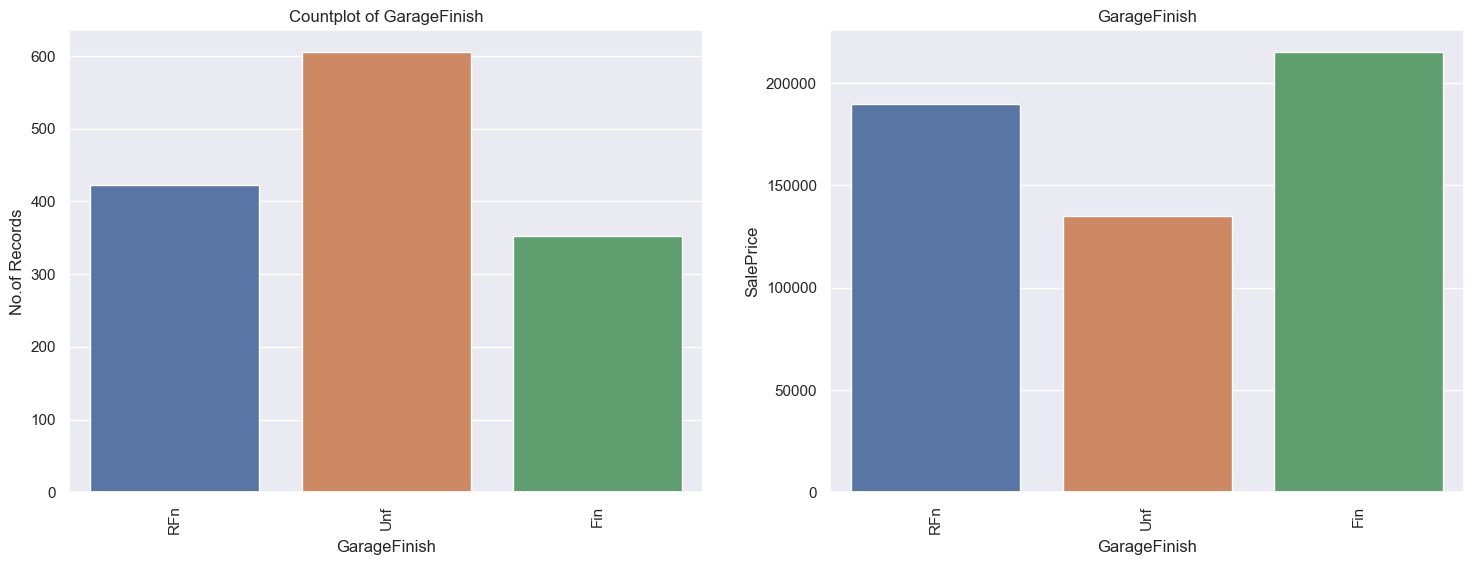

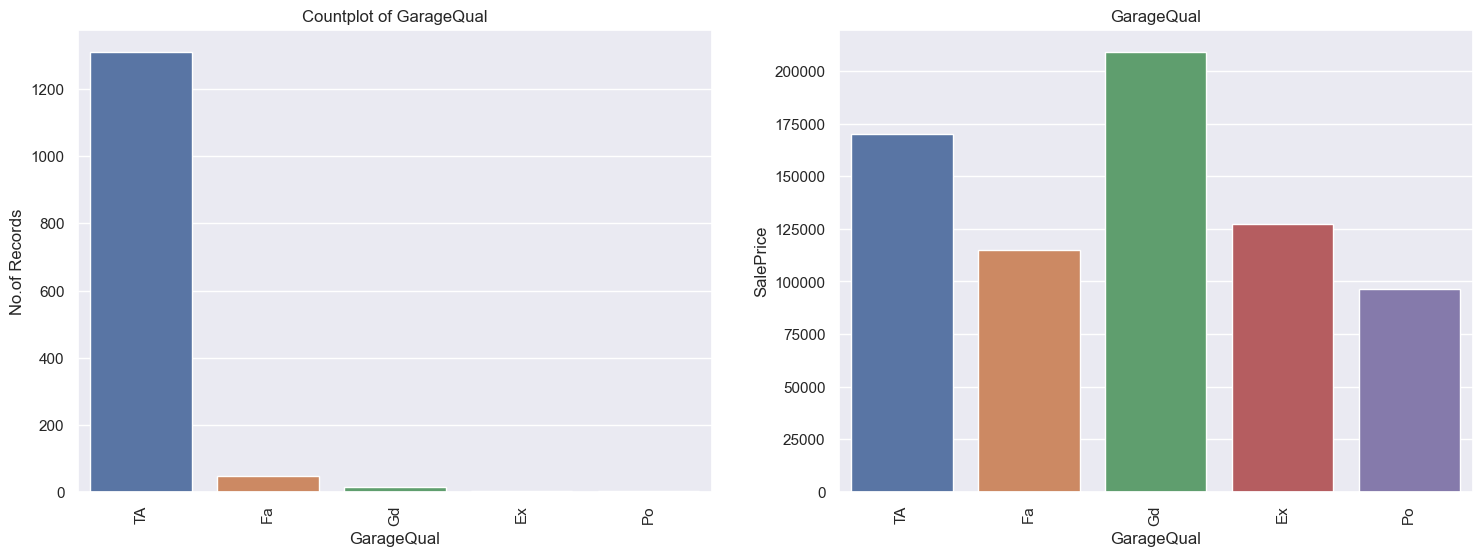

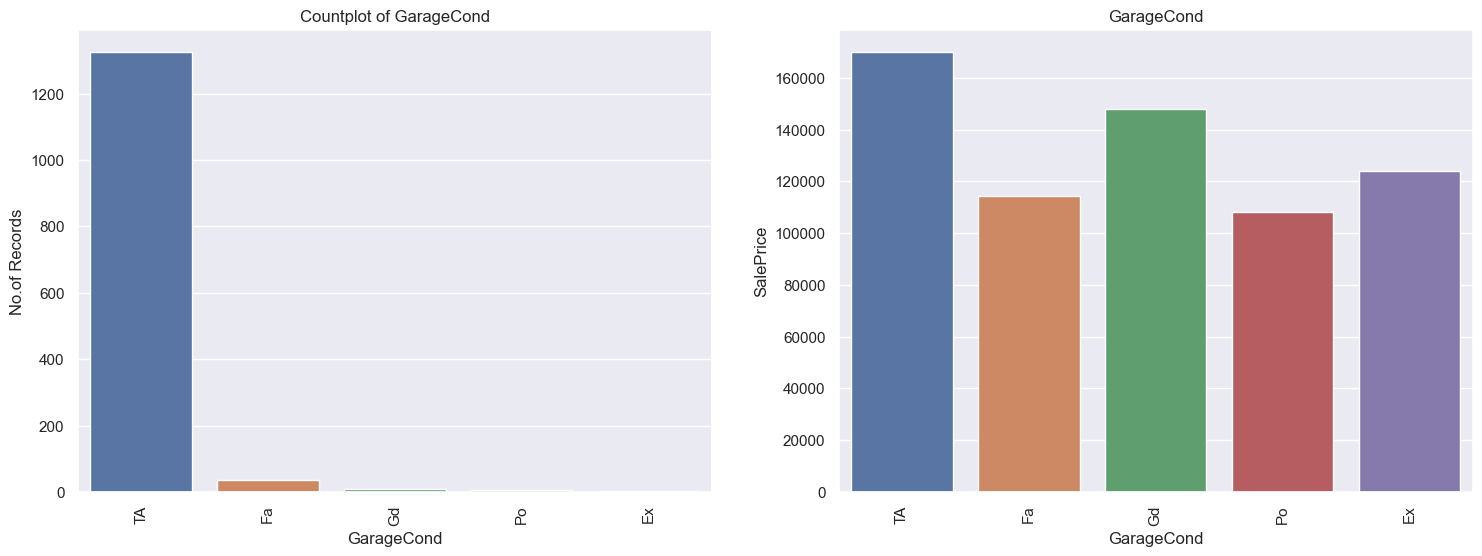

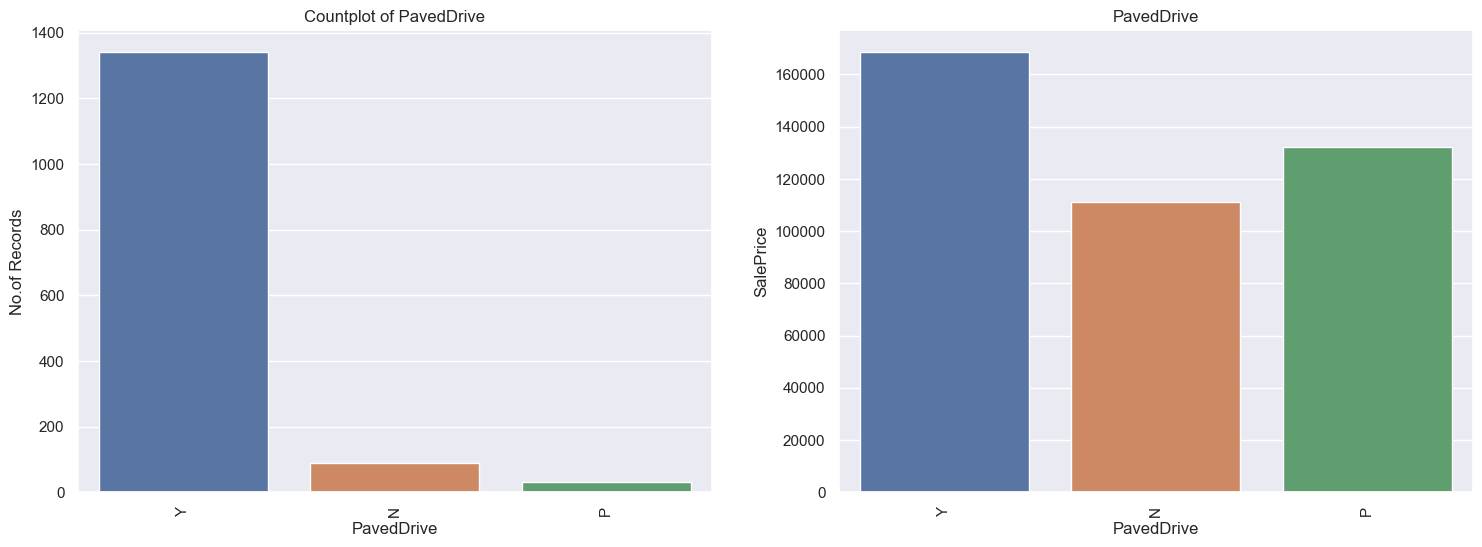

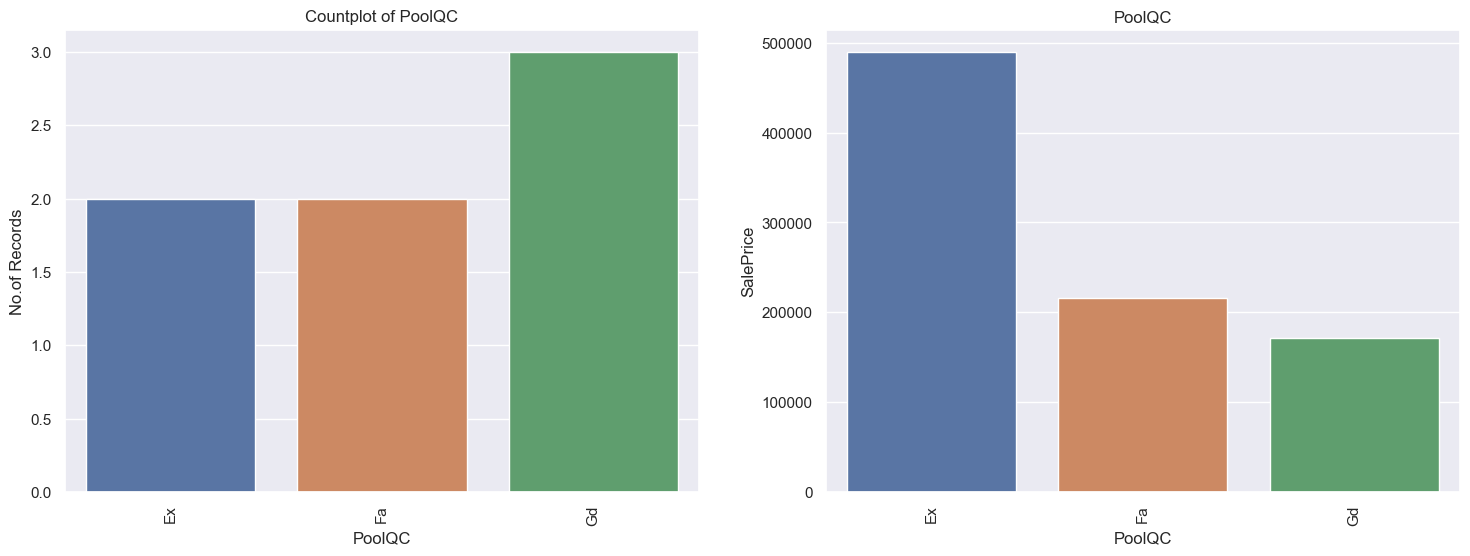

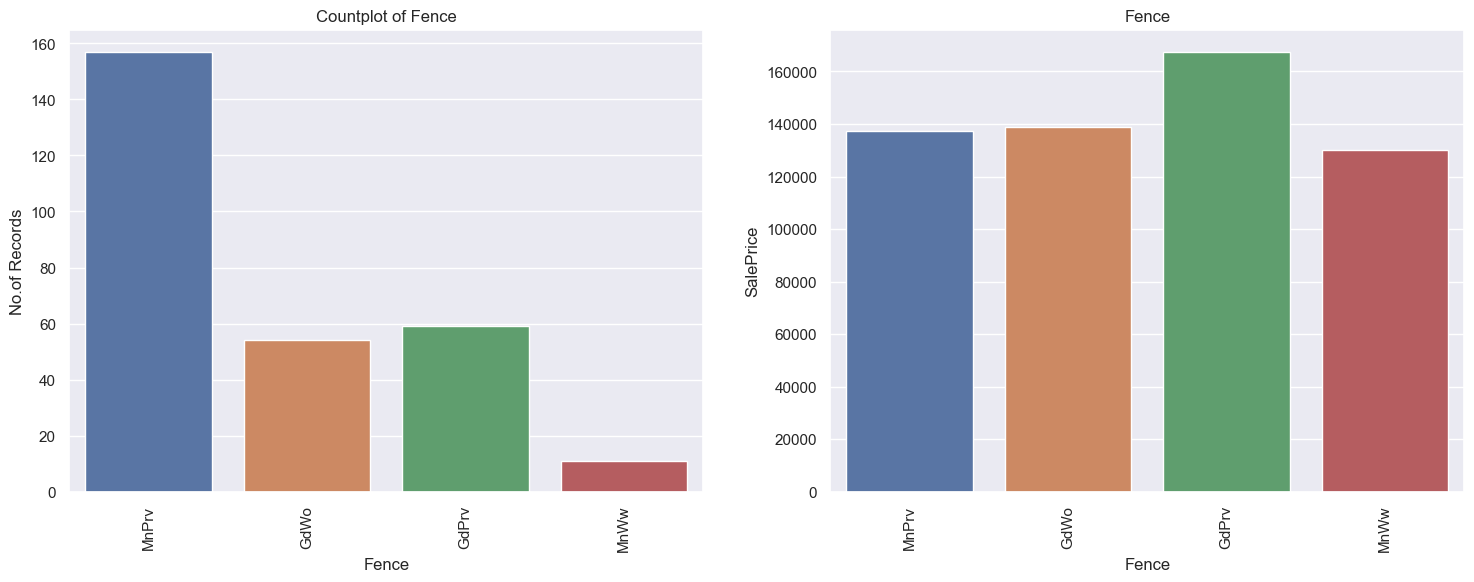

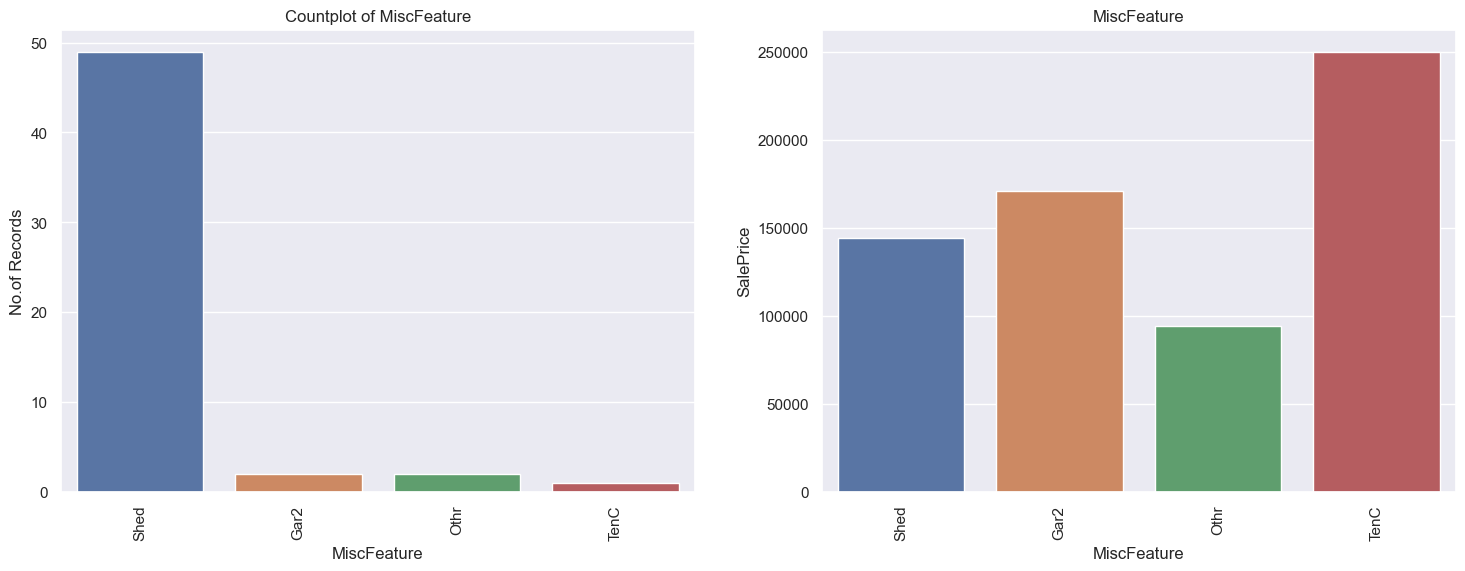

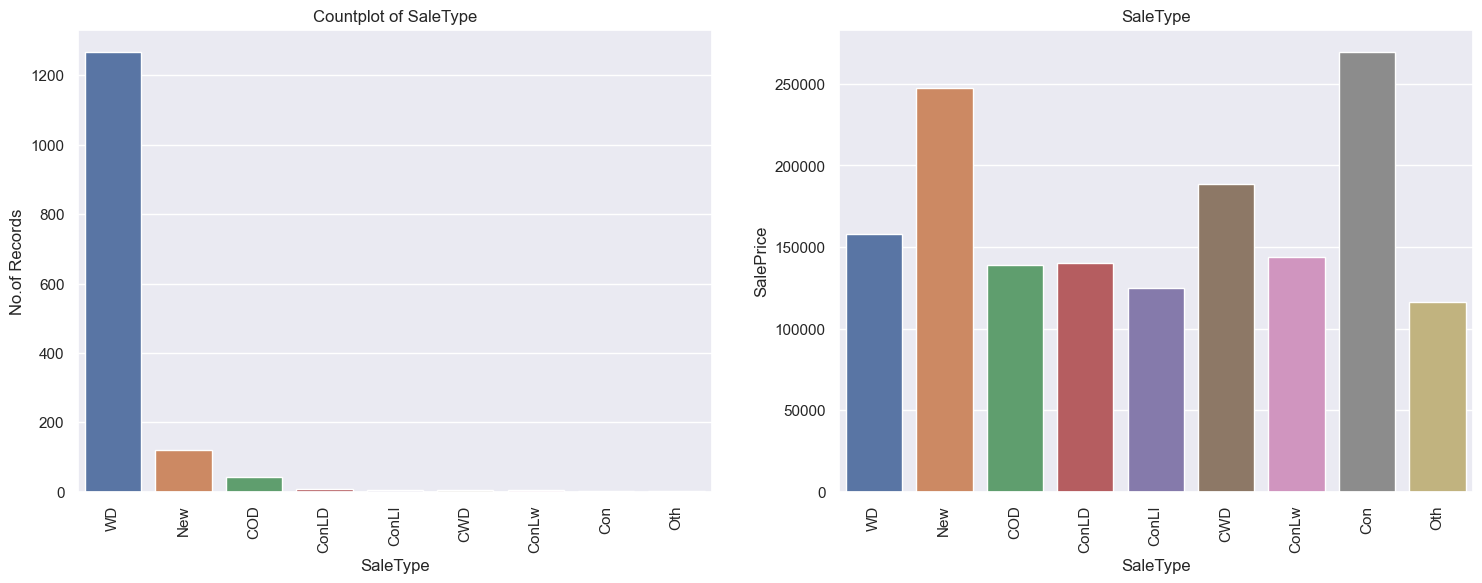

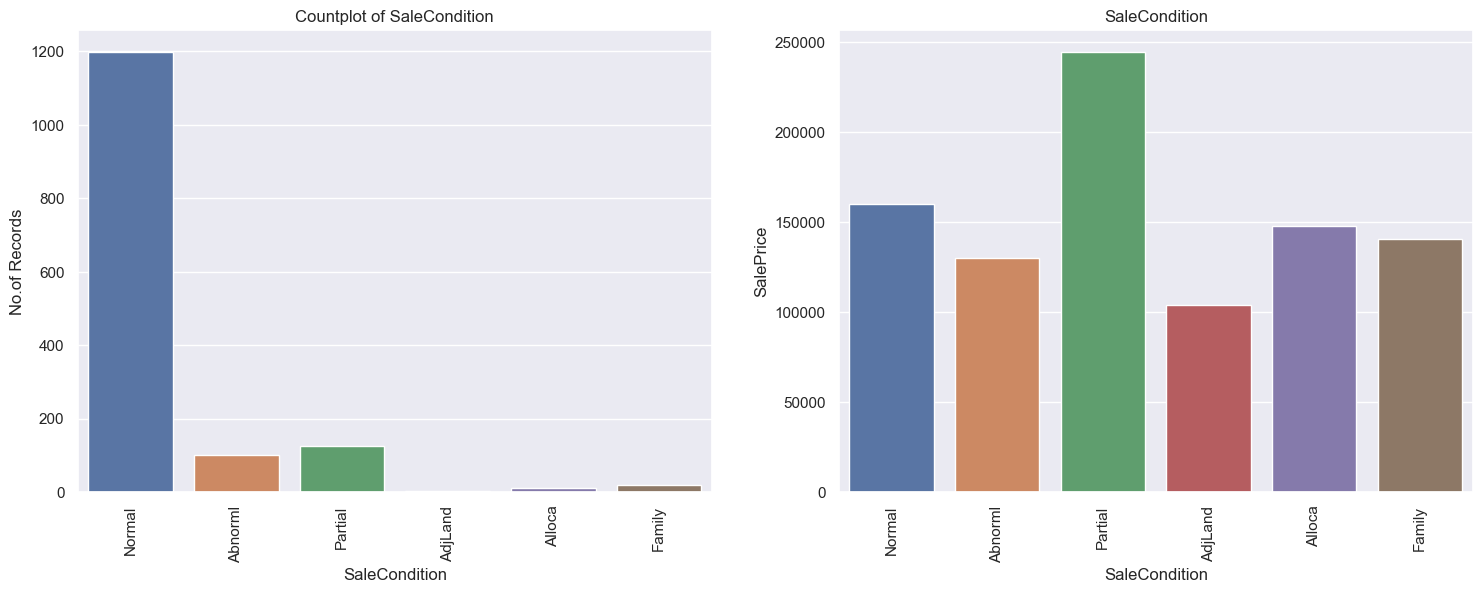

In [615]:
for feature in categorical_features:
    data=dataset.copy()   
    
    plt.figure(figsize=(18,6))
    plt.subplot(1,2,1)
    ax=sns.countplot(data=dataset, x=feature)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    plt.ylabel('No.of Records')
    plt.title('Countplot of '+feature)

    plt.subplot(1,2,2)
    ax=sns.barplot(data=dataset, x=feature, y='SalePrice', estimator=np.median, ci=None)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    plt.ylabel('SalePrice')
    plt.title(feature)

    plt.show()

#### Price ~ RoofStyle & RoofMatl

<AxesSubplot:xlabel='RoofStyle', ylabel='SalePrice'>

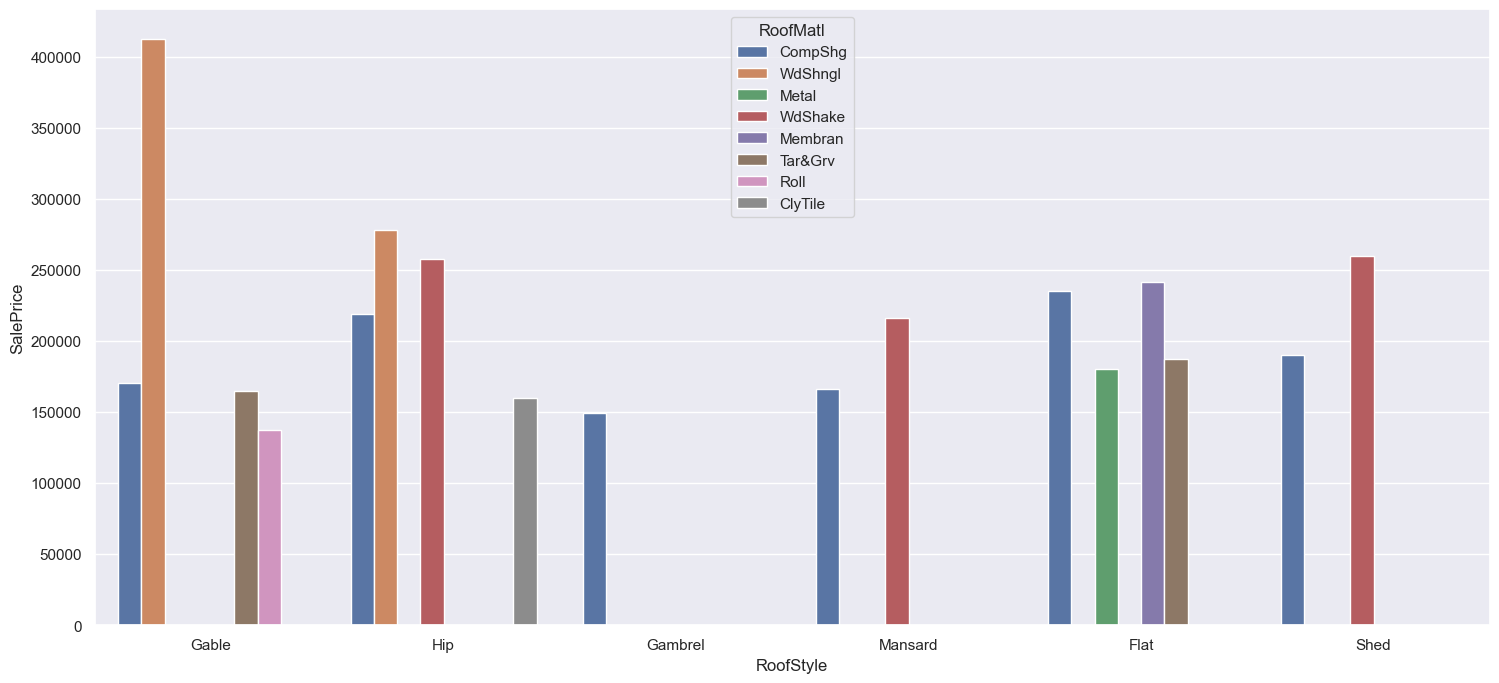

In [616]:
plt.figure(figsize=(18,8))
sns.barplot(data=dataset, x='RoofStyle', y='SalePrice', hue='RoofMatl', ci=None)

#### Price ~ Garage

<AxesSubplot:xlabel='GarageType', ylabel='SalePrice'>

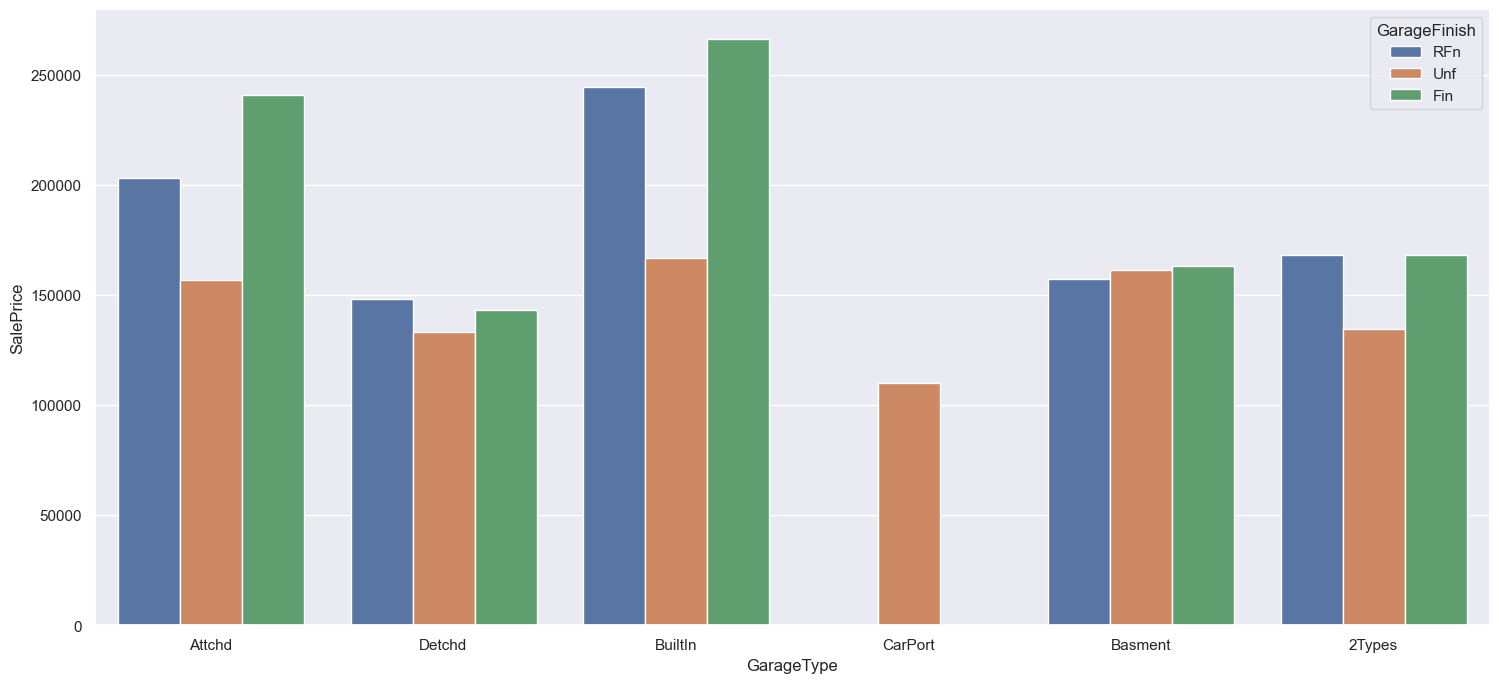

In [617]:
# Price Trends with GarageType and GarageFinish
plt.figure(figsize=(18,8))
sns.barplot(data=dataset, x='GarageType', y='SalePrice', hue='GarageFinish', ci=None)

<div style="border-radius:10px;
            border : black solid;
            background-color: #EAE486;
            font-size:100%;
            text-align: left">

<h3 style='; border:0; border-radius: 15px; font-weight: bold; color:black'><center> Observation
</center></h3>  
    
1. Avg. Price of the House at 'FV' Zone is the highest even 60% of the properties are located in 'RL'
2. Avg.Price of Irregular Lotshaped properties are highes than the Regular ones
3. Properties located at 'NoRidge', 'NridgHt' & 'StoneBr' are costliest 
4. Condition of the Properties have very less influence on the Price. 
5. PosN & PosA Conditioned properties have higher avg. Price
6. Properties with Building Type '1Farm' & 'TwnhseE' have higher average Price
7. We can segregate the information in 2 parts. 
	Properties with 2storey are costlier than 1storey
	Price of the Properties increase with increase in storey are more costlier if Finished
8. There are few properties which are 'Shreded' are the costliest and properties who have used 'Wood Shingles' are costliest.
9. The above trend becomes untrue when we dig more insight to uncover the patter. 
	(i)Properties which are 'Gable' and have used 'wood shingles' are the costliest. 
	(ii)Metal are only used in 'Flat' roof and are cheaper in Price.
	(iii) Properties which also have 'Gable' roof but made up of 'Roll' are the cheapest of all.
10. Houses which have 'Stone' type of masonry are the Cosltiest among all. 
11. The price of the Properties increases as the Exterior Quality increases and Condition of the Exterior increases.
12. Same goes for the Basement Quality & condition & finished bastement type
13. Properties with Heating facility of 'GasA' at excellent condition is the costliest.
14. Properties with Standard Circuit Breaker Romex is costlier than other type of wiring.
15. Price of the Houses increases as the QUality of the Kitchen, FireplaceQa increases. 
16. The Price of the Property also depends on the Garage Feature. 
	(i)Builtin Garage type properties and if they are 'Finished' are the most costliest
	(ii)Properties having Unfinished Carport garage are the least priced.
	(iii) No strong pattern of Price trend is noticed with Garage Condition
	(iii) Excellent Quality Deattached garage are also worthy to buy as this category of properties belong to 3rd highest avg. price
17. Properties which have paved driveway are most purchased and worthy.
18. Price of the Houses increases with increase in quality of the Pool.
19. Properties with Good Privacy Fencing are higher priced.
20. There are some Houses which are solded with contract 15% down payment. These are the properties with highest values. 
21. No strong trend noticed from the Feature of SaleCondition



## 4.8 Outliers

In [618]:
# making a list of the features with outliers 
feat_outlier=[]
for feature in continuous_feature:
    df=dataset.copy()
# there are some feature which does not have that property hence it will have 0 value which we are not considering for outlier
    if 0 in data[feature].unique():         
        pass
    else:
        feat_outlier.append(feature)
        df[feature]=np.log(df[feature])    # logarithmic transformation for smooth outlier visualization        

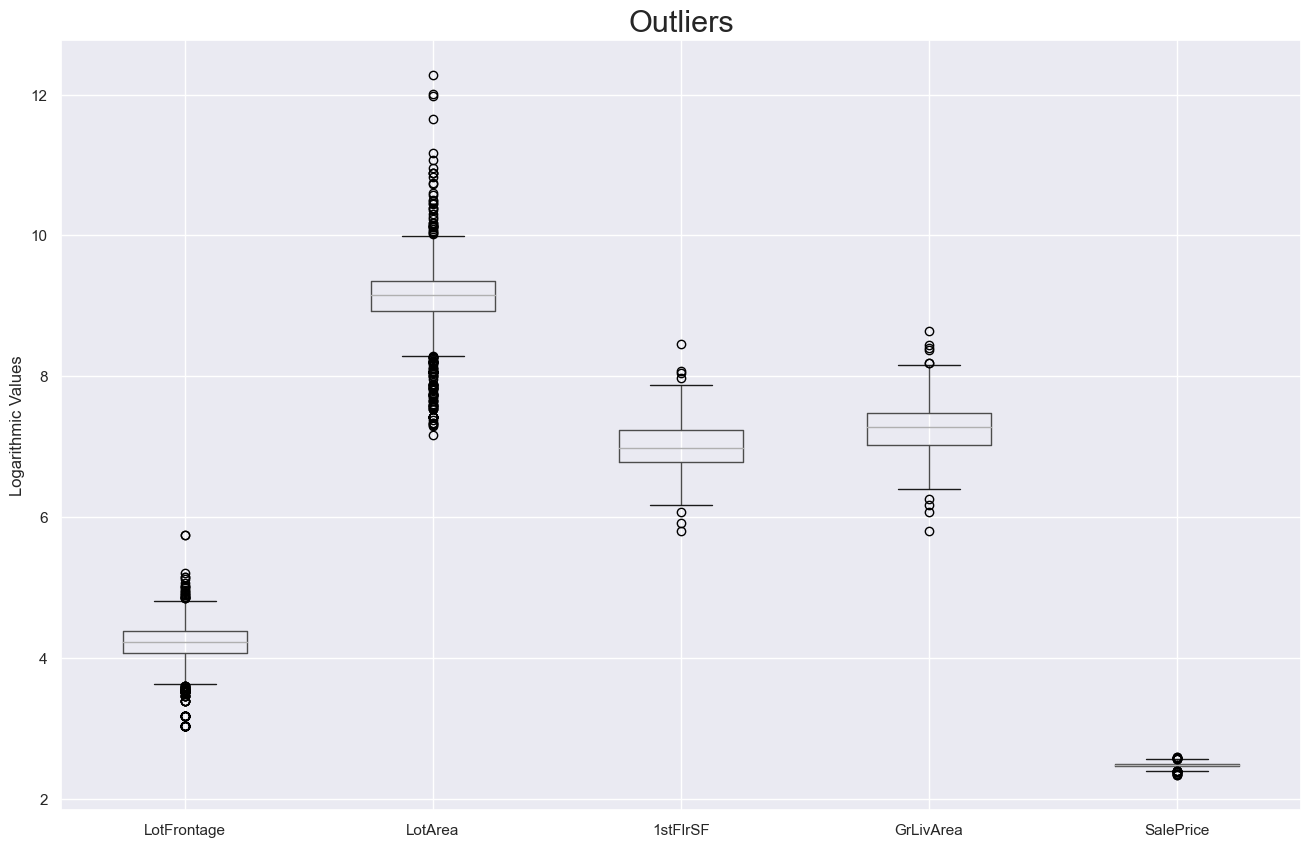

In [619]:
df[feat_outlier]=np.log(df[feat_outlier])
plt.figure(figsize=(16,10))
plt.title("Outliers", fontsize=22)
plt.ylabel("Logarithmic Values")
ax=df.boxplot(column=feat_outlier)
plt.show()

## 4.9 HeatMap of the dataset

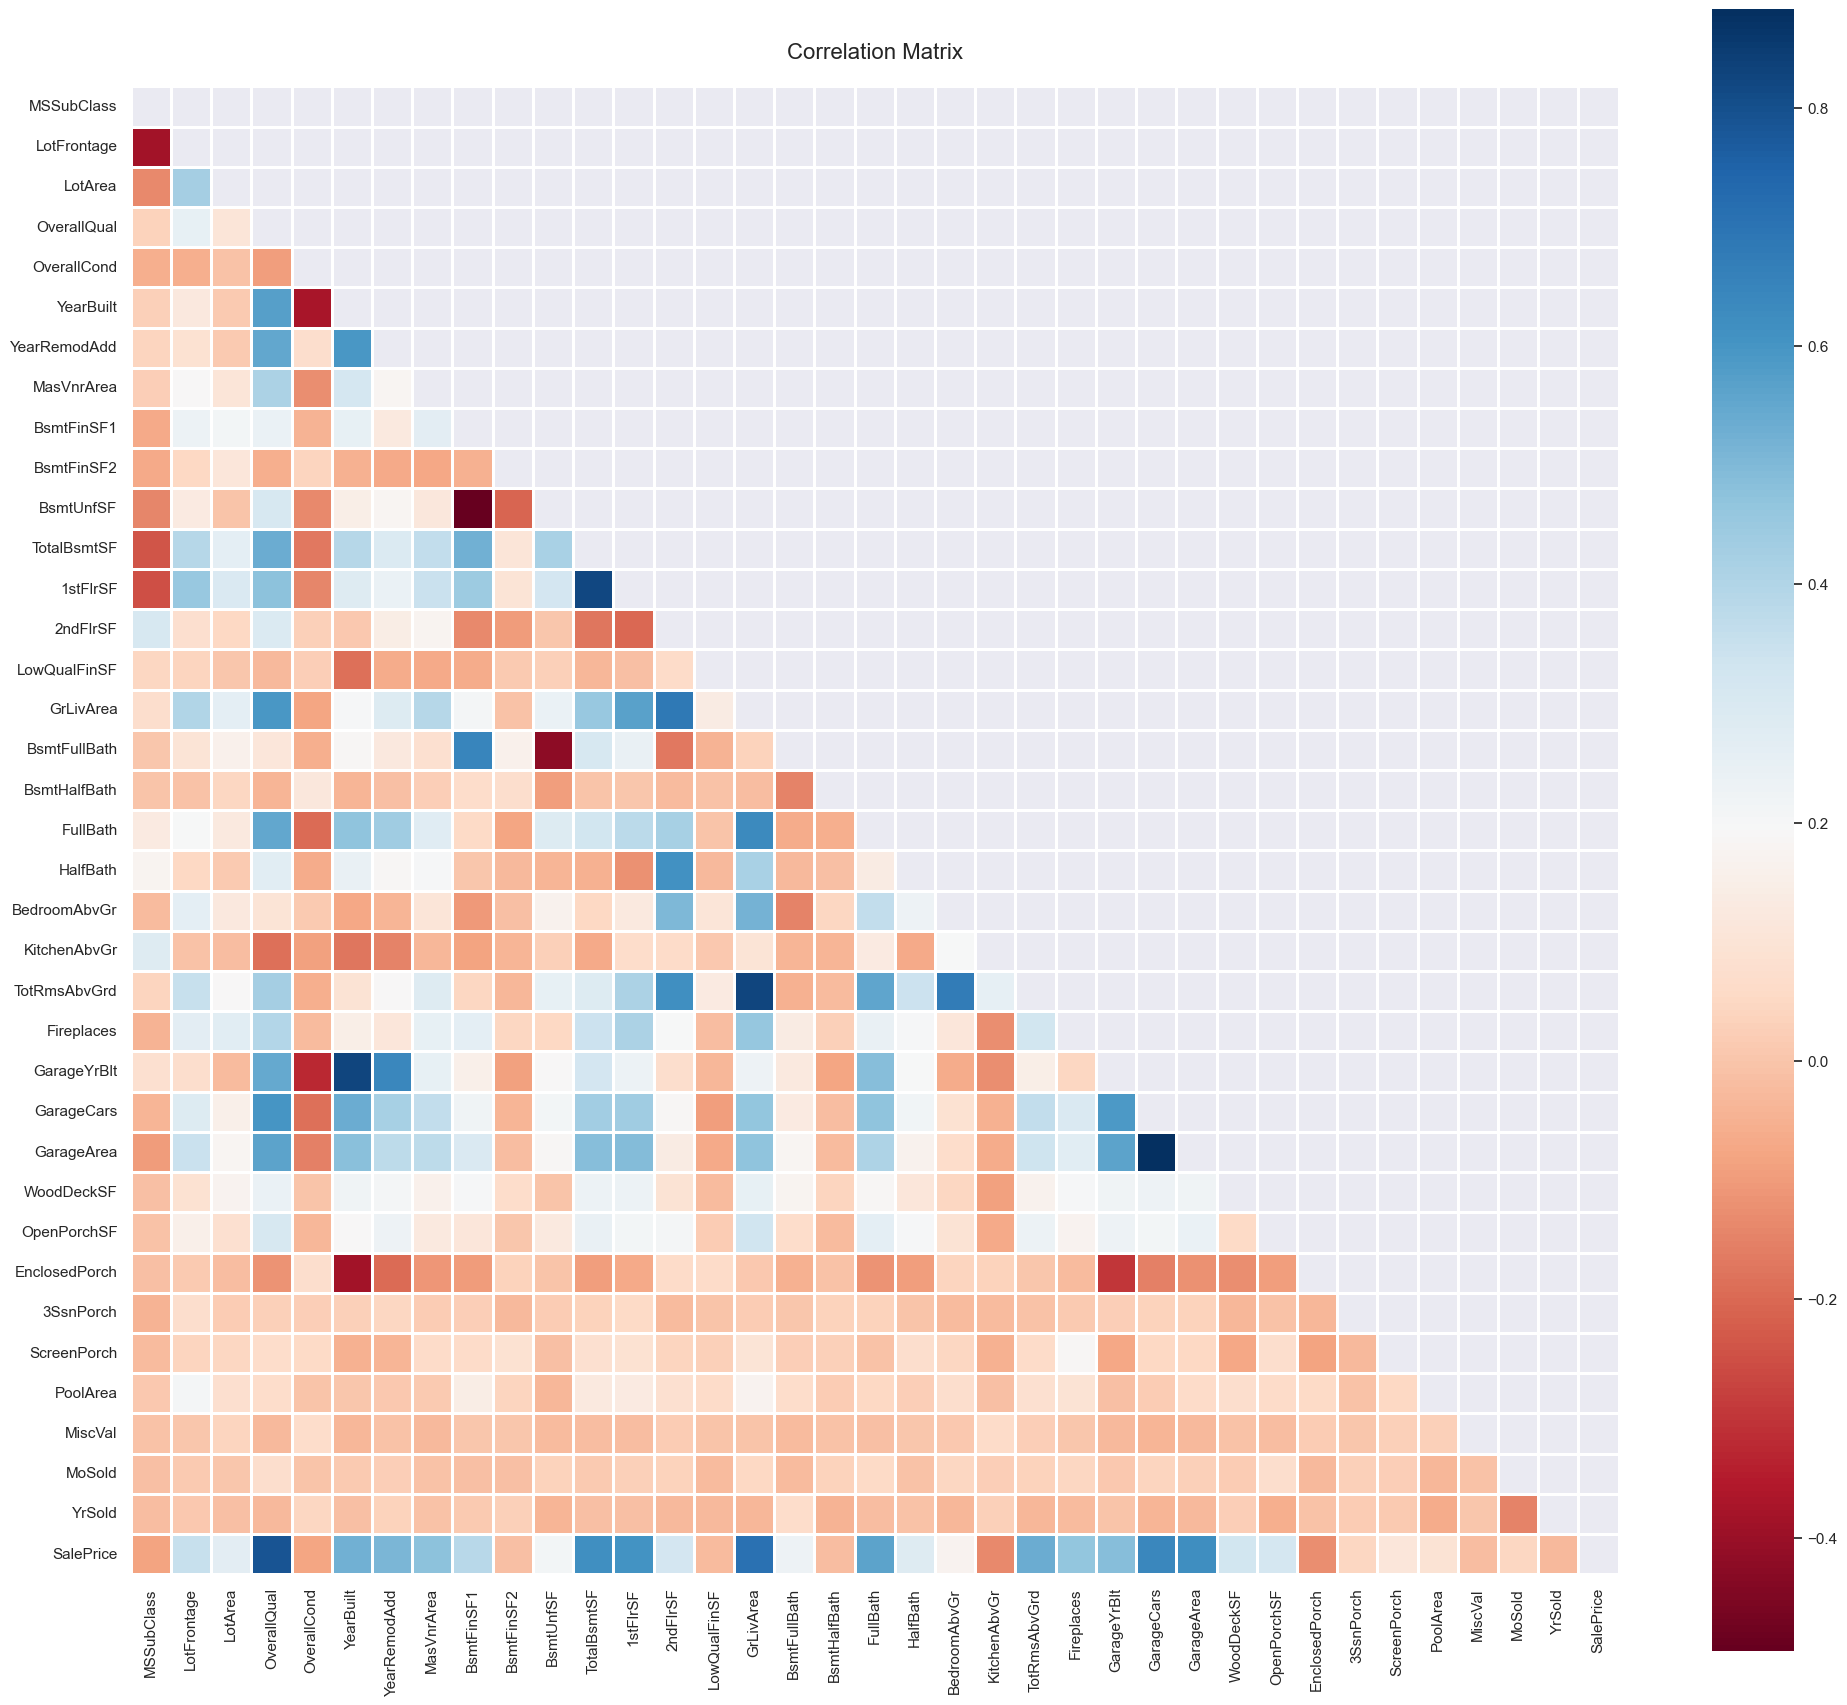

In [620]:
''' 
We have to bring out the correlation from the dataset so that we can take nessesary decision in 
imputation of the null values ad outlier treatment
'''
corr = dataset.corr()                 # correlation matrix
triu_mask = np.triu(corr)              # taking one triangle from the plot

plt.figure(figsize=(24, 26))
sns.heatmap(
    corr,
    square=True,
    linewidths=2,
    annot=False,
    mask=triu_mask,  
    cbar_kws={"shrink": 0.82},
    cmap="RdBu",
)
plt.title("Correlation Matrix", fontsize=16, pad=20)
plt.show()

There are few features which have multicolinearity between themselve. We have to eliminate those. 

<br>**Let's Find out the Feature which have high corelation with the Target 'SalePrice'**

In [621]:
#features with correlation to 'SalePrice' sorted in descending order
corr['SalePrice'].sort_values(ascending=False)

SalePrice        1.00
OverallQual      0.79
GrLivArea        0.71
GarageCars       0.64
GarageArea       0.62
TotalBsmtSF      0.61
1stFlrSF         0.61
FullBath         0.56
TotRmsAbvGrd     0.53
YearBuilt        0.52
YearRemodAdd     0.51
GarageYrBlt      0.49
MasVnrArea       0.48
Fireplaces       0.47
BsmtFinSF1       0.39
LotFrontage      0.35
WoodDeckSF       0.32
2ndFlrSF         0.32
OpenPorchSF      0.32
HalfBath         0.28
LotArea          0.26
BsmtFullBath     0.23
BsmtUnfSF        0.21
BedroomAbvGr     0.17
ScreenPorch      0.11
PoolArea         0.09
MoSold           0.05
3SsnPorch        0.04
BsmtFinSF2      -0.01
BsmtHalfBath    -0.02
MiscVal         -0.02
LowQualFinSF    -0.03
YrSold          -0.03
OverallCond     -0.08
MSSubClass      -0.08
EnclosedPorch   -0.13
KitchenAbvGr    -0.14
Name: SalePrice, dtype: float64

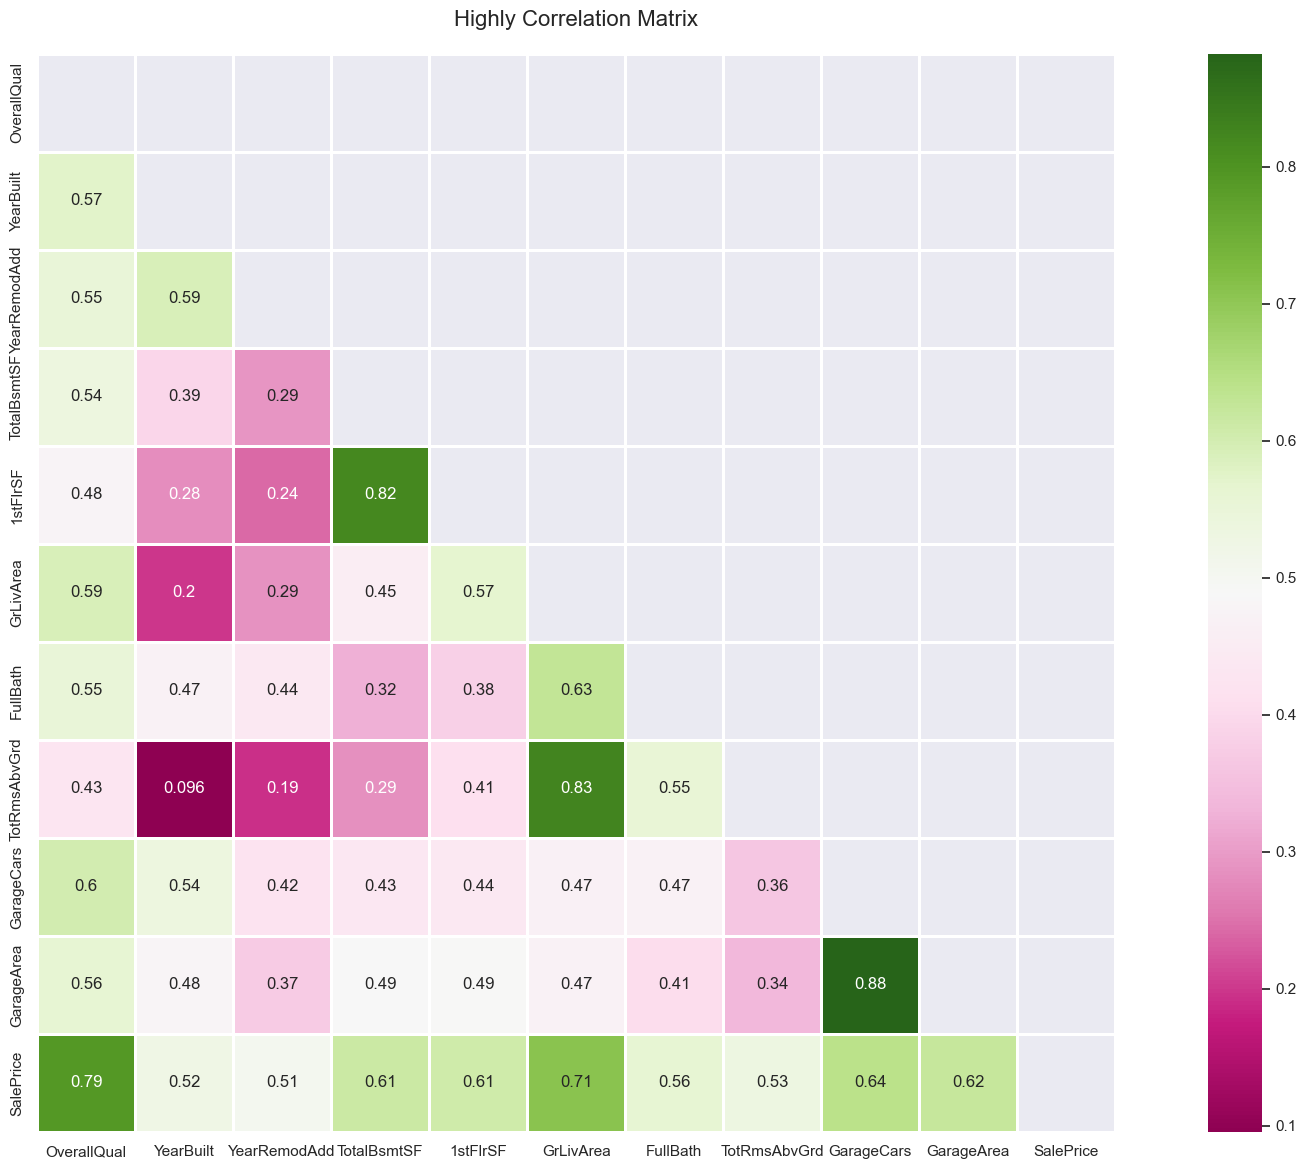

In [622]:
#creating a heatmap to analyse the fetures with high correlation
high_corr_cols = corr.loc[corr['SalePrice']>=0.5, 'SalePrice'].index
high_corr = dataset[high_corr_cols].corr()
high_corr_mask = np.triu(high_corr)

plt.figure(figsize=(24, 14))
sns.heatmap(
    high_corr,
    square=True,
    linewidths=2,
    annot=True,
    mask=high_corr_mask,  # Lower triangle.
    cmap='PiYG'
)
plt.title("Highly Correlation Matrix", fontsize=16, pad=20)
plt.show()

## 4.10 Pearson Chi-Sq. Test

- A Chi-square test is a statistical hypothesis test that is valid to perform to check the colinearity of the categorical variables.
- Here we are checking the correlation of 'Categorical variables' with the 'Target' variables
<br>**`Hypothesis Statement`**
- $H$0 : Null Hypothesis - Variable is not correlated to the Target
- $H$1 : Alternative Hypothesis - Variable is Correlated to the Target

**If P-value > 0.05 then we Fail to reject the Null Hypothesis (generally accepts $H$0) and vice versa**

chi2_contigency() returns four values.
1. $X^2$
\begin{equation}
\chi^2=\Sigma\frac{(O-E)^2}{E} \\
\text{where O is the actual value and E is the expected value.}
\end{equation}
2. p-value
3. degree of freedom
4. Expected value - This is a contigency table which can be calculated using, 
$$ expected value = \frac {rowtotal * columntotal}{grandtotal}\,
$$



In [623]:
from scipy.stats import chi2_contingency
chi2_test = []
for feat in dataset[categorical_features]:
    chi2_res = chi2_contingency(pd.crosstab(dataset['SalePrice'], dataset[feat]))
    if chi2_res[1]> 0.05:
        chi2_test.append('Failed to reject Null Hypothesis')
    else:
        chi2_test.append('Reject Null Hypothesis')

test_result = pd.DataFrame(data=[categorical_features,chi2_test]).T
test_result.columns = ['Column', 'Hypothesis Result']
test_result

Column                 Hypothesis Result
0        MSZoning            Reject Null Hypothesis
1          Street            Reject Null Hypothesis
2           Alley  Failed to reject Null Hypothesis
3        LotShape            Reject Null Hypothesis
4     LandContour  Failed to reject Null Hypothesis
5       Utilities  Failed to reject Null Hypothesis
6       LotConfig            Reject Null Hypothesis
7       LandSlope  Failed to reject Null Hypothesis
8    Neighborhood            Reject Null Hypothesis
9      Condition1  Failed to reject Null Hypothesis
10     Condition2  Failed to reject Null Hypothesis
11       BldgType  Failed to reject Null Hypothesis
12     HouseStyle  Failed to reject Null Hypothesis
13      RoofStyle  Failed to reject Null Hypothesis
14       RoofMatl  Failed to reject Null Hypothesis
15    Exterior1st  Failed to reject Null Hypothesis
16    Exterior2nd  Failed to reject Null Hypothesis
17     MasVnrType            Reject Null Hypothesis
18      ExterQual            Reject Null Hypothesis
19      ExterCond            Reject Null Hypothesis
20     Foundation            Reject Null Hypothesis
21       BsmtQual            Reject Null Hypothesis
22       BsmtCond            Reject Null Hypothesis
23   BsmtExposure            Reject Null Hypothesis
24   BsmtFinType1  Failed to reject Null Hypothesis
25   BsmtFinType2  Failed to reject Null Hypothesis
26        Heating            Reject Null Hypothesis
27      HeatingQC  Failed to reject Null Hypothesis
28     CentralAir            Reject Null Hypothesis
29     Electrical  Failed to reject Null Hypothesis
30    KitchenQual            Reject Null Hypothesis
31     Functional  Failed to reject Null Hypothesis
32    FireplaceQu            Reject Null Hypothesis
33     GarageType  Failed to reject Null Hypothesis
34   GarageFinish            Reject Null Hypothesis
35     GarageQual            Reject Null Hypothesis
36     GarageCond  Failed to reject Null Hypothesis
37     PavedDrive  Failed to reject Null Hypothesis
38         PoolQC  Failed to reject Null Hypothesis
39          Fence  Failed to reject Null Hypothesis
40    MiscFeature  Failed to reject Null Hypothesis
41       SaleType            Reject Null Hypothesis
42  SaleCondition            Reject Null Hypothesis

    Features which 'Rejects the Null Hypothesis' are co related with the Target

<div style="border-radius:10px;
            border : black solid;
            background-color: #EAE486;
            font-size:100%;
            text-align: left">

<h2 style='; border:0; border-radius: 15px; font-weight: bold; color:black'><center> EDA Observation
</center></h2>  

> **`MSSubClass`** 
- This feature does not have any linear dependancy with the target as it has Correlation of -0.084. Hence we can **drop** this columns

> **`MSZoning`** - This identifies the Zone of the House
- Although it has 25 sub groups but has only 5 subgroups which are distributed in the dataset
- Nearly 80% of the Houses have `RL : Residential Low Density`
- We have evidence from the Chi2-Sq test that it's related to `SalePrice`. 
- The *Residential* property has no Ordinality. We will encode using **OneHotEncoder**

> **`LotFrontage`** 
- It has around 17% missing values and has few outlier as (>300). We can do **Log_transformation** to reduce outlier impact
- Or we can remove few outlier (>300)
- *LotFrontage* also depends on zone of the house i.e *MSZoning*. Hence we will impute the null values of *LotFrontage* according to the **median** of Zone Sub categories.

> **`LotArea`** 
- We can transform to **log** and check the impact of outier on Regression
- Extreme outlier should be elimnated for better performance

> **`Alley & Street`** 
- `Alley` has almost 1369 null values where *'NA'* says No Alley access for nearly 90% of the records. 
- `Street` has almost 99% of *Pave* records which says that here is huge imbalance in the dataset. Hence we can **drop** both the features.

> **`LotShape`** 
- Almost 62% of House LotShape are *'Regular'*. 
- Pearson Chi-Sq says *'LotShape'* has some correlation to the Sale Price. 
- The average mean price of the House increases as the LotShape changes to `IR:irregular`
<br> We can categorize in 2 groups - *(IR:Irregular, Reg:regular)* and then perform **OrdinalEncoder**

> **`LandContour`** 
- It has almost 90% records as `Lvl`:*Level*, so a high level of imbalance in the data
- Pearson Chi-Sq. test says there is no relation to the SalePrice.
- Hene we can **drop** the feature and check the Prediction also recheck with **OrdinalEncoder** if the prediction increases 

> **`Utilities`** 
- More than 99% of the records are `AllPub`:*All public utilities* says their is high imbalane in the dataset
- Pearson Chi-Sq test says there is no relation with the TARGET
- Hence this column should be **dropped** for Sure.

> **`LotConfig`** 
- There is correlation with the TARGET noticed through *Pearson Chi-Sq Test*
- 70% of the Records are *InsideLot*, while very less counts are noticed for `FR2`, `FR3`. 
- We can merge these 2 subcategories as ther is no ordinality in the dataset and use **OneHotEncoder**

> **`LandSlope`** 
- *Pearson Chi-Sq Test* tells there is no correlation with the TARGET
- More than 95% of the records are `Gtl`: Gentle Slope says there is high imbalance in the dataset
- Hence we can probably **drop** this feature
    
> **`Neighborhood`** 
- This feature has dependancy on SalePrice according to the *Pearson Chi-Sq Test*
- These are the Location/districts within city limits. Maximum no.of houses are sold from `NAmes`:North Ames. Minimum SalePrice of Houses are noted from `IDOTRR`: Iowa DOT and Rail Road whereas Maximum price of Houses are noted from `NoRidge`:NorthRidge. Clearly this feature says about different location and prices amoung the sub group. We can create different buckets. Lets say SalePrice < 200000: `BH - BudgetHouse`, 200000>SalePrice>400000:`HWA - HouseWithAmenties`, SalePrice>400000:`LH - LuxuriousHouse`. Now we can use **OrdinalEncoder**
    
> **`Condition1`**  
- More than 85% of the counts are `Norm` : *Normal Condition*. 
- Rest are distributed with in subcategories. We can merge the sub categories and create two sub groups : `Norm` & `NotNorm`. We can atleast keep one of the two CONDITION feature and recheck with the Regression result

> **`Condition2`** - More than 98% of the counts are `Norm`. There is huge imbalabce in the dataset. Hence we can **drop** the feature
    
> **`BldgType`** 
- *Pearson Chi-Sq Test* says there is no linear dependancy with the TARGET
- More than 80% of the records are `1Fam`:Single Family Deattached which says there is a huge imbalance in the dataset. 
- No pattern noticed from the TARGET
- We can **drop** the feature
    
> **`HouseStyle`** 
- There is no strong relation according to the *Pearson Test*
- We have multiple sub groups. Out of which `1Story` has the maximum records of more than 50%. We can merge the category of `1Story`, `1.5Fin`, `1.5Unf` as `1Storey`. Then we can do the same for `2Story`, `2.5Fin`, `2.5Unf` as `2Storey` and `SFoyer` , `SLvl` as `Split`. Since there is no form ordinality noticed. We can use **OneHotEncoder**
    
> **`OverallQual`** - This feature is very important as it has the strongest linear relation to SalePrice of 0.79. We can leave as it is

> **`OverallCond`** 
- Although the Heatmap says a correlation of -0.07 which is almost negligible but stripplot determines a slight linear relation with the Target if outlier are excluded.
- we can leave as it is
 
> **`YearBuilt`** 
- This has a linear dependancy on Target of about **0.52**. We can first change the dtype to datetime --> Create a new feature `Age` and compute the age of the House using this Feature. Then we can **drop**

> **`YearRemodAdd`** 
- This also has good correlation of 0.51 with the Target Variable. We can create another feature `Remodel`. If the construction date is same as Remodel then subgroup : `NO`, if not the same then house has went through Remodel and we can include `Yes`. Then we can use **OneHotEncoder**
    
> **`RoofStyle`** 
- Almost 78% are *Gable* & 18% are *Hip*, hence there is some imbalance in the dataset. 
- Pearson Chisq Test says there is no relation with the Target.
- No ordinality in the subgroup noticed. Lets keep as of now and use **OneHotEncoder** if doesnot workout then we may **drop**
    
> **`RoofMatl`** 
- More than 98% of the records are `CompShg`: Standard(composit) Shingle in material. There is a huge imbalance in the data. Hence we can **drop**
    
> **`Exterior1st`** 
- Most of the house are made of `VinySd`:Vinyl Siding.
- Although Pearson Test also tells that there might be no correlation to the Target but we did not noticed huge imbalance, Hence we can keep the feature as it it. 
- Since there is no ordinality noticed, we will use **OneHotEncoder**

> **`Exterior2nd`** 
- Pearson test day no relation with Target
- Almost shares the same information same as `Exterior1st`. Hence we will leave the feature and **drop**
    
> **`MasVnrType`**
- There are few missing values in the dataset which we can impute by `None` since it has the maximum weightage in the dataset. We can use **OneHotEncoder**

> **`MasVnrArea`** 
- There are also few missing value. Probably due to non `MasVnrType`. Hence we can simply impute by **0**.
    
> **`ExterQual`** 
- Pearson test says there might be linear dependancy with the Target
- There are no missing value. It has subgroups with form of Ordinality. Hence we can use **OrdinalEncoder**

> **`ExterCond`** 
- *(Same as above)*
    
> **`Foundation`** - It has different types of foundation of the House. We don't have to do much on it. We can just use **OneHotEncoder**

<div style="border-radius:10px;
            border : black solid;
            background-color: #EAE486;
            font-size:100%;
            text-align: left">

<h2 style='; border:0; border-radius: 15px; font-weight: bold; color:black'><center> EDA Observation : Basment.
</center></h2>  

> **BASEMENT**
- **`BsmtQual`** - There are few Null values. It has subcategories (Ex-Excellent, Gd-Good..........., NA- No Basement). We can impute the null value with condition `TotalBsmtSF` == 0 and second with 'NA'. The categories also also ordinal values hence we will use **OrdinalEncoder**
- **`BsmtCond`** - Although Pearson Test says there is some relation but 90% of the records are `TA` which tells there is huge imbalance in the dataset. Hence we can **drop** this feature
- **`BsmtExposure`** - Same as `BsmtQual`
- **`BsmtFinType1`** - There are few null records which can be imputed with the same above condition. Although Pearson Test says there  is no strong relation with the Target, but the records have right balance. Hence we can use **OrdinalEncoder**
- **`BsmtFinType2`** - Almost 95% sub categories are unf-Unfinished also *BsmtFinSF2* has negligible correlation to target. Hence we can **drop**
- **`BsmtFinSF1`, `BsmtFinSF2` `BsmtUnfSF`** - These features has very weak correlation to Target and also there is no linear depencey noted with in the features except `TotalBsmtSF`. This means we can impute the value of `TotalBsmtSF` as mentioned and drop all these after the imputation
- **`TotalBsmtSF`** - This feature has correlation to the Target by 0.62. Hence we can take the `TotalBsmtSF` = `BsmtFinSF1`+`BsmtFinSF2`+`BsmtUnfSF`
- **`BsmtFullBath`** - Most of the Houses have `0` and `1` records. We can keep this feature as it is
- **`BsmtHalfBath`** - ALmost 95% of the records have `0` which says there is high imbalance in the dataset. There is almost no corelation with the TARGET from the HeatMap. Hence we can **drop** this feature

<div style="border-radius:10px;
            border : black solid;
            background-color: #EAE486;
            font-size:100%;
            text-align: left">

<h2 style='; border:0; border-radius: 15px; font-weight: bold; color:black'><center> EDA Observation : Heating & Electrical.
</center></h2>  

>  **HEATING & COOLING**  

- **`Heating`** - Almost 98% of the records are `GasA` which makes a huge imbalance in the data. Hence we can **drop**
- **`HeatingQC`** - Ther is no imbalance and Null values. nothing much to do. We can see that the subgroups are : `Excellent`, `good` which are ordinal in nature. Hence we can use **OrdinalEncoder**
- **`CentralAir`** - Although More than 98% of the House are Central Air Conditioned, *Pearson Test* says there is correlation with the Target. We have nothing much to do. We can use **OneHotEncoder**

> **ELECTRICAL**  
- **`Electrical`** - More than 90% of the houses have `SBrkr`. We can merge the subgroups and make `MixedFuse`. Then we can use **OneHotEncoder**

<div style="border-radius:10px;
            border : black solid;
            background-color: #EAE486;
            font-size:100%;
            text-align: left">

<h2 style='; border:0; border-radius: 15px; font-weight: bold; color:black'><center> EDA Observation : Floor.
</center></h2>  


> **FLOOR SQ.FEET**
- **`1stFlrSF`** - It has good correlation with the target variable. But again a very high correlation with `TotalBsmSF` which violates Regression assumptions. Hence **drop**
- **`2ndFlrSF`** - - Although there is slight linear dependency noted with SalePrice through Scatterplot but the correlation is very less also there is not much correlation with the other features. It also tells there can be 2 binary groups: (i) House Without 2ndFlr (ii) House with 2nd Floor. Hence we can create another categorical feature `2ndFlr` and add the subgroup as `yes`, `No`. then we can use **OneHotEncoder** and **drop** the original feature
- **`LowQualFinSF`** - There is very negligible relation noted with TARGET and most of the records have *zeros*. Hence we will **drop** this feature
- **`GrLivArea`** - This feature has very high correlation with TARGET of 0.71. But there are two outlier noticed hence we make **log_transformation** to reduce the impact of the outlier

<div style="border-radius:10px;
            border : black solid;
            background-color: #EAE486;
            font-size:100%;
            text-align: left">

<h2 style='; border:0; border-radius: 15px; font-weight: bold; color:black'><center> EDA Observation : Rooms.
</center></h2>  


> **ROOMS**
- **`FullBath`** - Most of the bath room have `1` or `2` bathroom above ground. It has good correlation with the TARGET. Hence we will keep this feature as it is
- **`HalfBath`** - Almost 62% of the records have *zero* records. Hence we can create a binary feature with *yes*: if (`HalfBath`>0) and *No*: if (`HalfBath`=0)
- **`BedRoomAbvGr`** - Most of the House have bedrooms of 3 i.e almost 50%. Although there is not much linear dependancy noted but we can **keep** this feature as of now. If it impact the assumptions then we may **drop** accordingly
- **`KitchenAbvGr`** - More than 95% of the records are found to be with 1 Kitchen. Since there is huge iimbalance in the dataset, we can **drop** this feature
- **`KitchenQual`** - *Pearson Test* says there is correlation with the TARGET. No imbalance noted within the dataset and ordinality noticed. Hence we can use **OrdinalEncoder**
- **`TotRmsAbvGrd`** - Although this feature has good correlation with the TARGET but the other feature `GrLivArea` has very high correlation with `TotRmsAbvGrd`. Hence assumption of no linear dependancy within the variables are violated. So we can **drop** this feature
- **`Functional`** - There is no corelation to the TARGET according to *Pearson Test*. Also 95% of the records are *Typ* which says there is huge imbalance in the dataset. Hence we will **drop** this feature for sure
- **`Fireplaces`** - There is no imbalance, also it has positive correlation with the TARGET. We can leave the feature as it is
- **`FireplaceQU`** - Almost 48% have missing values. Clearly from the crosstab, we can impute the values to 'NA'. ALso there is a clear ordinality in the dataset. Hence we should use **OrdinalEncoder**

<div style="border-radius:10px;
            border : black solid;
            background-color: #EAE486;
            font-size:100%;
            text-align: left">

<h2 style='; border:0; border-radius: 15px; font-weight: bold; color:black'><center> EDA Observation : Garage....
</center></h2>  

> **GARAGE**
- **`GarageType`** - The Null values can be imputed to 'NA' according to the crosstab analysis. Although *Pearson Test* says there is no correlation with the TARGET variable. But there is no much imbalance noticed. Also the feature is not binary. It says about the garage location type. We can use **OneHotEncoder** 
    
- **`GarageYrBlt`** - There are some Null values in the dataset. Although this feature has correlation of 0.48 to the SalePrice but it has linear dependancy within the features of `GarageCars` & `YrBuilt` which violates the assumption of linear regression. Hence we can create the AgeGarageBuilt then **drop** this feature

- **`GarageFinish`** - The Null values can be imputed by 'NA'. *Pearson test* says there is linear relation with the Target. Records are not found imbalanced. Since there is no ordinality found, we can use **OrdinalEncoder**
    
- **`GarageCars`** - This says about the no.of car a garage can hold. There is no imbalance in the dataset and has strong relation with the TARGET. We leave as it is
    
- **`GarageArea`** - This has very strongest relation with `GarageCars` which violates the law of independant variable. Hence we can **drop** this feature
    
- **`GarageQual`** - The null values can be imputed by 'NA' since it exist only when there is no garage. And there is imbalance in the dataset but *Pearson Test* says it has good relation with the TARGET and ordinality noticed in the dataset. Hence we will use **OrdinalEncoder**

- **`GarageCond`** - *Pearson Test* says there is no relation with the TARGET. Huge imbalance within the dataset is noted. Hence we will **drop** the feature

<div style="border-radius:10px;
            border : black solid;
            background-color: #EAE486;
            font-size:100%;
            text-align: left">

<h2 style='; border:0; border-radius: 15px; font-weight: bold; color:black'><center> EDA Observation : Others....
</center></h2>  

> **OTHER FEATURES**
- **`PavedDrive`** - Almost 90% of the Houses have paved drive, which says huge imbalance in the dataset. Also *Pearson Test* says there is no relation with the TARGET. Hence we can **drop**
- **`WoodDeckSF`** - Almost 50% of the records have `zero` deck area. Hence we can create a binary feature *yes:* when (>0) and *No:* when (=0)
- **`MiscFeature`** - More than 95% are Null. We should **drop**  
- **`MiscVal`** - Most of the records contains *zeros*. No pattern noticed with the TARGET. Hence we can **drop**
- **`MoSold`** - There is no relation / pattern noted with the SalePrice. No seasonality noticed. We can  **drop**
- **`YrSold`** - Same as above
    
> **PORCH**
    
- **OpenPorchSF** - 
- **EnclosedPorch** - 
- **3SsnPorch** - 
- **ScreenPorch** - 
    
This says about different types of Porch where most of the records are found to be *zero*. We can leave it as it is as f now
    
> **POOL**
- **`PoolArea`** - Most of the records have *PoolArea* of zero which says there is huge imbalance in the dataset. Also there is almost no correlation to the TARGET according to the Heatmap. Hence we can **drop**
- **`PoolQC`** - More than 97% are Null records and *Pearson Test* says there is no correlation with the dataset. Hence we can **drop**
- **`Fence`** - same as above

> SALE
- **`SaleType`** - This is a type of Sale. Although most of the records are `WD` which means warranty deed. we can merge the categories, i.e. WD, CWD, VWD, contract categories, i.e. Con, ConLw, ConLI, ConLD and COD, Oth and then use `OneHotEncoder`
- **`SaleType`** - No imbalance noted. *Pearson Test* says there is relation noted with the TARGET. We can leave as it is and use **OneHotEncoder**

<a id = "5">
</a>
<h1 id="EXPLORATORY DATA ANALYSIS">
    <span class="label label-default" style="background-color:#00008b; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:22px; color:#FBFAFC; ">5 | DATA PREPROCESSING
    </span>
</h1>

In [624]:
df_train = dataset.copy()                               #making a copy of the train data for further processing

In [625]:
 #assigning Target to Y_train
Y_train = df_train['SalePrice']                      

#combining both train and test dataset for processing
df_combine = pd.concat([df_train, df_test]).reset_index(drop=True)

## 5.1 Drop Unwanted Features

In [626]:
df_combine.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [627]:
#features to frop
drop_feat = ['Id', 'MSSubClass', 'Alley', 'Street', 'Utilities', 'LandSlope', 'Condition2',
            'BldgType', 'RoofMatl', 'Exterior2nd', 'BsmtCond', 'BsmtFinType2','BsmtHalfBath', 'Heating',
            '1stFlrSF', 'LowQualFinSF', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Functional',
             'GarageArea', 'GarageCond', 'PavedDrive', 'MiscFeature', 'MiscVal', 'MoSold',
             'PoolArea', 'PoolQC', 'Fence', 'SalePrice']

#dropping the features from train and test
df_combine.drop(columns=drop_feat, axis=1, inplace=True)

**Which are the Columns still have NaN values and needed to be imputed?**

In [628]:
#columns still with Null values
df_combine.columns[df_combine.isnull().any()]

Index(['MSZoning', 'LotFrontage', 'Exterior1st', 'MasVnrType', 'MasVnrArea',
       'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'Electrical', 'BsmtFullBath', 'KitchenQual',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageQual', 'SaleType'],
      dtype='object')

## 5.2 Impute Null Values

In [629]:
df_combine['MSZoning'] = df_combine['MSZoning'].fillna(df_combine['MSZoning'].mode()[0])
df_combine["LotFrontage"] = df_combine.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))
df_combine['Exterior1st'] = df_combine['Exterior1st'].fillna(df_combine['Exterior1st'].mode()[0])

df_combine['MasVnrType'] = df_combine['MasVnrType'].fillna("None")
df_combine['MasVnrArea'] = df_combine['MasVnrArea'].fillna(0)

for col in ('BsmtQual', 'BsmtExposure', 'BsmtFinType1'):
    df_combine[col] = df_combine[col].fillna('NA')
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath'):
    df_combine[col] = df_combine[col].fillna(0)

df_combine['Electrical'] = df_combine['Electrical'].fillna(df_combine['Electrical'].mode()[0]) 
df_combine['KitchenQual'] = df_combine['KitchenQual'].fillna(df_combine['KitchenQual'].mode()[0])
df_combine['FireplaceQu'] = df_combine['FireplaceQu'].fillna("None")

for col in ('GarageType', 'GarageFinish', 'GarageQual'):
    df_combine[col] = df_combine[col].fillna('NA')

df_combine['GarageCars'] = df_combine['GarageCars'].fillna(0)
df_combine['SaleType'] = df_combine['SaleType'].fillna(df_combine['SaleType'].mode()[0])

**Recheck the whole dataset after all imputation of Null Values**. 

**Is there still any Null Values?**

In [630]:
df_combine.isnull().sum().sum()

159

The Combined dataset is **Clean** upto here. We have dropped all the unwanted columns as observed in EDA and imputed all the null values. Here we will create some feature from the existing feature to make easier for data handling during model building.

<a id = "6">
</a>
<h1 id="EXPLORATORY DATA ANALYSIS">
    <span class="label label-default" style="background-color:#00008b; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:22px; color:#FBFAFC; ">6 | FEATURE ENGINEERING
    </span>
</h1>

We need to Combine the sub categories of the Categorical variable to reduce complexity. Hence we will modify the existing features and try to create some new feature which help the process of model Building.

## 6.1 New Feature

In [631]:
#creating a new feature of LotShape by mergin and forming new group which makes easy to handle
lotshape = []
for i in df_combine.LotShape.values:
    if (i in ("IR1", "IR2", "IR3")):
        lotshape.append('IR')
    else:
        lotshape.append(i)
df_combine['Lotshape']=lotshape
df_combine.drop('LotShape', axis=1, inplace=True)

In [632]:
#creating a new feature of LotConfig by mergin and forming new group which makes easy to handle
lotconfig = []
for i in df_combine.LotConfig.values:
    if (i in ("FR2", "FR3")):
        lotconfig.append('FR')
    else:
        lotconfig.append(i)
df_combine['Lotconfig']=lotconfig
df_combine.drop('LotConfig', axis=1, inplace=True)

In [633]:
#creating a new feature with `Condition1` according to mergeing of subgroups NormalCondition
norm_cond=[]
for i in (df_combine.Condition1.values):
    if (i =='Norm'):
        norm_cond.append('Yes')
    else:
        norm_cond.append('No')
df_combine['NormCond'] = norm_cond
df_combine.drop('Condition1', axis=1, inplace=True)

In [634]:
#creating a new feature `Remodel` where if YearBuilt date ==YearRemodAdd then `No` else: `yes`
remod = []
for en, yr in enumerate(df_combine.YearRemodAdd):
    if(df_combine.YearRemodAdd[en]>df_combine.YearBuilt[en]):
        remod.append(1)
    else:
        remod.append(0)
df_combine['Remodel'] = remod
df_combine.drop('YearRemodAdd', axis=1, inplace=True)

In [636]:
#creating a new feature `Remodel` where if YearBuilt date ==YearRemodAdd then `No` else: `yes`
Garage_remod = []
for en, yr in enumerate(df_combine.GarageYrBlt):
    if(df_combine.GarageYrBlt[en]>df_combine.YearBuilt[en]):
        Garage_remod.append(1)
    else:
        Garage_remod.append(0)
df_combine['Garage_Remodel'] = Garage_remod
df_combine.drop('GarageYrBlt', axis=1, inplace=True)

In [637]:
#creating a new feature of MasVnrType by mergin and forming new group which makes easy to handle
masvnrt = []
for i in df_combine.MasVnrType.values:
    if (i in ("BrkFace", "BrkCmn")):
        masvnrt.append('Brick')
    else:
        masvnrt.append(i)
df_combine['MasVnrTyp']=masvnrt
df_combine.drop('MasVnrType', axis=1, inplace=True)

In [638]:
df_combine['TotalBsmtArea'] = df_combine['BsmtFinSF1'] + df_combine['BsmtFinSF2'] + df_combine['BsmtUnfSF']

for cols in ('TotalBsmtSF', 'BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF'):
    df_combine.drop(cols, axis=1, inplace=True)

In [639]:
#creating a new feature of Electric by mergin and forming new group which makes easy to handle
elec = []
for i in df_combine.Electrical.values:
    if (i != "SBrkr"):
        elec.append('Fuse')
    else:
        elec.append('SBrkr')
df_combine['Electric']=elec
df_combine.drop('Electrical', axis=1, inplace=True)

In [640]:
halfbath = []
for i in df_combine.HalfBath.values:
    if (i > 0):
        halfbath.append('Yes')
    else:
        halfbath.append('No')
df_combine['IsHalfBath']=halfbath
df_combine.drop('HalfBath', axis=1, inplace=True)

In [641]:
df_combine['AgeOfHouse'] = df_combine['YrSold'] - df_combine['YearBuilt']
df_combine.drop('YrSold', axis=1, inplace=True)
df_combine.drop('YearBuilt', axis=1, inplace=True)

In [642]:
#creating a new feature of SaleType by mergin and forming new group which makes easy to handle
saletype = []
for i in df_combine.SaleType.values:
    if (i in ("WD", "CWD", "VWD")):
        saletype.append('Warranty')
    elif (i in ("Con", "ConLw", "ConLI", "ConLD")):
        saletype.append('Contract')
    else:
        saletype.append('Other')
df_combine['Saletype']=saletype
df_combine.drop('SaleType', axis=1, inplace=True)

**Let's check our dataset before moving further**

In [643]:
df_combine.head(10)

MSZoning  LotFrontage  LotArea LandContour Neighborhood HouseStyle  \
0       RL        65.00     8450         Lvl      CollgCr     2Story   
1       RL        80.00     9600         Lvl      Veenker     1Story   
2       RL        68.00    11250         Lvl      CollgCr     2Story   
3       RL        60.00     9550         Lvl      Crawfor     2Story   
4       RL        84.00    14260         Lvl      NoRidge     2Story   
5       RL        85.00    14115         Lvl      Mitchel     1.5Fin   
6       RL        75.00    10084         Lvl      Somerst     1Story   
7       RL        80.00    10382         Lvl       NWAmes     2Story   
8       RM        51.00     6120         Lvl      OldTown     1.5Fin   
9       RL        50.00     7420         Lvl      BrkSide     1.5Unf   

   OverallQual  OverallCond RoofStyle Exterior1st  MasVnrArea ExterQual  \
0            7            5     Gable     VinylSd      196.00        Gd   
1            6            8     Gable     MetalSd        0.00        TA   
2            7            5     Gable     VinylSd      162.00        Gd   
3            7            5     Gable     Wd Sdng        0.00        TA   
4            8            5     Gable     VinylSd      350.00        Gd   
5            5            5     Gable     VinylSd        0.00        TA   
6            8            5     Gable     VinylSd      186.00        Gd   
7            7            6     Gable     HdBoard      240.00        TA   
8            7            5     Gable     BrkFace        0.00        TA   
9            5            6     Gable     MetalSd        0.00        TA   

  ExterCond Foundation BsmtQual BsmtExposure BsmtFinType1 HeatingQC  \
0        TA      PConc       Gd           No          GLQ        Ex   
1        TA     CBlock       Gd           Gd          ALQ        Ex   
2        TA      PConc       Gd           Mn          GLQ        Ex   
3        TA     BrkTil       TA           No          ALQ        Gd   
4        TA      PConc       Gd           Av          GLQ        Ex   
5        TA       Wood       Gd           No          GLQ        Ex   
6        TA      PConc       Ex           Av          GLQ        Ex   
7        TA     CBlock       Gd           Mn          ALQ        Ex   
8        TA     BrkTil       TA           No          Unf        Gd   
9        TA     BrkTil       TA           No          GLQ        Ex   

  CentralAir  2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  BedroomAbvGr  \
0          Y       854       1710          1.00         2             3   
1          Y         0       1262          0.00         2             3   
2          Y       866       1786          1.00         2             3   
3          Y       756       1717          1.00         1             3   
4          Y      1053       2198          1.00         2             4   
5          Y       566       1362          1.00         1             1   
6          Y         0       1694          1.00         2             3   
7          Y       983       2090          1.00         2             3   
8          Y       752       1774          0.00         2             2   
9          Y         0       1077          1.00         1             2   

  KitchenQual  Fireplaces FireplaceQu GarageType GarageFinish  GarageCars  \
0          Gd           0        None     Attchd          RFn        2.00   
1          TA           1          TA     Attchd          RFn        2.00   
2          Gd           1          TA     Attchd          RFn        2.00   
3          Gd           1          Gd     Detchd          Unf        3.00   
4          Gd           1          TA     Attchd          RFn        3.00   
5          TA           0        None     Attchd          Unf        2.00   
6          Gd           1          Gd     Attchd          RFn        2.00   
7          TA           2          TA     Attchd          RFn        2.00   
8          TA           2          TA     Detchd          Unf        2.00   
9    

## 6.2 Skewness & Outlier Treatment

There are 4 kind of Features in this dataset. 
- **'DateTime'**
- **'Discrete_Feature'**
- **'Continous_Feature'**
- **'Categorical Feature'**

We will look into the continous Features to treat the Outliers

In [644]:
# step 1 - extract the numerical columns
num_cols = df_combine.select_dtypes(exclude='object').columns
num_cols

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'BedroomAbvGr',
       'Fireplaces', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'Remodel',
       'Garage_Remodel', 'TotalBsmtArea', 'AgeOfHouse'],
      dtype='object')

In [645]:
# step 2 - convert the categorical columns
categorical = ['Fireplaces','OverallCond','OverallQual','BsmtFullBath','FullBath','GarageCars', 'Remodel']
for cat in categorical:
    df_combine[cat]=pd.Categorical(df_combine[cat])

In [646]:
# step 3 - re extract the numerical columns
num_cols = df_combine.select_dtypes(exclude=['object', 'category']).columns
num_cols

Index(['LotFrontage', 'LotArea', 'MasVnrArea', '2ndFlrSF', 'GrLivArea',
       'BedroomAbvGr', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       '3SsnPorch', 'ScreenPorch', 'Garage_Remodel', 'TotalBsmtArea',
       'AgeOfHouse'],
      dtype='object')

In [647]:
# continous variables
cont_feat = [feature for feature in num_cols if len(df_combine[feature].unique())>25 and feature not in (yr_feat, 'Age')]

In [648]:
#step 3 - Checking the skewness of the dataset
df_combine[cont_feat].skew().sort_values(ascending=False)

LotArea         12.83
3SsnPorch       11.38
EnclosedPorch    4.01
ScreenPorch      3.95
MasVnrArea       2.61
OpenPorchSF      2.54
WoodDeckSF       1.84
LotFrontage      1.51
GrLivArea        1.27
TotalBsmtArea    1.16
2ndFlrSF         0.86
AgeOfHouse       0.60
dtype: float64

In [649]:
#function to transform data and remove skewness
df_transform = pd.DataFrame()
def fixing_skewness(data, numerical_cols):
    skewed_cols = data[numerical_cols].apply(
        lambda x:skew(x)).sort_values(ascending=False)    #finding the skewness of each columns
    high_skew = skewed_cols[abs(skewed_cols) > 0.5]       #storing the data which have skewness > 0.5 
    skewed_cols = high_skew.index                         #storing the index location of the high skew data
    
    pt = PowerTransformer()                               #PowerTransformer to transform data using 'yeo-johnson' transformer
    df = pt.fit_transform(data[skewed_cols])              #applying 
    df_transform[skewed_cols] = (pd.DataFrame(df, columns=[skewed_cols]))
    
    for categ in skewed_cols:
        data.drop(categ, axis=1, inplace=True)
    
    # returns the columns which are only transformed
    return df_transform

In [650]:
# transformed data
transformed = fixing_skewness(df_combine, cont_feat)

C:\Users\Studio SoundBox\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


In [651]:
# new dataframe after transformation
df_transformed = pd.concat([df_combine, transformed], axis=1)

In [652]:
#checking the skewness after transformation
df_transformed[cont_feat].skew().sort_values(ascending=False)

3SsnPorch        8.72
ScreenPorch      2.92
EnclosedPorch    1.88
MasVnrArea       0.46
2ndFlrSF         0.30
LotFrontage      0.17
WoodDeckSF       0.14
TotalBsmtArea    0.11
LotArea          0.00
GrLivArea        0.00
OpenPorchSF     -0.03
AgeOfHouse      -0.23
dtype: float64

     Only 3 Features have Skewness above 0.5 which are '3SsnPorch', 'ScreenPorch', 'Enclosedporch'.

**These features have high imbalance in the dataset. Hence we can eliminate these Features**

In [653]:
df_transformed.drop(['3SsnPorch', 'ScreenPorch', 'EnclosedPorch'], axis=1, inplace=True)

## 6.3 Encoding

'''
The categorical columns are needed to be encoded. Some have ordinality in the dataset and some donot have. So we will use `OrdinalEncoder` for the feature where ordinality is noticed and `OneHotEncoder` where no ordinality is noticed. 

But the format of Ordinal datas are different so we have to map manually before proceding further
'''

In [654]:
#all the columns of the dataset
df_transformed.columns

Index(['MSZoning', 'LandContour', 'Neighborhood', 'HouseStyle', 'OverallQual',
       'OverallCond', 'RoofStyle', 'Exterior1st', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC',
       'CentralAir', 'BsmtFullBath', 'FullBath', 'BedroomAbvGr', 'KitchenQual',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars',
       'GarageQual', 'SaleCondition', 'Lotshape', 'Lotconfig', 'NormCond',
       'Remodel', 'Garage_Remodel', 'MasVnrTyp', 'Electric', 'IsHalfBath',
       'Saletype', 'LotArea', 'MasVnrArea', 'OpenPorchSF', 'WoodDeckSF',
       'LotFrontage', 'GrLivArea', 'TotalBsmtArea', '2ndFlrSF', 'AgeOfHouse'],
      dtype='object')

In [655]:
#we have to create a list of columns for OneHotEncoding & OrdinalEncoding seperately

one_hot_cols = ['MSZoning', 'Neighborhood', 'RoofStyle', 'Exterior1st','Foundation', 
                'CentralAir', 'GarageType','SaleCondition', 'Lotshape', 'Lotconfig', 
                'NormCond', 'MasVnrTyp', 'Electric', 'IsHalfBath', 'Saletype', 'HouseStyle']
ordinal_cols = ['Lotshape', 'LandContour', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtExposure', 
                'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'FireplaceQu','GarageFinish', 'GarageQual']

In [656]:
#creating ordinal dataframe
df_ordinal = df_transformed.copy()

### 6.3.1 Ordinal Encoder

In [657]:
#creating dictionary to map the ordinal data. Here 0: denotes lowest Rank, highest number denotes High Rank
order_Lotshape = {'IR':'0', 'Reg':'1'}
order_landcontour = {'Low':'0', 'Lvl':'1', 'Bnk':'2', 'HLS':'3'}
order_ExterQual = {'Fa':'0', 'TA':'1', 'Gd':'2', 'Ex':'3'}
order_ExterCond = {'Po':'0','Fa':'1', 'TA':'2', 'Gd':'3', 'Ex':'4'}
order_BsmtQual = {'NA':'0','Fa':'1', 'TA':'2', 'Gd':'3', 'Ex':'4'}
order_BsmtExposure = {'NA':'0','No':'1', 'Mn':'2', 'Av':'3', 'Gd':'4'}
order_HeatingQC = {'Po':'0','Fa':'1', 'TA':'2', 'Gd':'3', 'Ex':'4'}
order_KitchenQual = {'Fa':'0', 'TA':'1', 'Gd':'2', 'Ex':'3'}
order_FireplaceQu = {'None':'0','Po':'1','Fa':'2', 'TA':'3', 'Gd':'4', 'Ex':'5'}
order_GarageQual = {'NA':'0','Po':'1','Fa':'2', 'TA':'3', 'Gd':'4', 'Ex':'5'}
order_BsmtFinType1 = {'NA':'0','Unf':'1','LwQ':'2', 'Rec':'3', 'BLQ':'4', 'ALQ':'5', 'GLQ':'6'}
order_GarageFinish = {'NA':'0', 'Unf':'1', 'RFn':'2', 'Fin':'3'}

In [658]:
#mapping label to the features
df_ordinal['Lotshape'] = df_ordinal['Lotshape'].map(order_Lotshape)
df_ordinal['LandContour'] = df_ordinal['LandContour'].map(order_landcontour)
df_ordinal['ExterQual'] = df_ordinal['ExterQual'].map(order_ExterQual)
df_ordinal['ExterCond'] = df_ordinal['ExterCond'].map(order_ExterCond)
df_ordinal['BsmtQual'] = df_ordinal['BsmtQual'].map(order_BsmtQual)
df_ordinal['BsmtExposure'] = df_ordinal['BsmtExposure'].map(order_BsmtExposure)
df_ordinal['HeatingQC'] = df_ordinal['HeatingQC'].map(order_HeatingQC)
df_ordinal['KitchenQual'] = df_ordinal['KitchenQual'].map(order_KitchenQual)
df_ordinal['FireplaceQu'] = df_ordinal['FireplaceQu'].map(order_FireplaceQu)
df_ordinal['GarageQual'] = df_ordinal['GarageQual'].map(order_GarageQual)
df_ordinal['BsmtFinType1'] = df_ordinal['BsmtFinType1'].map(order_BsmtFinType1)
df_ordinal['GarageFinish'] = df_ordinal['GarageFinish'].map(order_GarageFinish)

In [659]:
#OrdinalEncoder to transform the dataset which have ordinal dataset
oe = OrdinalEncoder()
df_ordinal[ordinal_cols]=oe.fit_transform(df_ordinal[ordinal_cols])

### 6.3.2 OneHotEncoder

In [660]:
#OnehotEncoding to the features 
df_ordinal = pd.get_dummies(data=df_ordinal, columns=one_hot_cols, drop_first=True)

In [661]:
# Check that the shapes are consistent

print('Final Shape of the dataframe:', df_ordinal.shape)

Final Shape of the dataframe: (2919, 111)


## 6.4 Train-Test Split

In [662]:
X_train = pd.DataFrame(df_ordinal[:1460])
X_test = pd.DataFrame(df_ordinal[1460:])

print('Dimensions of the Train Test dataset: - \n')
print('X_train shape', X_train.shape)
print('Y_train shape:', Y_train.shape)
print('X_test shape:',  X_test.shape)

Dimensions of the Train Test dataset: - 

X_train shape (1460, 111)
Y_train shape: (1460,)
X_test shape: (1459, 111)


In [663]:
train_df = pd.concat([X_train, Y_train], axis=1)

In [665]:
#storing in CSV for further Machine Learning
train_df.to_csv('training_dataset.csv')
X_test.to_csv('testing_dataset.csv')